# Travel and Tourism Reform Project

## Dependencies
Uncomment the below cells and run them if any of these libraries are not already installed.

In [76]:
#pip install seaborn

In [77]:
#pip install plotly

In [78]:
#pip install imbalanced-learn

In [79]:
#pip install tabulate

## Importing Packages

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import json

import scipy.stats as ss
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.calibration import calibration_curve

from itertools import product
from tabulate import tabulate
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
df_qcontcust_2009_2019 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2013-UKDA-7380-tab\\tab\\qcontcust_2009_2019.tab", delimiter='\t')
#filtering the dataset into different years
df_qcontcust_2009 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2009]
df_qcontcust_2010 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2010]
df_qcontcust_2011 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2011]
df_qcontcust_2012 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2012]
df_qcontcust_2013 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2013]
df_qcontcust_2014 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2014]
df_qcontcust_2015 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2015]
df_qcontcust_2016 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2016]
df_qcontcust_2017 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2017]
df_qcontcust_2018 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2018]
df_qcontcust_2019 = df_qcontcust_2009_2019[df_qcontcust_2009_2019['Year'] == 2019]
df_qcontcust_2022 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2022-UKDA-9122-tab\\tab\\qcontcust2022.tab", delimiter='\t')


df_qreg_2013 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2013-UKDA-7380-tab\\tab\\qreg_2013.tab", delimiter='\t')
df_qreg_2014 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2014-UKDA-7534-tab\\tab\\qreg_2014.tab", delimiter='\t')
df_qreg_2015 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2015-UKDA-7754-tab\\tab\\qreg_2015.tab", delimiter='\t')
df_qreg_2016 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2016-UKDA-8016-tab\\tab\\qreg_2016.tab", delimiter='\t')
df_qreg_2017 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2017-UKDA-8286-tab\\tab\\qreg_2017.tab", delimiter='\t')
df_qreg_2018 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2018-UKDA-8468-tab\\tab\\qreg_2018.tab", delimiter='\t')
df_qreg_2019 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2019-UKDA-8575-tab\\tab\\qreg_2019.tab", delimiter='\t')
df_qreg_2022 = pd.read_csv("C:\\Users\\medasud\\Downloads\\2022-UKDA-9122-tab\\tab\\qreg_2022.tab", delimiter='\t')
#qreg is not available for 2009-2012


In [3]:
df_qcontcust_2017.columns

Index(['Serial', 'Year', 'Quarter', 'Month', 'Flow', 'res', 'cty', 'nation',
       'purp', 'Purpose', 'county', 'Age', 'Sex', 'ukport', 'Nationality',
       'Residence', 'CountryVisit', 'country', 'port1', 'port2', 'AirPortCode',
       'ChangeCode', 'UKLEG', 'OVLEG', 'DIRECTLEG', 'origdest', 'carrier1',
       'transfer', 'flprefix', 'shuttnum', 'bustick', 'flightyp', 'Vehicle',
       'vehno', 'persons', 'indtouk', 'ind', 'itcost', 'ninfare', 'ninfarek',
       'fare', 'farek', 'expppv', 'netexp', 'mtrans', 'highexp', 'haul',
       'seaind', 'shift', 'quality', 'stay', 'spend', 'spendk', 'TandTSI',
       'FinalWeight', 'DayOfWeek', 'shiftWeight', 'NonRespWeight',
       'minimumsWeight', 'sampTrafficWeight', 'unsampTrafficWeight',
       'Old_imbalanceWeight', 'shiftWeightgrp', 'NRWeightgrp', 'minsWeightgrp',
       'sampTrafficWtgrp', 'UnsampwgtPortgrp', 'UnsampwtRegiongrp'],
      dtype='object')

In [4]:
#list of columns to drop
#these variables will not be used in this project
columns_to_drop = ['UKLEG', 'OVLEG', 'DIRECTLEG', 'shiftWeight', 'NonRespWeight', 'minimumsWeight', 
                   'sampTrafficWeight', 'flprefix', 'shuttnum', 'bustick', 'indtouk', 'ind', 
                   'itcost', 'ninfare', 'ninfarek', 'fare', 'farek', 'mtrans', 'highexp', 'haul',
                   'seaind', 'TandTSI', 'unsampTrafficWeight', 'Old_imbalanceWeight', 'shiftWeightgrp',
                   'NRWeightgrp', 'minsWeightgrp', 'sampTrafficWtgrp', 'UnsampwgtPortgrp',
                   'UnsampwtRegiongrp']

dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019]
#iterate over the list of dataframes and drop the columns
for df in dataframes:
    df.drop(columns=columns_to_drop, inplace=True)

In [5]:
df_qcontcust_2022.columns

Index(['Serial', 'Year', 'Quarter', 'Month', 'Flow', 'res', 'cty', 'nation',
       'purp', 'Purpose', 'county', 'Age', 'Sex', 'ukport', 'Nationality',
       'Residence', 'CountryVisit', 'country', 'port1', 'port2', 'AirPortCode',
       'ChangeCode', 'UKLEG', 'OVLEG', 'DIRECTLEG', 'origdest', 'carrier1',
       'transfer', 'flprefix', 'shuttnum', 'bustick', 'flightyp', 'Vehicle',
       'vehno', 'persons', 'indtouk', 'ind', 'itcost', 'ninfare', 'ninfarek',
       'Fare', 'expppv', 'NetExp', 'haul', 'seaind', 'shift', 'Quality',
       'Stay', 'Spend', 'TANDTSI', 'FinalWeight', 'IntDate', 'shiftWeight',
       'NonRespWeight', 'minimumsWeight', 'sampTrafficWeight',
       'unsampTrafficWeight', 'old_ImbalanceWeight', 'shiftWeightgrp',
       'NRWeightgrp', 'minsWeightgrp', 'sampTrafficWtgrp', 'UnsampwgtPortgrp',
       'UnsampwtRegiongrp'],
      dtype='object')

In [6]:
#list of columns to drop
columns_to_drop = ['shiftWeight', 'NonRespWeight', 'minimumsWeight', 'sampTrafficWeight',
                   'unsampTrafficWeight', 'old_ImbalanceWeight', 'shiftWeightgrp',
                   'NRWeightgrp', 'minsWeightgrp', 'sampTrafficWtgrp', 'UnsampwgtPortgrp',
                   'UnsampwtRegiongrp', 'UKLEG', 'OVLEG', 'DIRECTLEG','flprefix', 'shuttnum', 
                   'bustick', 'indtouk', 'ind', 'itcost', 'ninfare', 'ninfarek', 'seaind', 
                   'TANDTSI','haul']

#column names are different for the other dataframes
df_qcontcust_2022.drop(columns=columns_to_drop, inplace=True)

## Creating New Variables from Mappings

In [7]:
#dictionary for flow
flow_dict = {
    1.0: "Air Departure Foreign",
    2.0: "Air Departure UK",
    3.0: "Air Arrival Foreign",
    4.0: "Air Arrival UK",
    5.0: "Sea Departure Foreign",
    6.0: "Sea Departure UK",
    7.0: "Sea Arrival Foreign",
    8.0: "Sea Arrival UK"
}

#function to create Flow_Label column for all years

def create_flow_label_column(df):
    """
    This function creates a new column FLow_Label which is derived from the column Flow
    and an external data dictionary mapping the integer/float values in Flow to their respective 
    values. This is for all years.

    Parameters:
    param1 : the dataframe being manipulated
 
    Returns:
    no return value. When the function is called, the new column is created.
    """
    #fill missing values in Purpose column with -1
    df['Flow'].replace(' ', np.nan, inplace=True)
    df['Flow'].fillna(-1, inplace=True)
    df['Flow'] = df['Flow'].astype(float)
    df['Flow'].replace('-1', np.nan, inplace=True)
    
    df['Flow_Label'] = df['Flow'].map(flow_dict)

#call this function for df_qcontcust of each year
dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019, df_qcontcust_2022]

#iterate over the list of dataframes and apply the function
for df in dataframes:
    create_flow_label_column(df)

In [8]:
df_qcontcust_2015['Flow_Label'].value_counts()

Flow_Label
Air Departure UK         103740
Air Arrival UK            55851
Air Arrival Foreign       54274
Air Departure Foreign     41071
Sea Departure UK          13884
Sea Arrival Foreign       11296
Sea Arrival UK             9825
Sea Departure Foreign      9146
Name: count, dtype: int64

In [9]:
#create new column Purpose_Label for years 2009-19

#load the mapping from the JSON file
file_path = "C:\\Users\\medasud\\Documents\\Project1\\Purpose_value_map_0919.json"
with open(file_path, 'r') as json_file:
    purpose_mapping_0919 = json.load(json_file)

#function to create Purpose_Label column
def create_purpose_column_0919(df, mapping):
    """
    This function creates a new column Purpose_Label which is derived from the column Purpose
    and an external data dictionary mapping the integer/float values in Purpose to their respective 
    purposes. This is for the years 2009-2019 only.

    Parameters:
    param1 : the dataframe being manipulated
    param2 : the mapping from the json file

    Returns:
    no return value. When the function is called, the new column is created.
    """
    df['Purpose'].replace(' ', pd.NA, inplace=True)
    df['Purpose'].fillna(-1, inplace=True)
    df['Purpose'] = df['Purpose'].astype(float)
    df['Purpose'] = df['Purpose'].astype(str)
    
    # Create a new column "Purpose_Label" by mapping the values
    df['Purpose_Label'] = df['Purpose'].map(mapping)
    df['Purpose'] = df['Purpose'].astype(float)
    
#call this function for df_qcontcust of each year
dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019]

#iterate over the list of dataframes and apply the function
for df in dataframes:
    create_purpose_column_0919(df, purpose_mapping_0919)


In [10]:
#create new column Purpose_Label for years 2022

#load the mapping from the JSON file
file_path = "C:\\Users\\medasud\\Documents\\Project1\\Purpose_value_map_22.json"
with open(file_path, 'r') as json_file:
    purpose_mapping_22 = json.load(json_file)
    
#function to create Purpose_Label column
def create_purpose_column_22(df, mapping):
    """
    This function creates a new column Purpose_Label which is derived from the column Purpose
    and an external data dictionary mapping the integer/float values in Purpose to their respective 
    purposes. This is for the years 2022 only as the Purpose codes are different for this year.
    Purpose codes for subsequent years are likely to remain the same, and in that case, this function
    can be reused.

    Parameters:
    param1 : the dataframe being manipulated
    param2 : the mapping from the json file

    Returns:
    no return value. When the function is called, the new column is created.
    """
    
    df['Purpose'].replace(' ', pd.NA, inplace=True)
    df['Purpose'].fillna(-1, inplace=True)
    df['Purpose'] = df['Purpose'].astype(float)
    df['Purpose'] = df['Purpose'].astype(str)
    
    # Create a new column "Purpose_Label" by mapping the values
    df['Purpose_Label'] = df['Purpose'].map(mapping)
    df['Purpose'] = df['Purpose'].astype(float)
    
#call the function
create_purpose_column_22(df_qcontcust_2022, purpose_mapping_22)


In [11]:
df_qcontcust_2022['Purpose_Label'].value_counts()

Purpose_Label
Holiday/pleasure                                               51586
Visit family (priority)                                        29972
Business; Work                                                 11315
Visit friends                                                   4723
Same day transit                                                2970
Overnight transit                                               1372
OTHER                                                           1098
Watch sport                                                     1043
Play amateur sport                                               645
Definite job to go to                                            528
Medical Treatment                                                476
Cruise 0-2 nights ashore - For                                   242
International commuter                                           216
Military or embassy (serving on duty)                            178
First or Foundation 

In [12]:
df_qcontcust_2013['Purpose_Label'].value_counts()

Purpose_Label
Holiday/pleasure                                      50472
Visit family (priority)                               22423
Business; Work                                        18709
Visit friends                                          4677
Same day transit                                       3180
Overnight transit                                      1331
Play amateur sport                                     1157
OTHER                                                  1151
Watch sport                                            1060
Personal shopping                                       743
Other formal study                                      654
Cruise 0-2 nights ashore - For                          408
Definite job to go to                                   345
Accompany / join                                        242
Medical treatment                                       211
Cruise 0-2 nights ashore - UK                           209
Military (serving on duty)

In [17]:
#create new column Nationality_Label for years 2009-19

#load the mapping from the JSON file
file_path = "C:\\Users\\medasud\\Documents\\Project1\\Nationality_value_map_0919.json"
with open(file_path, 'r') as json_file:
    nationality_mapping_0919 = json.load(json_file)

#function to create Nationality_Label column for 2009-2019
def create_nationality_label_column_0919(df):
    """
    This function creates a new column Nationality_Label which is derived from the column Nationality
    and an external data dictionary mapping the integer/float values in Nationality to their respective 
    purposes. This is for the years 2009-2019 only.

    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    return value. When the function is called, the new column is created.
    """
    df['Nationality'].replace(' ', np.nan, inplace=True)
    df['Nationality'].fillna(-1, inplace=True)
    #changing to the datatype to str to facilitate mapping as the JSON file has the key as type string by default
    df['Nationality'] = df['Nationality'].astype(str)
    
    #create a new column Nationality_Label by mapping the values
    df['Nationality_Label'] = df['Nationality'].map(nationality_mapping_0919)
    df['Nationality_Label'].fillna(("Unknown"), inplace=True)
    df['Nationality'] = df['Nationality'].astype(float) 

#call this function for df_qcontcust of each year
dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019]

#iterate over the list of dataframes and apply the function for 2009-2019
for df in dataframes:
    create_nationality_label_column_0919(df)


In [14]:
#create new column Nationality_Label for years 2022 onwards

#load the mapping from the JSON file
file_path = "C:\\Users\\medasud\\Documents\\Project1\\Nationality_value_map_22.json"
with open(file_path, 'r') as json_file:
    nationality_mapping_22 = json.load(json_file)
    
#function to create Nationality_Label column for 2022 onwards
def create_nationality_label_column_22(df):
    """
    This function creates a new column Nationality_Label which is derived from the column Nationality
    and an external data dictionary mapping the integer/float values in Nationality to their respective 
    purposes for the year 2022 and onwards.
    
    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    no return value. When the function is called, the new column is created.
    """
    df['Nationality'].replace(' ', np.nan, inplace=True)
    df['Nationality'].fillna(-1, inplace=True)
    #changing to the datatype to str to facilitate mapping as the JSON file has the key as type string by default
    df['Nationality'] = df['Nationality'].astype(str)
    
    #create a new column Nationality_Label by mapping the values
    df['Nationality_Label'] = df['Nationality'].map(nationality_mapping_22)
    df['Nationality_Label'].fillna(("Unknown"), inplace=True)
    df['Nationality'] = df['Nationality'].astype(float) 

#call this function for df_qcontcust_2022
for df in dataframes:
    create_nationality_label_column_22(df_qcontcust_2022)


In [15]:
df_qcontcust_2022['Nationality_Label'].value_counts()

Nationality_Label
UK                      157672
USA                      17817
Irish Republic            9862
France/Corsica            8407
Poland                    7766
                         ...  
Papua New Guinea             1
Surinam/Dutch Guiana         1
Gabon                        1
Bhutan                       1
Burkina Faso                 1
Name: count, Length: 211, dtype: int64

In [18]:
df_qcontcust_2017['Nationality_Label'].value_counts()

Nationality_Label
UK/United Kingdom               137118
USA/United States of America     14062
France                            8991
Poland                            8421
Germany                           7605
                                 ...  
Korea, North                         1
San Marino                           1
Lesotho                              1
Guinea - Bissau                      1
Cape Verde Islands                   1
Name: count, Length: 198, dtype: int64

In [19]:
#function to create Stay_Category

def create_stay_category_column(df):
    """
    This function creates a new column Stay_Category which is derived from the column Stay, a numeric continuous variable.
    The Stay_Category column is used to convert Stay into factor levels that can later be used for model training purposes,
    as most of the variables in this dataset are also categorical.

    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    no return value. When the function is called, the new column is created.
    """
    
    #the variable names are different across the dataframes so we accomodate this
    stay_column_name = next((col for col in ['Stay', 'stay'] if col in df.columns), None)
    if stay_column_name is not None:
        df[stay_column_name].replace(' ', np.nan, inplace=True)
        df[stay_column_name] = pd.to_numeric(df[stay_column_name], errors='coerce')
    
    #we only want to consider stays for less than a year
    #removing outliers in Stay duration, only retaining stays that are less than a year
    df[stay_column_name] = df[stay_column_name].astype(float)
    df[stay_column_name] = df[stay_column_name][df[stay_column_name] <= 365]
    intervals = [1, 3, 13, 27, 90, 180, 365]
    labels = ['1-3 days', '4-13 days', '14-27 days', '1-3 months', '3-6 months', '6-12 months']
    df['Stay_Category'] = pd.cut(df[stay_column_name], bins=intervals, labels=labels)
    
#call this function for df_qcontcust of each year
dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019, df_qcontcust_2022]

#iterate over the list of dataframes and apply the function for all years
for df in dataframes:
    create_stay_category_column(df)


In [20]:
#function to create Spend_Category

def create_spend_category_column(df):
    """
    This function creates a new column Spend_Category which is derived from the column Spend, a numeric continuous variable.
    The Spend_Category column is used to convert Spend into factor levels that can later be used for model training purposes,
    as most of the variables in this dataset are also categorical.

    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    no return value. When the function is called, the new column is created.
    """
    #the variable names are different across the dataframes so we accommodate this
    spend_column_name = next((col for col in ['Spend', 'spend'] if col in df.columns), None)
    if spend_column_name is not None:
        df[spend_column_name].replace(' ', np.nan, inplace=True)
        df[spend_column_name] = pd.to_numeric(df[spend_column_name], errors='coerce')

        #we only want to consider expenditure less than 10k as more than that would be outliers
        df[spend_column_name] = df[spend_column_name].astype(float)
        df[spend_column_name] = df[spend_column_name][df[spend_column_name] <= 10000]

        intervals = [0, 250, 500, 1000, 5000, float('inf')]
        labels = ['0-250 GBP', '250-500 GBP', '500-1000 GBP', '1000-5000 GBP', 'more than 5000 GBP']
        df['Spend_Category'] = pd.cut(df[spend_column_name], bins=intervals, labels=labels)

#call this function for df_qcontcust of each year
dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019, df_qcontcust_2022]

#iterate over the list of dataframes and apply the function for all years
for df in dataframes:
    create_spend_category_column(df)


In [21]:
df_qcontcust_2016['Stay_Category'].value_counts()

Stay_Category
4-13 days      48027
1-3 days       22130
14-27 days     13932
1-3 months      4589
3-6 months       677
6-12 months      223
Name: count, dtype: int64

In [22]:
df_qcontcust_2018['Spend_Category'].value_counts()

Spend_Category
0-250 GBP             21868
250-500 GBP           17910
500-1000 GBP          16606
1000-5000 GBP         11576
more than 5000 GBP      480
Name: count, dtype: int64

In [23]:
#purposes of visit that we are not interested in for years
excluded_purposes = ["International commuter", "Immigrating/Emigrating", "Overnight transit", "Asylum Seeker",
                     "Same day transit", "Military (serving on duty)", "Returning Home To Live", 
                     "Merchant navy (joining or leaving ship)", "Military or embassy (serving on duty)",
                     "Airline crew (positioning)", "Coding query", "Looking for work"]


In [24]:
#create column Broad_Purpose to catgorise the different purposes of visit into 4 main categories

def create_broad_purpose_column(df):
    """
    This function creates a new column Broad_Purpose which is derived from the column Purpose_Label.
    Broad_Purpose catgorises the different purposes of visit into 4 main categories. These purposes will
    be further filtered later in this notebook.
    Broad_Purpose is the main variable of interest in this project.

    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    no return value. When the function is called, the new column is created.
    """
    #define the conditions for the different purposes
    conditions = [
        df['Purpose_Label'].isin(["Holiday/pleasure", "Getting married", "Play amateur sport",
                                  "Watch sport", "Personal shopping", "Religious Pilgrimage",
                                  "Cruise 0-2 nights ashore - UK", "Olympics/Paralympics Watch",
                                  "Cruise 0-2 nights ashore - For"]),
        df['Purpose_Label'].isin(["Business; Work", "Visit trade fair", "Conference 20+ people",
                                  "Definite job to go to", "Working Holiday", 
                                  "Olympics/Paralympics Participate", "Olympics/Paralympics Work"]),
        df['Purpose_Label'].isin(["Visit family (priority)", "Visit friends"]),
        df['Purpose_Label'].isin(["First/foundation degree", "Higher/PostGrad degree",
                                  "English language course", "Course between school and degree",
                                  "Secondary education", "Professional qualification",
                                  "Other formal study", "University Degree or Diploma",
                                  "Formal course (check residence and definition)", "Formal Course",
                                  "Other Course Below Degree Level & Above Secondary Education",
                                  "English language course (not degree level)", "Au Pair", 
                                  "Medical treatment", "Accompany / join", "OTHER",
                                  "Unacc schoolchild (16 or under, school to parents)", 
                                  "Joining another traveller","Accompany another traveller"]),
        df['Purpose_Label'].isin(excluded_purposes),
        df['Purpose_Label'].isna(),
    ]
    #migrants will be filtered out later, but we will keep them for now
    #map the different purposes to their new labels
    choices = ["Holiday", "Business or Work", "VFF", "Education and Other", "Migrants/In-eligibles", "N/A"]
    #create the column
    df['Broad_Purpose'] = np.select(conditions, choices, default='N/A')
    
    
#call this function for df_qcontcust of each year
dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019, df_qcontcust_2022]

#iterate over the list of dataframes and apply the function for all years
for df in dataframes:
    create_broad_purpose_column(df)

In [25]:
df_qcontcust_2015['Broad_Purpose'].value_counts()
#VFF is shorthand for 'Visiting Friends and Family'

Broad_Purpose
N/A                      192230
Holiday                   54945
VFF                       27150
Business or Work          18057
Migrants/In-eligibles      4277
Education and Other        2428
Name: count, dtype: int64

In [26]:
#create Broad_Nationality column
#define the countries for each broad nationality

north_america = ["Canada", "Haiti", "Mexico", "USA", "US Virgin Isles", "USA/United States of America"]  

south_and_central_america = ["Argentina", "Bahamas", "Barbados", "Barbuda/Antigua", "Belize", "Bolivia", "Brazil", "Chile", 
                             "Colombia", "Costa Rica", "El Salvador", "Guatemala", "Cuba", "Dominican Republic", 
                             "Dominica", "Ecuador", "Guyana", "Honduras", "Jamaica", "Nicaragua", "Panama",
                             "Peru", "Paraguay", "Puerto Rico", "Surinam/Dutch Guiana", "Trinidad & Tobago", 
                             "Uruguay", "Venezuela"]


uk = ["UK", "UK/United Kingdom"]

eu = ["Austria", "Belgium", "Bosnia Herzegovina", "Bulgaria", "Croatia", "Czech Republic", "Denmark",
      "Estonia", "Finland", "France/Corsica", "France", "French Guiana", "Mayotte", "Germany", 
      "Greece/Crete/Rhodes", "Greece", "Southern (Greek) Cyprus", "Hungary", "Irish Republic", "Ireland", "Italy", "Italy/Sardinia", "Latvia",
      "Guadeloupe", "Lithuania", "Luxembourg", "Netherlands", "Martinique", "Malta", "Holland", "Portugal", 
      "Poland", "Madeira/Azores", "Reunion Island", "Romania", "Slovakia", "Slovenia", "Sweden", "Spain", 
      "Spain/Balearic", "Canary Islands"  , "Portugal/Portucalense/Portugal", "Turkish Republic of North Cyprus"
      ]

non_eu_europe = ["Albania", "Andorra", "Azerbaijan", "Armenia", "Belarus", "Aland Islands", "Georgia", 
                 "Gibraltar", "Vatican", "Iceland", "Liechtenstein", "Monaco", "Moldova", "Montenegro",
                 "Norway", "Serbia", "Switzerland", "Macedonia", "North Cyprus", "South Cyprus", "Kosova"]


africa = ["Algeria", "Angola", "Botswana", "Burundi", "Cameroon", "Cape Verde Islands", "Central African Rep",
          "Chad", "Comoros", "Congo (Brazzaville)", "Democratic Republic of Congo", "Benin", "South Sudan",
          "Equatorial Guinea", "Ethiopia", "South Sudan", "Eritrea", "Djibouti", "Gabon", "Gambia", "Ghana",
          "Guinea", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali",
          "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Guinea - Bissau",
          "Rwanda", "Sao Tome", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "Zimbabwe",
          "North Sudan", "Swaziland", "Togo", "Tunisia", "Uganda", "Egypt", "Tanzania", "Tanzania/Zanzibar", 
          "Burkina Faso", "Zambia", "Benin (formerly Dahomey)"]


asia = ["Afghanistan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Myanmar (Burma)", "Cambodia/Kampuchea", 
        "Sri Lanka", "China (excl Taiwan)/Tibet", "China/Tibet", "Cambodia", "Taiwan", "Palestine", "Hong Kong", "Hong Kong Special", 
        "India", "Bali/Borneo/Indonesia", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Kazakhstan", "Jordan", 
        "North Korea", "South Korea", "Korea, South Rep", "Korea, North", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Macao", "Malaysia", "Maldives",
        "Mongolia", "Oman", "Nepal", "Pakistan", "Philippines", "East Timor", "Qatar", "Russia", "Saudi Arabia",
        "Singapore", "Vietnam", "Syria", "Tajikistan", "Thailand", "Turkey", "United Arab Emirates", 
        "Turkmenistan", "Ukraine", "Uzbekistan", "Yemen (North & South)"]

oceania = ["Australia", "Christmas Is/Oceania", "Cocos I/Oceania", "Cook Is/Oceania", "Fiji", "Oceania Islands",
           "Guam", "Nauru/Oceania", "Vanuatu", "New Zealand", "Niue Island", "Norfolk Island", "Micronesia",
           "Marshall Island", "Palau", "Papua New Guinea", "Wallis & Futuna Islands", "Samoa", 
           "Ellice Island/Oceania", "Tonga/Oceania"]


other = ["American Samoa/Oceania", "Antartica", "Antarctica etc (Foreign)", "Antigua",  "Bermuda", "Bouvet Island",
         "British Indian Ocean Territory", "Solomon Island", "Virgin Islands (Br)", "Cayman Islands",
         "Faroe Islands", "Falkland Is/British Antarctic", "South Georgia/South Sanwich Islands", 
         "French Polynesia/Tahiti", "French Sthrn/Antarctic Territories", "Greenland", "Grenada",
         "Heard & McDonald Islands", "Curacao", "Bonaire", "St Maarten", "Montserrat", "Antilles", "Aruba",
         "Netherlands Antilles", "New Caledonia", "Mariana Island", "Pacific Islands", "Pitcairn Islands", 
         "St Barthelemy", "Ascension Islands/St Helena/Trist", "Nevis/St Kitts", "Anguilla", "St Lucia",
         "St Martin", "St Pierre et Miquelon", "Grenadines/St Vincent", "San Marino", "Turks & Caicos Islands",
         "British Overseas", "Guernsey", "Jersey", "Isle Of Man", "Channel Islands"] 
        #carribean countries, british overseas territory included

not_disclosed = ["Country not disclosed", "Stateless", "Country Not Stated", "Short Haul", 
                 "Cruise - Europe/Departures", "Cruise - Elsewhere/Departures", 
                 "Cruise - Europe/Arrivals - UK Ship", "Cruise - Europe/Arrivals - Foreign Ship", 
                 "Cruise - Europe/Arrivals - DK Ship", "Cruise - Elsewhere/Arrivals - UK Ship", 
                 "Cruise - Elsewhere/Arrivals - Foreign Ship", "Cruise - Elsewhere/Arrivals - DK Ship", 
                 "Cruise - DK where - Arr & Dep"]

#function to categorize countries
def create_broad_nationality_column(country):
    """
    This function creates a new column Broad_Purpose which is derived from the column Purpose_Label.
    Broad_Purpose catgorises the different purposes of visit into 4 main categories. These purposes will
    be further filtered later in this notebook.
    Broad_Purpose is the main variable of interest in this project.

    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    string: The broad nationality that the country belongs to.
    """
    
    if country in north_america:
        return "North America"
    elif country in south_and_central_america:
        return "South America"
    elif country in eu:
        return "EU"
    elif country in uk:
        return "UK"
    elif country in non_eu_europe:
        return "Non-EU Europe"
    elif country in africa:
        return "Africa"
    elif country in asia:
        return "Asia"
    elif country in oceania:
        return "Australia, NZ and Oceania"
    elif country in other:
        return "Other"   
    else:
        return "Not disclosed"

#call this function for df_qcontcust of each year
dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019, df_qcontcust_2022]

#iterate over the list of dataframes and apply the function for all years
for df in dataframes:
    df['Broad_Nationality'] = df['Nationality_Label'].apply(create_broad_nationality_column)
    

In [27]:
df_qcontcust_2019['Broad_Nationality'].value_counts()

Broad_Nationality
UK                           116349
EU                            54189
Asia                          19726
North America                 15671
Australia, NZ and Oceania      3353
Africa                         2951
Non-EU Europe                  2803
South America                  1886
Not disclosed                   800
Other                           119
Name: count, dtype: int64

In [28]:
df_qcontcust_2022.columns

Index(['Serial', 'Year', 'Quarter', 'Month', 'Flow', 'res', 'cty', 'nation',
       'purp', 'Purpose', 'county', 'Age', 'Sex', 'ukport', 'Nationality',
       'Residence', 'CountryVisit', 'country', 'port1', 'port2', 'AirPortCode',
       'ChangeCode', 'origdest', 'carrier1', 'transfer', 'flightyp', 'Vehicle',
       'vehno', 'persons', 'Fare', 'expppv', 'NetExp', 'shift', 'Quality',
       'Stay', 'Spend', 'FinalWeight', 'IntDate', 'Flow_Label',
       'Purpose_Label', 'Nationality_Label', 'Stay_Category', 'Spend_Category',
       'Broad_Purpose', 'Broad_Nationality'],
      dtype='object')

## Filtering data

In [29]:
#performing this for years 2009 - 2019
years = list(range(2009, 2020))
years.append(2022)

dataframes = [df_qcontcust_2009, df_qcontcust_2010, df_qcontcust_2011, df_qcontcust_2012,
              df_qcontcust_2013, df_qcontcust_2014, df_qcontcust_2015, df_qcontcust_2016,
              df_qcontcust_2017, df_qcontcust_2018, df_qcontcust_2019, df_qcontcust_2022]

for year, df in zip(years, dataframes):
    filtered_df = df[df['Year'] == year]

#iterate over the list of dataframes for each year and apply flitering
for year, df in zip(years, dataframes):
    #filtering for the specific year
    filtered_df = df[df['Year'] == year]
    
    #considering only foreign departures and UK Arrivals (sea and air)
    filtered_df = filtered_df[(filtered_df['Flow'].isin([1,4,5,8]))]
    
    #exclude specific purposes like military, same day transit, migrants
    filtered_df = filtered_df[~filtered_df['Purpose'].isin([23,24,25,50,51,52,80,81,82,83,84,97,98])]
    
    #exclude same day transit for UK arrivals 
    filtered_df = filtered_df[~((filtered_df['Purpose'] == 71) & (filtered_df['Flow'].isin([4, 8])))]
    
    #filtering out Channel Islands and Isle of Man records for nationality
    #also removing stateless, not disclosed, unknown
    filtered_df = filtered_df[~((filtered_df['Nationality'].isin([830,831,832,833,931,958,9999,0])) & ~(filtered_df['Serial'].between(999900001001,999900005013)))]
    
    #further considering only foreign departures
    foreign_dep_df = filtered_df[(filtered_df['Flow'].isin([1,5]))] 
    
    #removing cases with internal trips to Channel Islands and Isle of Man
    foreign_dep_df = foreign_dep_df[~(foreign_dep_df['AirPortCode'].isin(['831002', '832001', '833004', '931003']))] 
    foreign_dep_df = foreign_dep_df[~(foreign_dep_df['ChangeCode'].isin(['831002', '832001', '833004', '931003'])) | (pd.isna(foreign_dep_df['ChangeCode']))] 
    foreign_dep_df.dropna(subset=['Broad_Purpose'], inplace=True)
    
    #remove records where 'Age' is 0, 1, 9, or -1
    #removing unknowns, children under 16, missing values
    foreign_dep_df['Age'].replace(' ', -1, inplace=True)
    foreign_dep_df['Age'] = foreign_dep_df['Age'].astype(int)
    foreign_dep_df = foreign_dep_df[~foreign_dep_df['Age'].isin([0, 1, 9, -1])]
    
    #dynamically create variables for the filtered dataframes for each year
    #each year now has a corresponding foreign_dep_20xx
    globals()[f'foreign_dep_{year}'] = foreign_dep_df
    

In [30]:
print(foreign_dep_2022['Flow_Label'].value_counts())
foreign_dep_2018['Age'].value_counts()

Flow_Label
Air Departure Foreign    38263
Sea Departure Foreign     6229
Name: count, dtype: int64


Age
5    7342
6    7016
4    6682
7    4750
2    3046
8    2807
3     491
Name: count, dtype: int64

In [31]:
#now let us look at the qreg datasets

df_qreg_2022.columns

Index(['Year', 'Month', 'Quarter', 'Flow', 'Serial', 'town1', 'stay1',
       'accom1', 'STAY1K', 'SPEND1', 'town2', 'stay2', 'accom2', 'STAY2K',
       'SPEND2', 'town3', 'stay3', 'accom3', 'STAY3K', 'SPEND3', 'town4',
       'stay4', 'accom4', 'STAY4K', 'SPEND4', 'town5', 'stay5', 'accom5',
       'STAY5K', 'SPEND5', 'town6', 'stay6', 'accom6', 'STAY6K', 'SPEND6',
       'town7', 'stay7', 'accom7', 'STAY7K', 'SPEND7', 'town8', 'stay8',
       'accom8', 'STAY8K', 'SPEND8', 'town9', 'stay9', 'accom9', 'STAY9K',
       'SPEND9'],
      dtype='object')

In [32]:
#dropping these columns as they contain mostly null values

columns_to_drop = ['town4', 'stay4', 'accom4', 'STAY4K', 'spend4', 
                   'town5', 'stay5', 'accom5', 'STAY5K', 'spend5', 
                   'town6', 'stay6', 'accom6', 'STAY6K', 'spend6', 
                   'town7', 'stay7', 'accom7', 'STAY7K', 'spend7', 
                   'town8', 'stay8', 'accom8', 'STAY8K', 'spend8']

dataframes = [df_qreg_2013, df_qreg_2014, df_qreg_2015, df_qreg_2016, 
              df_qreg_2017, df_qreg_2018, df_qreg_2019]

for df in dataframes:
    df.drop(columns=columns_to_drop, inplace=True)
  
#different year's data have different column names  
cols_to_drop = ['town9', 'stay9', 'accom9', 'STAY9K', 'spend9']   
dataframes = [df_qreg_2016, df_qreg_2017, df_qreg_2018, df_qreg_2019] 

for df in dataframes:
    df.drop(columns=cols_to_drop, inplace=True)

columns_to_drop = ['town4', 'stay4', 'accom4', 'STAY4K', 'SPEND4', 
                   'town5', 'stay5', 'accom5', 'STAY5K', 'SPEND5', 
                   'town6', 'stay6', 'accom6', 'STAY6K', 'SPEND6',
                   'town7', 'stay7', 'accom7', 'STAY7K', 'SPEND7', 
                   'town8', 'stay8', 'accom8', 'STAY8K', 'SPEND8', 
                   'town9', 'stay9', 'accom9', 'STAY9K', 'SPEND9']
df_qreg_2022.drop(columns=columns_to_drop, inplace=True)

In [33]:
df_qreg_2018.columns

Index(['Year', 'Month', 'Quarter', 'Flow', 'Serial', 'town1', 'stay1',
       'accom1', 'STAY1K', 'spend1', 'town2', 'stay2', 'accom2', 'STAY2K',
       'spend2', 'town3', 'stay3', 'accom3', 'STAY3K', 'spend3'],
      dtype='object')

## Merging dataframes

In [34]:
#merging foreign_dep_20xx with corresponding columns of df_qreg_20xx
#df_qreg_20xx contains only foreign departures
#a left join keeps only the common records

for year in range(2013, 2020):
    foreign_dep_year = globals()[f'foreign_dep_{year}']
    df_qreg_year = globals()[f'df_qreg_{year}']
    merged_df_year = pd.merge(foreign_dep_year, df_qreg_year, on='Serial', how='left')
    #a left join keeps only the common records
    #a left join returns all rows from foreign_dep_20xx and any rows with matching keys 
    #from the df_qreg_20xx. The key here is the column Serial.
    globals()[f'merged_df_{year}'] = merged_df_year

# For the year 2022
foreign_dep_2022 = globals()['foreign_dep_2022']
df_qreg_2022 = globals()['df_qreg_2022']
merged_df_2022 = pd.merge(foreign_dep_2022, df_qreg_2022, on='Serial', how='left')


In [35]:
merged_df_2016.columns

Index(['Serial', 'Year_x', 'Quarter_x', 'Month_x', 'Flow_x', 'res', 'cty',
       'nation', 'purp', 'Purpose', 'county', 'Age', 'Sex', 'ukport',
       'Nationality', 'Residence', 'CountryVisit', 'country', 'port1', 'port2',
       'AirPortCode', 'ChangeCode', 'origdest', 'carrier1', 'transfer',
       'flightyp', 'Vehicle', 'vehno', 'persons', 'expppv', 'netexp', 'shift',
       'quality', 'stay', 'spend', 'spendk', 'FinalWeight', 'DayOfWeek',
       'Flow_Label', 'Purpose_Label', 'Nationality_Label', 'Stay_Category',
       'Spend_Category', 'Broad_Purpose', 'Broad_Nationality', 'Year_y',
       'Month_y', 'Quarter_y', 'Flow_y', 'town1', 'stay1', 'accom1', 'STAY1K',
       'spend1', 'town2', 'stay2', 'accom2', 'STAY2K', 'spend2', 'town3',
       'stay3', 'accom3', 'STAY3K', 'spend3'],
      dtype='object')

In [36]:
#dropping duplicate columns

cols_drop = ['Year_y', 'Month_y', 'Quarter_y', 'Flow_y']

dataframes = [merged_df_2013, merged_df_2014, merged_df_2015,merged_df_2016, 
              merged_df_2017, merged_df_2018, merged_df_2019, merged_df_2022]

for df in dataframes:
    df.drop(columns=cols_drop, inplace=True)
    df.rename(columns={'Year_x': 'Year', 'Quarter_x': 'Quarter', 'Month_x': 'Month', 'Flow_x': 'Flow'}, inplace=True)



In [37]:
merged_df_2014.columns

Index(['Serial', 'Year', 'Quarter', 'Month', 'Flow', 'res', 'cty', 'nation',
       'purp', 'Purpose', 'county', 'Age', 'Sex', 'ukport', 'Nationality',
       'Residence', 'CountryVisit', 'country', 'port1', 'port2', 'AirPortCode',
       'ChangeCode', 'origdest', 'carrier1', 'transfer', 'flightyp', 'Vehicle',
       'vehno', 'persons', 'expppv', 'netexp', 'shift', 'quality', 'stay',
       'spend', 'spendk', 'FinalWeight', 'DayOfWeek', 'Flow_Label',
       'Purpose_Label', 'Nationality_Label', 'Stay_Category', 'Spend_Category',
       'Broad_Purpose', 'Broad_Nationality', 'town1', 'stay1', 'accom1',
       'STAY1K', 'spend1', 'town2', 'stay2', 'accom2', 'STAY2K', 'spend2',
       'town3', 'stay3', 'accom3', 'STAY3K', 'spend3'],
      dtype='object')

In [38]:
#funcion to create a new column London_or_out which catgorises the towns visited by the 
# passenger into London or outside London  


def create_london_or_out_column(df):
    """
    This function creates a new column London_or_out which is derived from the column town1. town1 
    consists of the primary town (in the form of town codes) visited by the passeger. London_or_out 
    has two values: 0 of the town visited was outside London and 1 if it was in London.
    
    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    The modified dataframe with the new column added. 
    """
    #replace empty strings with NaN
    df['town1'].replace(' ', np.nan, inplace=True)
    
    #specify London codes
    # 70700: London, 77777.0: London, 70700.0: City of London/Westminster, 72000: Kensington & Chelsea, 
    # 70100.0: Barking & Dagenham, 71200.0: Hackney, 71300.0: Hammersmith & Fulham, 72800: Southwark, 
    # 70900.0: Ealing, 70800.0: Croydon, 71100.0: Greenwich, 70600.0: Camden, 72200.0: Lambeth, 
    # 72100.0: Kingston upon Thames
    # 601: Manchester, 50504: Edinburgh
    
    london_codes = [70700, 77777.0, 70700.0, 72000, 70100.0, 71200.0, 71300.0, 72800, 70900.0, 70800.0, 
                    71100.0, 70600.0, 72200.0, 72100.0]
    
   #drop rows with NaN values 
    df['town1'] = df['town1'].astype(float)
    df.dropna(subset=['town1'], inplace=True)
    
    #initialize London_or_out column with 0
    df['London_or_out'] = 0
    #mark rows where town1 is London with 1
    df.loc[df['town1'].isin(london_codes), 'London_or_out'] = 1
    df['London_or_out'] = df['London_or_out'].astype(int)
    
    return df

dataframes = [merged_df_2013, merged_df_2014, merged_df_2015, merged_df_2016,
              merged_df_2017, merged_df_2018, merged_df_2019, merged_df_2022]


#iterate over the list of dataframes and apply the function for all years
for i, df in enumerate(dataframes):
    dataframes[i] = create_london_or_out_column(df)


In [39]:
merged_df_2019['London_or_out'].value_counts()

London_or_out
0    17808
1     9599
Name: count, dtype: int64

In [40]:
#function to create a new column accom_type

def create_accom_type_column(df):
    """
    This function creates a new column accom_type which is derived from the column accom1. accom1 
    consists of the type of accomodation the passenger stayed in when visiting town1.
    accom_type has 3 values: 
    1: hotel/paying guest
    2: Bed and Breakfast, AirBnB or Rented house/Flat
    0: None of these or accomodation type was missing
    
    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    The modified dataframe with the new column added. 
    """
    df['accom1'] = df['accom1'].replace(' ', np.nan)

    #initialise the column and set to 0
    df['accom_type'] = 0
    #set 'accom_type' to 1 where accom1 is 1.0. This is for hotel/paying guest
    df.loc[df['accom1'] == '1', 'accom_type'] = 1
    #set 'accom_type' to 2 where accom1 is 2.0 (Bed and Breakfast) or 
    #6.0 (Rented house/Flat (includes Airbnb))
    df.loc[df['accom1'].isin(['2', '6']), 'accom_type'] = 2
    #set 'accom_type' to 0 where accom1 is NaN or blank string
    df.loc[df['accom1'].isna() | (df['accom1'] == ''), 'accom_type'] = 0
    df['accom_type'] = df['accom_type'].astype(int)
    
    return df

dataframes = [merged_df_2013, merged_df_2014, merged_df_2015, merged_df_2016,
              merged_df_2017, merged_df_2018, merged_df_2019, merged_df_2022]

#iterate over the list of dataframes and apply the function for all years
for i, df in enumerate(dataframes):
    dataframes[i] = create_accom_type_column(df)


In [41]:
merged_df_2014['accom_type'].value_counts()

accom_type
1    18564
0    16726
2     2121
Name: count, dtype: int64

In [42]:
merged_df_2014['DayOfWeek'].value_counts()
#This corresponds to the day the passenger was interviewed


DayOfWeek
1    7087
2    5885
5    5258
3    4846
6    4839
4    4818
7    4595
3      38
7      17
1      16
6      12
Name: count, dtype: int64

In [43]:
#The 2022 dataframe  doesn't have DayOfWeek column so let's create it from external data

csv_file_path = "C:\\Users\\medasud\\Documents\\Project1\\Rdata2022CSV.csv"
Rdata2022 = pd.read_csv(csv_file_path)
Rdata2022.shape

(94919, 628)

In [44]:
Rdata2022['IntDate'].value_counts()

IntDate
27062022    655
20052022    582
25072022    557
12052022    524
29042022    491
           ... 
27122022     39
08122022     34
17122022     14
19122022      8
Pseudo        8
Name: count, Length: 372, dtype: int64

In [45]:
#merging the IntDate column (date of the interview) from Rdata2022 into merged_df_2022 based on the 
#Serial column
merged_df_2022 = merged_df_2022.merge(Rdata2022[['Serial', 'IntDate']], on='Serial', how='left', 
                                      suffixes=('', '_Rdata2022'))

#rename the IntDate_Rdata2022 column to 'Interview_Date'
merged_df_2022.rename(columns={'IntDate_Rdata2022': 'Interview_Date'}, inplace=True)
merged_df_2022.head()


Serial  Year  Quarter  Month  Flow   res cty  nation purp  Purpose  \
0  110049535001  2022        1      1   1.0  8100        8100   48     61.0   
1  110158019001  2022        1      1   1.0  1000         100   61     11.0   
2  110158019004  2022        1      1   1.0  2500        2500   61     11.0   
3  110158019005  2022        1      1   1.0  7610         100   61     11.0   
4  110158019008  2022        1      1   1.0   210         210   61     11.0   

   ... STAY2K  SPEND2 town3 stay3  accom3  STAY3K SPEND3 London_or_out  \
0  ...              0                                  0             0   
1  ...              0                                  0             0   
2  ...              0                                  0             0   
3  ...              0                                  0             0   
4  ...              0                                  0             0   

  accom_type Interview_Date  
0          0       25012022  
1          0        6012022  
2          0        6012022  
3          0        6012022  
4          0        6012022  

[5 rows x 63 columns]

In [46]:
#convert 'Interview_Date' column to datetime format
merged_df_2022['Interview_Date'] = pd.to_datetime(merged_df_2022['Interview_Date'], 
                                                  format='%d%m%Y', errors='coerce')
merged_df_2022['Interview_Date']

0       2022-01-25
1       2022-01-06
2       2022-01-06
3       2022-01-06
4       2022-01-06
           ...    
36354   2022-12-27
36355   2022-12-27
36356   2022-12-27
36357   2022-12-27
36358   2022-12-27
Name: Interview_Date, Length: 36359, dtype: datetime64[ns]

In [47]:
#create a new column 'DayOfWeek' containing the day of the week
merged_df_2022['DayOfWeek'] = merged_df_2022['Interview_Date'].dt.dayofweek + 1

#now the 'DayOfWeek' column will contain the corresponding day of the week as integers
merged_df_2022 = merged_df_2022.dropna(subset=['DayOfWeek'])
merged_df_2022[['Interview_Date', 'DayOfWeek']] 

Interview_Date  DayOfWeek
0         2022-01-25        2.0
1         2022-01-06        4.0
2         2022-01-06        4.0
3         2022-01-06        4.0
4         2022-01-06        4.0
...              ...        ...
36354     2022-12-27        2.0
36355     2022-12-27        2.0
36356     2022-12-27        2.0
36357     2022-12-27        2.0
36358     2022-12-27        2.0

[36216 rows x 2 columns]

In [48]:
#function to create a new column Trip_Start_Day
def create_trip_start_day_column(df):
    """
    This function creates a new column TripStartDay which is derived from the column DayOfWeek.
    DayOfWeek is not available for 2022. DayOfWeek is the day of the week the interview was conducted,
    i.e.; the day of the passenger's departure. TripStartDay is the day on which the passenger arrived
    in the UK, calculated by subtracting the stay duration from DayOfWeek (backcalculating), performing
    the modulo operation to restrict the values to the seven days of the week, and then adding 1 to 
    include the day of the departure.
    
    TripStartDay has 7 values: 
    1.0:Sunday
    2.0:Monday
    3.0:Tuesday
    4.0:Wednesday
    5.0:Thursday
    6.0:Friday
    7.0:Saturday
    
    Parameters:
    param1 : the dataframe being manipulated.

    Returns:
    The modified dataframe with the new column added. 
    """    
    
    df['DayOfWeek'] = df['DayOfWeek'].astype(int)
    df['stay'] = df['stay'].astype(int)

    # Add stay column to 'DayOfWeek' and take modulo 7
    df['TripStartDay'] = (df['DayOfWeek'] - df['stay']) % 7 + 1

    return df

#apply the function to all years
dataframes = [merged_df_2013, merged_df_2014, merged_df_2015, merged_df_2016,
              merged_df_2017, merged_df_2018, merged_df_2019]

for i, df in enumerate(dataframes):
    dataframes[i] = create_trip_start_day_column(df)


In [49]:
merged_df_2018['TripStartDay'].value_counts()

TripStartDay
7    5042
6    4059
3    3888
5    3699
1    3661
4    3528
2    3286
Name: count, dtype: int64

In [50]:
#Create the Trip_Start_Day column for 2022 as well, but here the column 'stay' is 'Stay' in the 2022 files, 
# so we do this separately

merged_df_2022['DayOfWeek'] = merged_df_2022['DayOfWeek'].astype(int)
merged_df_2022['stay'] = merged_df_2022['Stay'].astype(int)

merged_df_2022['TripStartDay'] = (merged_df_2022['DayOfWeek'] - merged_df_2022['Stay']) % 7 + 1
merged_df_2022['TripStartDay'].value_counts()


TripStartDay
6.0    6935
5.0    5873
4.0    5080
7.0    4823
2.0    4809
3.0    4525
1.0    4171
Name: count, dtype: int64

In [51]:

#removing migrants and cases where the purpose is not specified

merged_dfs = [merged_df_2022, merged_df_2019, merged_df_2018, merged_df_2017, merged_df_2016,
              merged_df_2015, merged_df_2014, merged_df_2013]

values_to_drop = ["Migrants/In-eligibles", "N/A"]

#loop through each dataframe and drop the corresponding records 

for df in merged_dfs:
    df.drop(df[df['Broad_Purpose'].isin(values_to_drop)].index, inplace=True)


In [52]:
merged_df_2014['Broad_Purpose'].value_counts()

Broad_Purpose
Holiday                14549
VFF                    11243
Business or Work        9290
Education and Other     1264
Name: count, dtype: int64

# Data Relationships

Since the data is categorical, we can't measure correlation using common methods like heatmaps or corelation matrices. The only continuous variables are 'Stay' and 'Spend', so we plot boxplots to observe the relationships

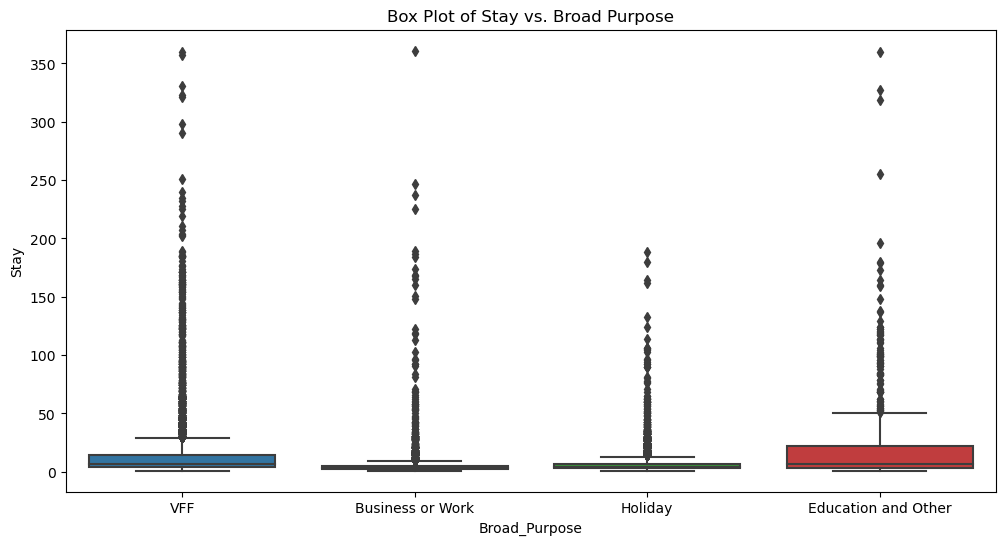

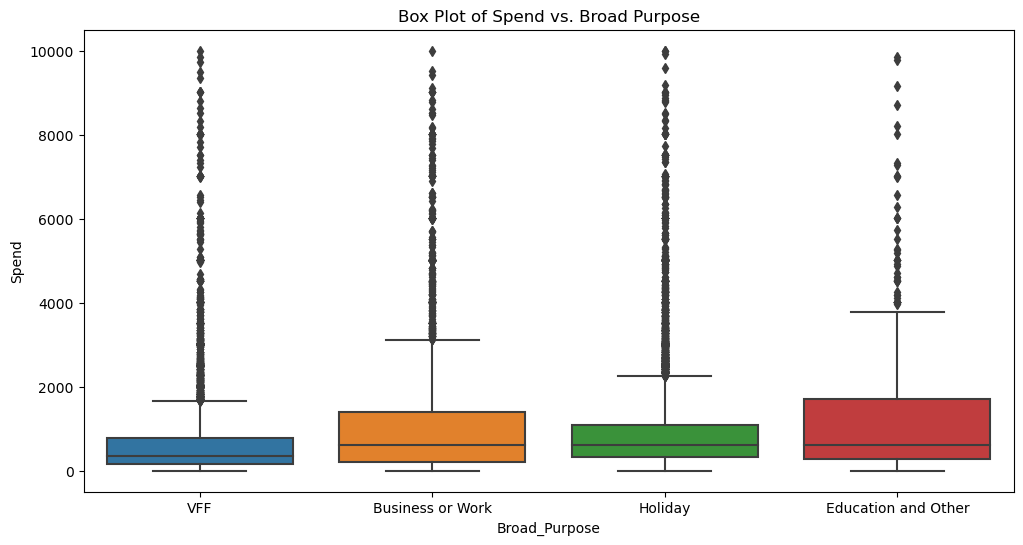

In [53]:
#boxplot for Stay and Broad_Purpose
plt.figure(figsize=(12, 6))
sns.boxplot(x='Broad_Purpose', y='Stay', data=merged_df_2022)
plt.title('Box Plot of Stay vs. Broad Purpose')
plt.show()

#boxplot for Spend and Broad_Purpose
plt.figure(figsize=(12, 6))
sns.boxplot(x='Broad_Purpose', y='Spend', data=merged_df_2022)
plt.title('Box Plot of Spend vs. Broad Purpose')
plt.show()

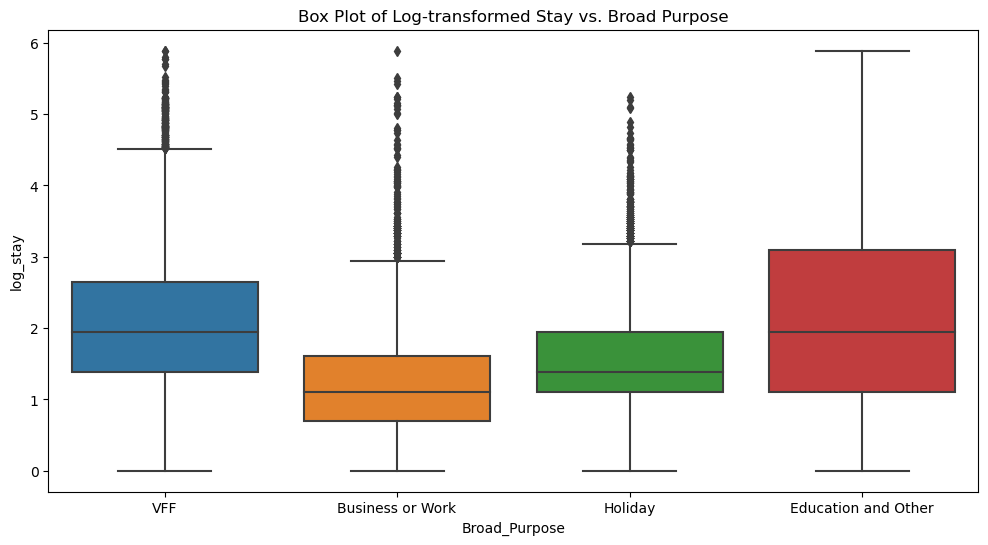

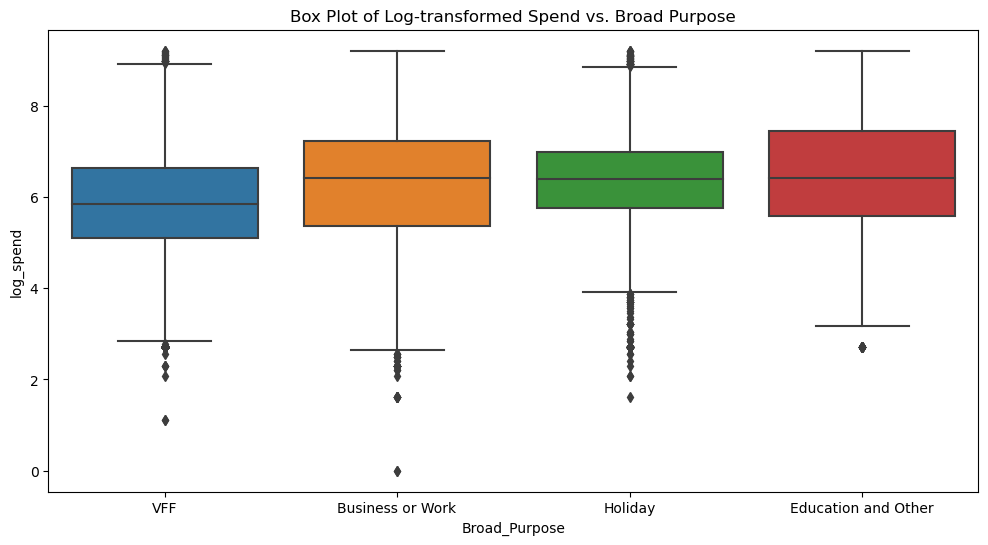

In [54]:
#The boxplots are not clearly visible due to the outliers, so we apply log transform 
#to Stay and Spend to view them better

merged_df_2022['log_stay'] = np.log(merged_df_2022['Stay'])
merged_df_2022['log_spend'] = np.log(merged_df_2022['Spend'])

#Box plot for log-transformed Stay and Broad_Purpose
plt.figure(figsize=(12, 6))
sns.boxplot(x='Broad_Purpose', y='log_stay', data=merged_df_2022)
plt.title('Box Plot of Log-transformed Stay vs. Broad Purpose')
plt.show()

#Box plot for log-transformed Spend and Broad_Purpose
plt.figure(figsize=(12, 6))
sns.boxplot(x='Broad_Purpose', y='log_spend', data=merged_df_2022)
plt.title('Box Plot of Log-transformed Spend vs. Broad Purpose')
plt.show()

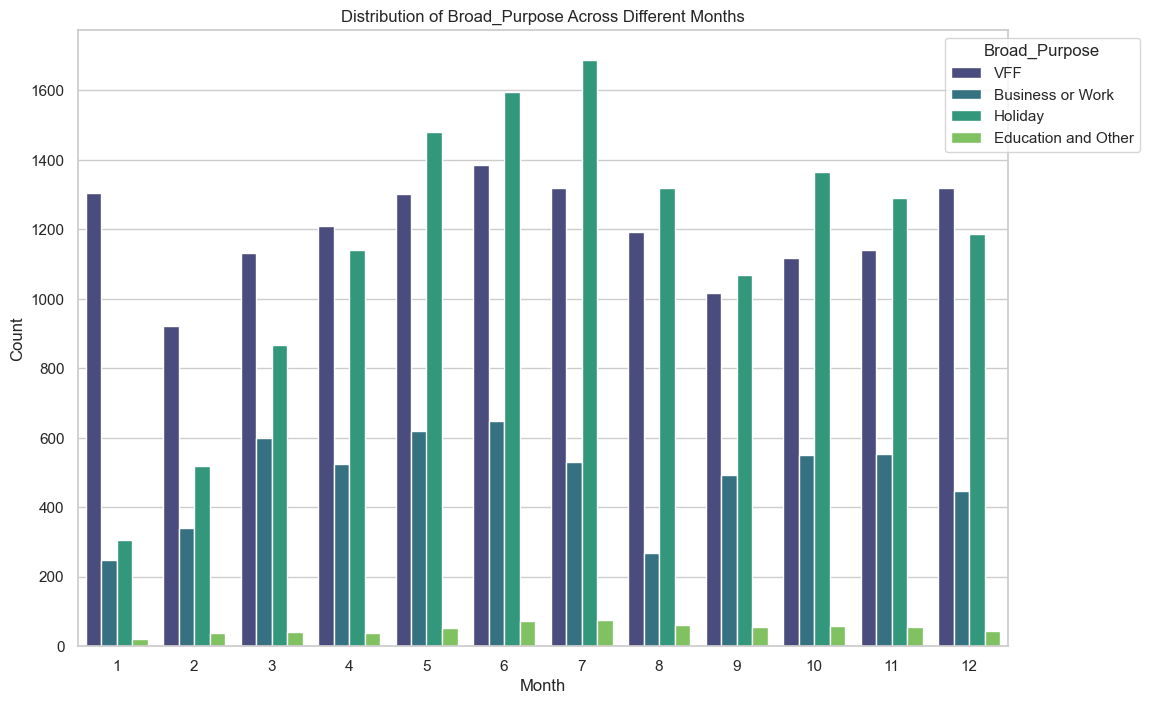

In [55]:
#distribution of purpose by month for 2022

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Month', hue='Broad_Purpose', data=merged_df_2022, palette='viridis')

ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Distribution of Broad_Purpose Across Different Months')
ax.legend(title='Broad_Purpose', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

### Crosstabs

In [56]:
#We use crosstabs to view the distribution of Purpuse by different variables

cross_tab_stay_purpose = pd.crosstab(merged_df_2022['Stay_Category'], merged_df_2022['Broad_Purpose'], 
                                     margins=True, margins_name="Total")
#calculate percentages and round to 2 decimal places
cross_tab_stay_purpose_percent = (cross_tab_stay_purpose.div(cross_tab_stay_purpose.iloc[-1, -1]) * 100).round(2)
#format tables as strings
table_stay_purpose = tabulate(cross_tab_stay_purpose, headers='keys', tablefmt='pretty')
table_stay_purpose_percent = tabulate(cross_tab_stay_purpose_percent, headers='keys', tablefmt='pretty')


cross_tab_spend_purpose = pd.crosstab(merged_df_2022['Spend_Category'], merged_df_2022['Broad_Purpose'], 
                                      margins=True, margins_name="Total")
cross_tab_spend_purpose_percent = (cross_tab_spend_purpose.div(cross_tab_spend_purpose.iloc[-1, -1]) * 100).round(2)
table_spend_purpose = tabulate(cross_tab_spend_purpose, headers='keys', tablefmt='pretty')
table_spend_purpose_percent = tabulate(cross_tab_spend_purpose_percent, headers='keys', tablefmt='pretty')


cross_tab_region_purpose = pd.crosstab(merged_df_2022['Broad_Nationality'], merged_df_2022['Broad_Purpose'],
                                       margins=True, margins_name="Total")
cross_tab_region_purpose_percent = (cross_tab_region_purpose.div(cross_tab_region_purpose.iloc[-1, -1]) * 100).round(2)
table_region_purpose = tabulate(cross_tab_region_purpose, headers='keys', tablefmt='pretty')
table_region_purpose_percent = tabulate(cross_tab_region_purpose_percent, headers='keys', tablefmt='pretty')


cross_tab_spend_stay = pd.crosstab(merged_df_2022['Spend_Category'], merged_df_2022['Stay_Category'], 
                                   margins=True, margins_name="Total")
cross_tab_spend_stay_percent = (cross_tab_spend_stay.div(cross_tab_spend_stay.iloc[-1, -1]) * 100).round(2)
table_spend_stay = tabulate(cross_tab_spend_stay, headers='keys', tablefmt='pretty')
table_spend_stay_percent = tabulate(cross_tab_spend_stay_percent, headers='keys', tablefmt='pretty')


cross_tab_nation_purpose = pd.crosstab(merged_df_2022['Broad_Nationality'], merged_df_2022['Broad_Purpose'],
                                       margins=True, margins_name="Total")

#calculate percentages and normalising
cross_tab_nation_purpose_percent = (cross_tab_nation_purpose.div(cross_tab_nation_purpose.iloc[:, -1], axis=0) * 100).round(2)
table_nation_purpose = tabulate(cross_tab_nation_purpose, headers='keys', tablefmt='pretty')
table_nation_purpose_percent = tabulate(cross_tab_nation_purpose_percent, headers='keys', tablefmt='pretty')


cross_tab_nation_spend = pd.crosstab(merged_df_2022['Broad_Nationality'], merged_df_2022['Spend_Category'], 
                                     margins=True, margins_name='Total')
table_nation_spend = tabulate(cross_tab_nation_spend, headers='keys', tablefmt='pretty', showindex=True)

#normalised
cross_tab_nation_spend_norm = pd.crosstab(merged_df_2022['Broad_Nationality'], 
                                                merged_df_2022['Spend_Category'], normalize='index')
cross_tab_norm = cross_tab_nation_spend_norm.round(2)
table_nation_spend_norm = tabulate(cross_tab_norm, headers='keys', tablefmt='pretty', showindex=True)
print(table_nation_spend_norm)


#print the tables
print("Stay and Purpose (Counts):")
print(table_stay_purpose)
print("\nStay and Purpose (Percentages):")
print(table_stay_purpose_percent)

print("\nSpend and Purpose (Counts):")
print(table_spend_purpose)
print("\nSpend and Purpose (Percentages):")
print(table_spend_purpose_percent)

print("\nRegion of the World and Purpose (Counts):")
print(table_region_purpose)
print("\nRegion of the World and Purpose (Percentages):")
print(table_region_purpose_percent)

print("\nRegion of the World and Purpose (Counts):")
print(table_nation_purpose)
print("\nRegion of the World and Purpose (Normalised):")
print(table_nation_purpose_percent)

print("\nStay and Spend (Counts):")
print(table_spend_stay)
print("\nStay and Spend (Percentages):")
print(table_spend_stay_percent)

print("\nRegion of the World and Expenditure (Counts):")
print(table_nation_spend)

print("\nRegion of the World and Expenditure (Normalised):")
print(table_nation_spend_norm)

+---------------------------+-----------+-------------+--------------+---------------+--------------------+
|     Broad_Nationality     | 0-250 GBP | 250-500 GBP | 500-1000 GBP | 1000-5000 GBP | more than 5000 GBP |
+---------------------------+-----------+-------------+--------------+---------------+--------------------+
|          Africa           |   0.14    |    0.12     |     0.24     |     0.46      |        0.04        |
|           Asia            |   0.15    |    0.11     |     0.2      |     0.48      |        0.06        |
| Australia, NZ and Oceania |   0.13    |    0.14     |     0.21     |     0.48      |        0.05        |
|            EU             |   0.33    |    0.29     |     0.25     |     0.13      |        0.0         |
|       Non-EU Europe       |   0.19    |    0.21     |     0.32     |     0.27      |        0.01        |
|       North America       |   0.15    |    0.16     |     0.24     |     0.43      |        0.03        |
|           Other           

### Chi-Square Test

    Source and further explanation: https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7

In [57]:
#creating sets of variables
#Residence is the nation of residence of repondents for foreign departures

cat_var1 = ('Month', 'Broad_Purpose', 'Broad_Nationality', 'Residence', 'Stay_Category', 'Spend_Category', 
            'accom_type', 'London_or_out')
cat_var2 = ('Month', 'Broad_Purpose', 'Broad_Nationality', 'Residence', 'Stay_Category', 'Spend_Category',
            'accom_type', 'London_or_out')

#creating all possible combinations between the above two variable lists
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))
print(cat_var_prod)

[('Month', 'Month'), ('Month', 'Broad_Purpose'), ('Month', 'Broad_Nationality'), ('Month', 'Residence'), ('Month', 'Stay_Category'), ('Month', 'Spend_Category'), ('Month', 'accom_type'), ('Month', 'London_or_out'), ('Broad_Purpose', 'Month'), ('Broad_Purpose', 'Broad_Purpose'), ('Broad_Purpose', 'Broad_Nationality'), ('Broad_Purpose', 'Residence'), ('Broad_Purpose', 'Stay_Category'), ('Broad_Purpose', 'Spend_Category'), ('Broad_Purpose', 'accom_type'), ('Broad_Purpose', 'London_or_out'), ('Broad_Nationality', 'Month'), ('Broad_Nationality', 'Broad_Purpose'), ('Broad_Nationality', 'Broad_Nationality'), ('Broad_Nationality', 'Residence'), ('Broad_Nationality', 'Stay_Category'), ('Broad_Nationality', 'Spend_Category'), ('Broad_Nationality', 'accom_type'), ('Broad_Nationality', 'London_or_out'), ('Residence', 'Month'), ('Residence', 'Broad_Purpose'), ('Residence', 'Broad_Nationality'), ('Residence', 'Residence'), ('Residence', 'Stay_Category'), ('Residence', 'Spend_Category'), ('Residence'

In [58]:
result = []       
#empty list

#iterating through the possible combinations of the variables
for i in cat_var_prod:
    if i[0] != i[1]:
    #for eg. if (month, Broad_Purpose) is one of the combinations, then do the below
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(merged_df_2022[i[0]], 
                                                                      merged_df_2022[i[1]])))[1]))
        
        #the above line is making a list (of sorts) to map the combinations of the variables along with the
        #corresponding p values. The null hypothesis here is that each of the variable combinations are not 
        #related; ie; they are independent. Significance level is 0.05 by default. We're storing this in the
        #list
        
        #print(ss.chi2_contingency(pd.crosstab(merged_df_2022[i[0]], merged_df_2022[i[1]])))
        
        #the above line prints the result of the function chi2_contingency. It mentions the f statistic, 
        #degrees of freedom, p-values, the frequencies etc. For the chisq test, we only want the p value 
        #so we index it and access only element [1]. The code above this line is accessing those p values 
        #and appending it to the corresponding variable pairing. However, it has been commented out as the
        #output is too lengthy. To view the output in more detail, the line can be uncommented.


In [59]:
#to view this in a tabular format
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 
                                                       'p-value'])
#exporting the results of the chisq test into a new dataframe 

#Using pivot function to convert the above Dataframe into a crosstab
chi_test_output.pivot(index='var1', columns= 'var2', values='p-value')

var2               Broad_Nationality  Broad_Purpose  London_or_out  \
var1                                                                 
Broad_Nationality                NaN   0.000000e+00  2.498148e-302   
Broad_Purpose           0.000000e+00            NaN   0.000000e+00   
London_or_out          2.498148e-302   0.000000e+00            NaN   
Month                  6.447304e-199  7.153800e-224   3.201325e-41   
Residence               0.000000e+00   0.000000e+00  3.624449e-215   
Spend_Category          0.000000e+00   0.000000e+00  4.220805e-186   
Stay_Category           0.000000e+00   0.000000e+00  7.405393e-191   
accom_type              0.000000e+00   0.000000e+00   0.000000e+00   

var2                       Month      Residence  Spend_Category  \
var1                                                              
Broad_Nationality  6.447304e-199   0.000000e+00    0.000000e+00   
Broad_Purpose      7.153800e-224   0.000000e+00    0.000000e+00   
London_or_out       3.201325e-41  3.624449e-215   4.220805e-186   
Month                        NaN  1.564611e-171    1.166102e-81   
Residence          1.564611e-171            NaN    0.000000e+00   
Spend_Category      1.166102e-81   0.000000e+00             NaN   
Stay_Category       0.000000e+00   0.000000e+00    0.000000e+00   
accom_type         8.991193e-211   0.000000e+00    0.000000e+00   

var2               Stay_Category     accom_type  
var1                                             
Broad_Nationality   0.000000e+00   0.000000e+00  
Broad_Purpose       0.000000e+00   0.000000e+00  
London_or_out      7.405393e-191   0.000000e+00  
Month               0.000000e+00  8.991193e-211  
Residence           0.000000e+00   0.000000e+00  
Spend_Category      0.000000e+00   0.000000e+00  
Stay_Category                NaN   0.000000e+00  
accom_type          0.000000e+00            NaN

From the table we see that all the variables are related to one another as the p-values are all <0.05, so we reject the null hypothesis (variables are uncorrelated). However, this test is only an indication of variables being correlated, it does not provide a measure of how correlated they are. However, from the boxplots we see that the data does not exhibit strong linear correlation. The test also does not provide an indication of whether the variables are positively or negatively correlated, it only suggests that the variables are correlated.

### Cramer's V

Cramer's V is a modification of the chi-square test of independence. It measures how strongly two categorical variables are associated with each other.

    More explanation on Cramer's V: https://www.statology.org/interpret-cramers-v/

In [60]:
#initialize an empty list to store results
cramer_results = []

for var1, var2 in cat_var_prod:
    #skip variables that are the same
    if var1 == var2:
        continue
    observed = pd.crosstab(merged_df_2022[var1], merged_df_2022[var2])
    
    #perform the chi-squared test
    chi2, _, _, _ = chi2_contingency(observed)
    
    #calculate Cramer's V
    n = observed.sum().sum()
    k = observed.shape[0]
    r = observed.shape[1]
    cramers_v = (chi2 / n) ** 0.5 / min(k - 1, r - 1)
    
    #append results to the list
    cramer_results.append({'Variable_1': var1, 'Variable_2': var2, "Cramer's V": cramers_v})

cramer_results_df = pd.DataFrame(cramer_results)

#Using pivot function to convert the above Dataframe into a crosstab
cramer_results_df.pivot(index='Variable_1', columns= 'Variable_2', values= "Cramer's V")

Variable_2         Broad_Nationality  Broad_Purpose  London_or_out     Month  \
Variable_1                                                                     
Broad_Nationality                NaN       0.117241       0.202842  0.023476   
Broad_Purpose               0.117241            NaN       0.272889  0.061181   
London_or_out               0.202842       0.272889            NaN  0.079888   
Month                       0.023476       0.061181       0.079888       NaN   
Residence                   0.269529       0.107398       0.210825  0.031869   
Spend_Category              0.098972       0.084373       0.159319  0.030727   
Stay_Category               0.084045       0.106692       0.166163  0.047580   
accom_type                  0.145061       0.319902       0.301602  0.087589   

Variable_2         Residence  Spend_Category  Stay_Category  accom_type  
Variable_1                                                               
Broad_Nationality   0.269529        0.098972       0.084045    0.145061  
Broad_Purpose       0.107398        0.084373       0.106692    0.319902  
London_or_out       0.210825        0.159319       0.166163    0.301602  
Month               0.031869        0.030727       0.047580    0.087589  
Residence                NaN        0.120885       0.109561    0.134733  
Spend_Category      0.120885             NaN       0.080642    0.162493  
Stay_Category       0.109561        0.080642            NaN    0.147020  
accom_type          0.134733        0.162493       0.147020         NaN

We observe that most of the variables are weakly correlated with each other. Cramer's V does not measure linear correlation like Pearson's correlation coefficient does for continuous variables. It is more of a measure of the strength of assocation rather than a measure of linear correlation. As the data is categorical, we cannot assume linear relationships here.

# Logistic Regression

Here, we attempt classification through Multinomial Logistic Regression (MLR) with a few variables. We are using logistic regression as the data is categorical and not continuous. Hence we cannot use simple linear regression like GLS as the data is not continuous and cannot make some of the assumptions that GLS requires like the normality and independence of residuals and homoscedasticity.

Logistic regression on the other hand does not require a linear relationship between the dependent and independent variables. It also does not require the residuals to be normally distributed and allows for heteroscedasticity.

However, it does make some assumptions. Logistic regression requires the observations to be independent of each other and requires there to be little or no multicollinearity among the independent variables. It also assumes linearity of independent variables and log odds and usually requires a large sample size with sufficient instances of each class.

    Source: 
    Schreiber-Gregory, D. and Bader, K., 2018. Logistic and linear regression assumptions: Violation recognition and control. Henry M Jackson Foundation, 247, p.22.
    Explanation on Log odds: https://www.geeksforgeeks.org/role-of-log-odds-in-logistic-regression/

                     precision    recall  f1-score   support

   Business or Work       1.00      0.00      0.00      1165
Education and Other       1.00      0.00      0.00       114
            Holiday       0.41      0.63      0.49      2714
                VFF       0.49      0.46      0.47      2933

           accuracy                           0.44      6926
          macro avg       0.72      0.27      0.24      6926
       weighted avg       0.55      0.44      0.39      6926



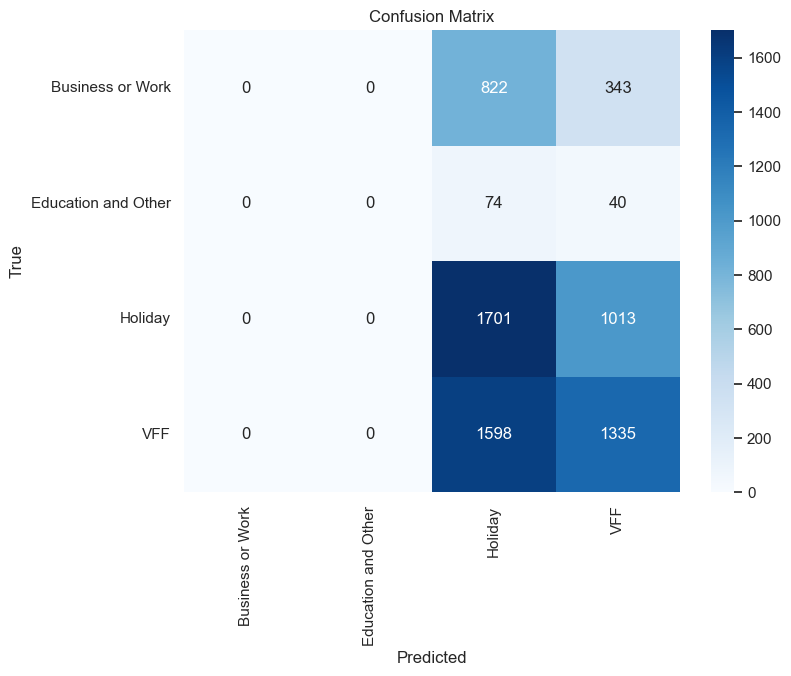

In [61]:
#Purpose ~ Nationality 
label_encoder = LabelEncoder()

merged_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Purpose'])
merged_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2022['Broad_Purpose_encoded'], merged_df_2022['Broad_Purpose']))

merged_df_2022['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Nationality'])

X = merged_df_2022['Broad_Nationality_encoded']
y = merged_df_2022['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
#reshape X to a 2D array
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

#fit the logistic regression model to the data
#using the multinomial setting here are Broad_Purpose has more than 2 classes
model = LogisticRegression(multi_class='multinomial', max_iter=1000) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

#print the classification report for each class of Broad_Purpose
#zero_division is set to 1 as the precision for some classes is zero and hence calculating the F1 score
#lead to zero division error. This can be fixed by setting zero_division to 1, which in turn sets the 
#precision to 1 (instead of 0). This should be read as zero precision.

classification_report_str = classification_report(y_test_pd.map(label_mapping), 
                                                  y_pred_pd.map(label_mapping), zero_division=1)
print(classification_report_str)
classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']


#calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



The classifier doesn't attempt to classify any of the instances under 'Business or Work' and 'Education and Other' and classifies (erroneously in some cases) all instances under either 'Holiday' or 'VFF'.

                     precision    recall  f1-score   support

   Business or Work       1.00      0.00      0.00      1165
Education and Other       1.00      0.00      0.00       114
            Holiday       0.41      0.35      0.38      2714
                VFF       0.46      0.72      0.56      2933

           accuracy                           0.44      6926
          macro avg       0.72      0.27      0.23      6926
       weighted avg       0.54      0.44      0.38      6926



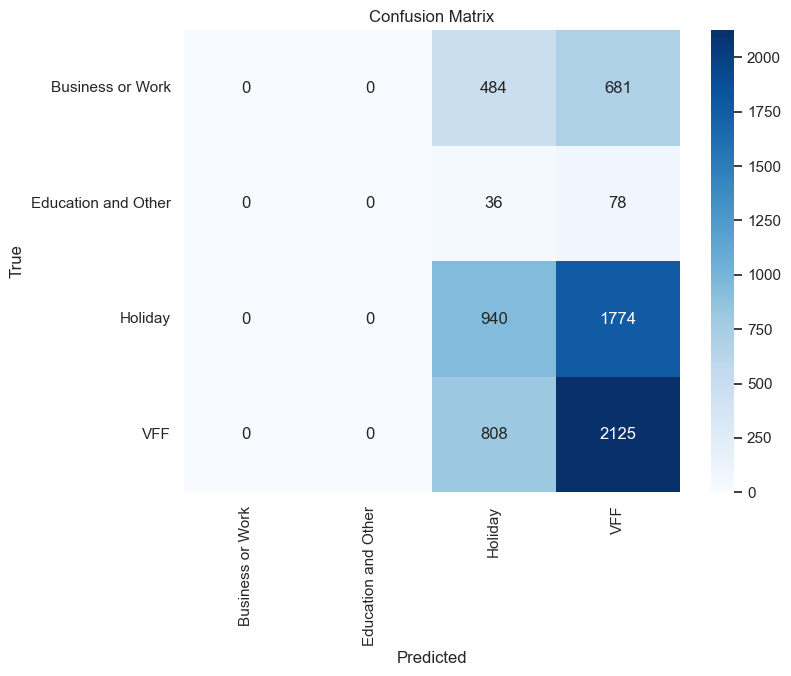

In [62]:
#Purpose ~ Stay 
label_encoder = LabelEncoder()

merged_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Purpose'])
merged_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2022['Broad_Purpose_encoded'], merged_df_2022['Broad_Purpose']))

merged_df_2022['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Stay_Category'])

X = merged_df_2022['Stay_Category_encoded']
y = merged_df_2022['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
#reshape X to a 2D array
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

#fit the logistic regression model to the data
#using the multinomial setting here are Broad_Purpose has more than 2 classes
model = LogisticRegression(multi_class='multinomial', max_iter=1000) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

#print the classification report for each class of Broad_Purpose
#zero_division is set to 1 as the precision for some classes is zero and hence calculating the F1 score
#lead to zero division error. This can be fixed by setting zero_division to 1, which in turn sets the 
#precision to 1 (instead of 0). This should be read as zero precision.

classification_report_str = classification_report(y_test_pd.map(label_mapping), 
                                                  y_pred_pd.map(label_mapping), zero_division=1)
print(classification_report_str)
classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']


#calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Again we see that the classifier doesn't attempt to classify any of the instances under 'Business or Work' and 'Education and Other'. However, this model that uses 'Stay_Category' as a predictor tends to skew towards predicting instances of VFF more accurately than Holiday.

                     precision    recall  f1-score   support

   Business or Work       1.00      0.00      0.00      1165
Education and Other       1.00      0.00      0.00       114
            Holiday       0.45      0.55      0.50      2714
                VFF       0.47      0.57      0.51      2933

           accuracy                           0.46      6926
          macro avg       0.73      0.28      0.25      6926
       weighted avg       0.56      0.46      0.41      6926



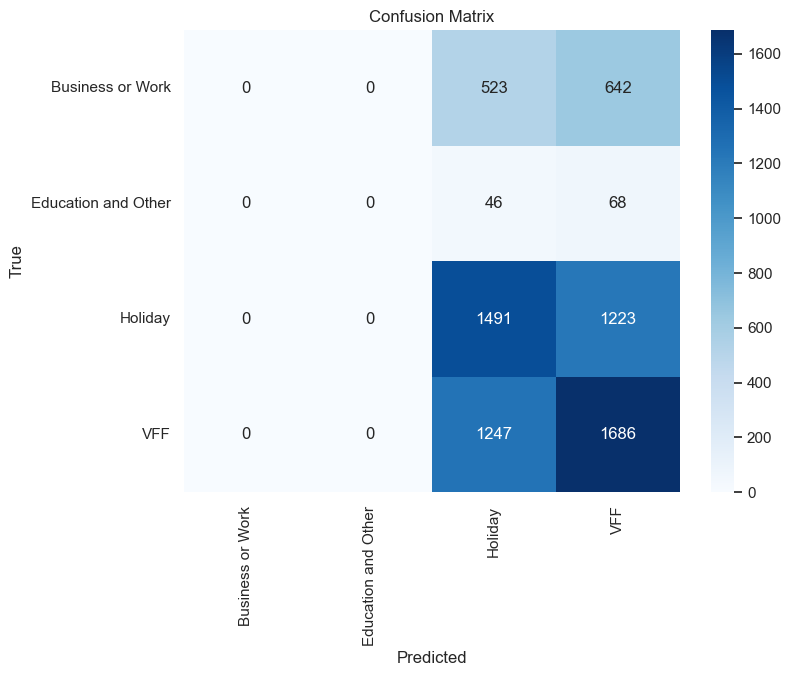

In [63]:
#Purpose ~ Spend
label_encoder = LabelEncoder()

merged_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Purpose'])
merged_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2022['Broad_Purpose_encoded'], merged_df_2022['Broad_Purpose']))

merged_df_2022['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Spend_Category'])

X = merged_df_2022['Spend_Category_encoded']
y = merged_df_2022['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
#reshape X to a 2D array
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

#fit the logistic regression model to the data
#using the multinomial setting here are Broad_Purpose has more than 2 classes
model = LogisticRegression(multi_class='multinomial', max_iter=1000) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

#print the classification report for each class of Broad_Purpose
classification_report_str = classification_report(y_test_pd.map(label_mapping), 
                                                  y_pred_pd.map(label_mapping), zero_division=1)
print(classification_report_str)
classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']


#calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Trying all three variables together:

                     precision    recall  f1-score   support

   Business or Work       1.00      0.00      0.00      1165
Education and Other       1.00      0.00      0.00       114
            Holiday       0.46      0.58      0.52      2714
                VFF       0.51      0.61      0.56      2933

           accuracy                           0.49      6926
          macro avg       0.74      0.30      0.27      6926
       weighted avg       0.58      0.49      0.44      6926



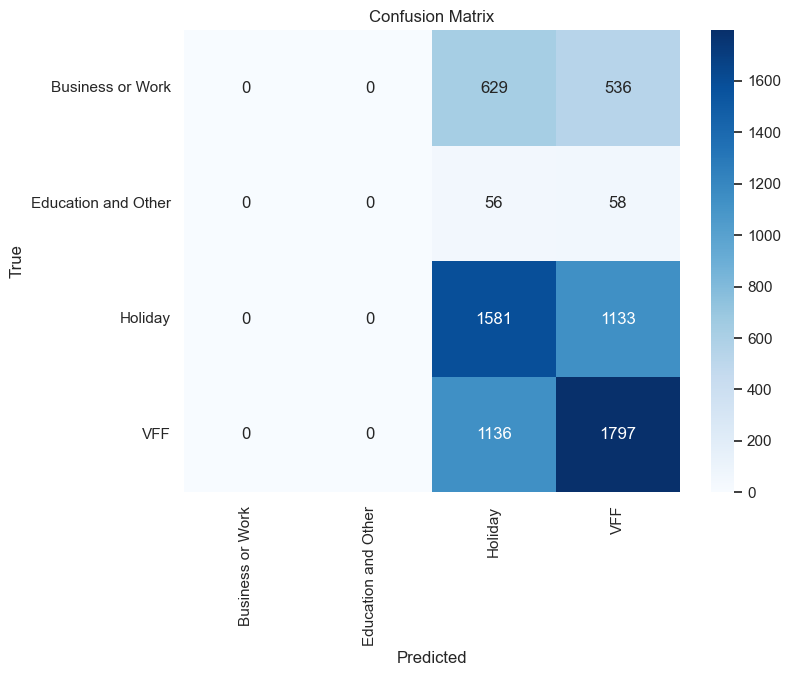

In [64]:
#Purpose ~ Spend + Stay + Nationality
label_encoder = LabelEncoder()

merged_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Purpose'])
merged_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2022['Broad_Purpose_encoded'], merged_df_2022['Broad_Purpose']))

merged_df_2022['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Spend_Category'])
merged_df_2022['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Stay_Category'])
merged_df_2022['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Nationality'])


X = merged_df_2022[['Spend_Category_encoded', 'Stay_Category_encoded', 'Broad_Nationality_encoded']]
y = merged_df_2022['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

#fit the logistic regression model to the data
#using the multinomial setting here are Broad_Purpose has more than 2 classes
model = LogisticRegression(multi_class='multinomial', max_iter=1000) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

#print the classification report for each class of Broad_Purpose
classification_report_str = classification_report(y_test_pd.map(label_mapping), 
                                                  y_pred_pd.map(label_mapping), zero_division=1)
print(classification_report_str)
classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']

#calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



The performance is still poor. Let us add more variables.

                     precision    recall  f1-score   support

   Business or Work       1.00      0.00      0.00      1165
Education and Other       1.00      0.00      0.00       114
            Holiday       0.48      0.63      0.55      2714
                VFF       0.54      0.61      0.57      2933

           accuracy                           0.51      6926
          macro avg       0.75      0.31      0.28      6926
       weighted avg       0.60      0.51      0.46      6926



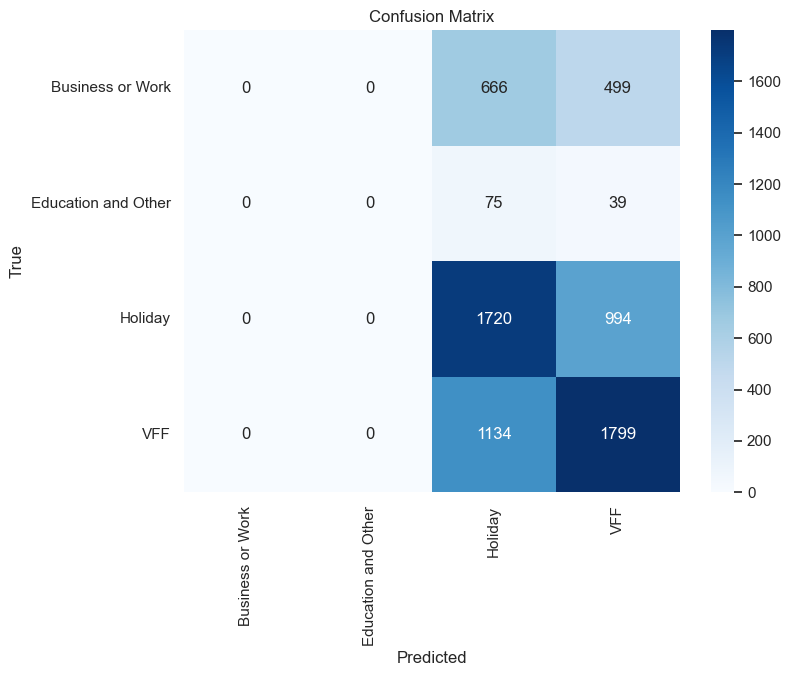

In [65]:
#Purpose ~ Spend + Stay + Nationality + Flow + Age

label_encoder = LabelEncoder()

merged_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Purpose'])
merged_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2022['Broad_Purpose_encoded'], merged_df_2022['Broad_Purpose']))

merged_df_2022['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Spend_Category'])
merged_df_2022['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Stay_Category'])
merged_df_2022['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Nationality'])


X = merged_df_2022[['Spend_Category_encoded', 'Stay_Category_encoded', 'Broad_Nationality_encoded', 'Flow', 'Age']]
y = merged_df_2022['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

#fit the logistic regression model to the data
#using the multinomial setting here are Broad_Purpose has more than 2 classes
model = LogisticRegression(multi_class='multinomial', max_iter=1000) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

#print the classification report for each class of Broad_Purpose
classification_report_str = classification_report(y_test_pd.map(label_mapping), 
                                                  y_pred_pd.map(label_mapping), zero_division=1)
print(classification_report_str)
classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']

#calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



                     precision    recall  f1-score   support

   Business or Work       1.00      0.00      0.00      1165
Education and Other       1.00      0.00      0.00       114
            Holiday       0.58      0.84      0.69      2714
                VFF       0.77      0.79      0.78      2933

           accuracy                           0.66      6926
          macro avg       0.84      0.41      0.37      6926
       weighted avg       0.74      0.66      0.60      6926



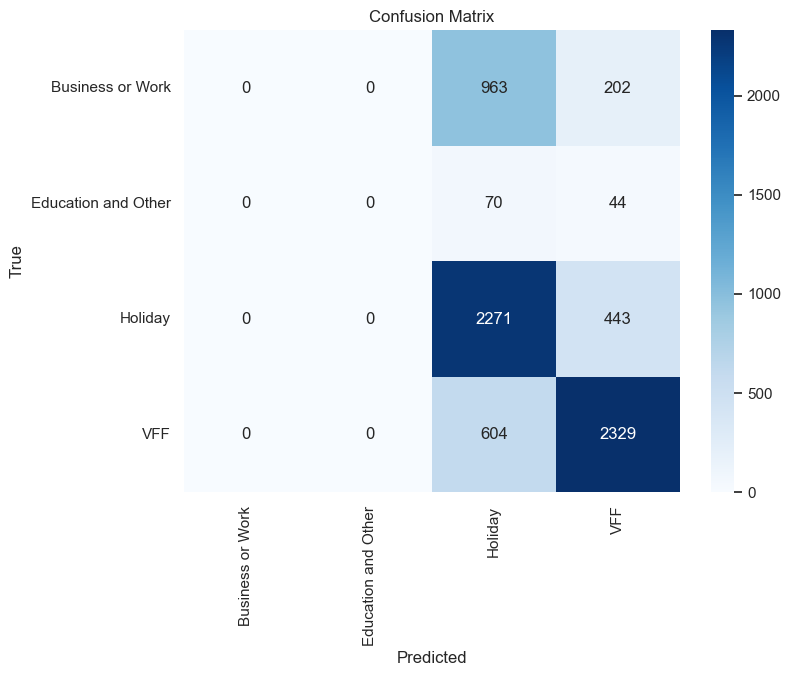

In [66]:
#Purpose ~ Spend + Stay + Nationality + Flow + Age + Accomodation_type

label_encoder = LabelEncoder()

merged_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Purpose'])
merged_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2022['Broad_Purpose_encoded'], merged_df_2022['Broad_Purpose']))

merged_df_2022['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Spend_Category'])
merged_df_2022['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Stay_Category'])
merged_df_2022['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Nationality'])


X = merged_df_2022[['Spend_Category_encoded', 'Stay_Category_encoded', 'Broad_Nationality_encoded', 
                    'Flow', 'Age', 'accom_type']]
y = merged_df_2022['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

#fit the logistic regression model to the data
#using the multinomial setting here are Broad_Purpose has more than 2 classes
model = LogisticRegression(multi_class='multinomial', max_iter=1000) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

#print the classification report for each class of Broad_Purpose
classification_report_str = classification_report(y_test_pd.map(label_mapping), 
                                                  y_pred_pd.map(label_mapping), zero_division=1)
print(classification_report_str)
classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']

#calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



                     precision    recall  f1-score   support

   Business or Work       1.00      0.00      0.00      1165
Education and Other       1.00      0.00      0.00       114
            Holiday       0.52      0.69      0.60      2714
                VFF       0.58      0.66      0.61      2933

           accuracy                           0.55      6926
          macro avg       0.78      0.34      0.30      6926
       weighted avg       0.63      0.55      0.49      6926



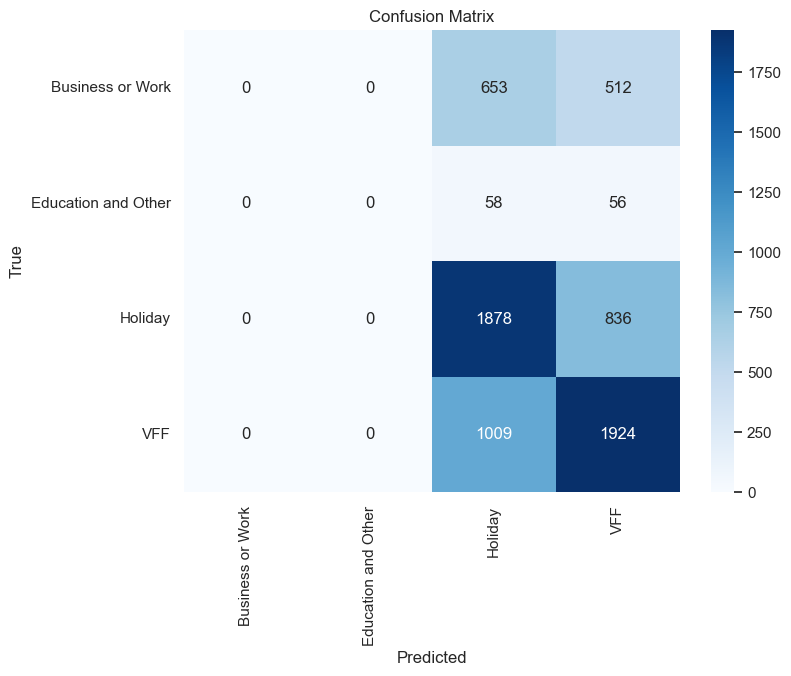

In [67]:
#Purpose ~ Spend + Stay + Nationality + Flow + Age + Accomodation_type + town1
label_encoder = LabelEncoder()

merged_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Purpose'])
merged_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2022['Broad_Purpose_encoded'], merged_df_2022['Broad_Purpose']))

merged_df_2022['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Spend_Category'])
merged_df_2022['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Stay_Category'])
merged_df_2022['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Nationality'])


X = merged_df_2022[['Spend_Category_encoded', 'Stay_Category_encoded', 'Broad_Nationality_encoded', 
                    'Flow', 'Age', 'accom_type', 'town1']]
y = merged_df_2022['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

#fit the logistic regression model to the data
#using the multinomial setting here are Broad_Purpose has more than 2 classes
model = LogisticRegression(multi_class='multinomial', max_iter=1000) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

#print the classification report for each class of Broad_Purpose
classification_report_str = classification_report(y_test_pd.map(label_mapping), 
                                                  y_pred_pd.map(label_mapping), zero_division=1)
print(classification_report_str)
classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']

#calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



                     precision    recall  f1-score   support

   Business or Work       1.00      0.00      0.00      1165
Education and Other       1.00      0.00      0.00       114
            Holiday       0.58      0.83      0.68      2714
                VFF       0.76      0.80      0.78      2933

           accuracy                           0.66      6926
          macro avg       0.84      0.41      0.37      6926
       weighted avg       0.74      0.66      0.60      6926



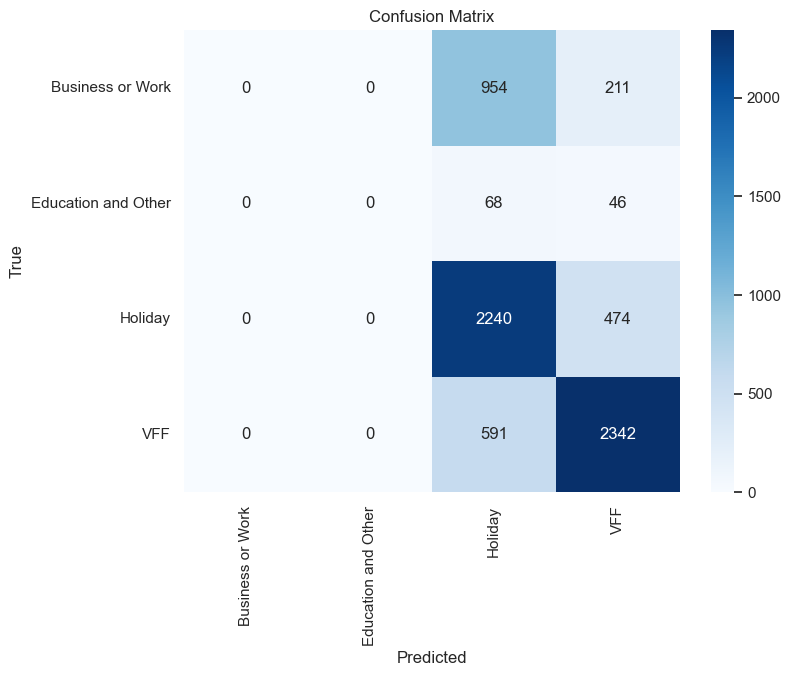

In [68]:
#Purpose ~ Spend + Stay + Nationality + Flow + Age + Accomodation_type + London_or_out
label_encoder = LabelEncoder()

merged_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Purpose'])
merged_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2022['Broad_Purpose_encoded'], merged_df_2022['Broad_Purpose']))

merged_df_2022['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Spend_Category'])
merged_df_2022['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Stay_Category'])
merged_df_2022['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Nationality'])


X = merged_df_2022[['Spend_Category_encoded', 'Stay_Category_encoded', 'Broad_Nationality_encoded', 
                    'Flow', 'Age', 'accom_type', 'London_or_out']]
y = merged_df_2022['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

#fit the logistic regression model to the data
#using the multinomial setting here are Broad_Purpose has more than 2 classes
model = LogisticRegression(multi_class='multinomial', max_iter=1000) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

#print the classification report for each class of Broad_Purpose
classification_report_str = classification_report(y_test_pd.map(label_mapping), 
                                                  y_pred_pd.map(label_mapping), zero_division=1)
print(classification_report_str)
classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']

#calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



                     precision    recall  f1-score   support

   Business or Work       0.31      0.05      0.08      1165
Education and Other       1.00      0.00      0.00       114
            Holiday       0.58      0.79      0.67      2714
                VFF       0.76      0.80      0.78      2933

           accuracy                           0.66      6926
          macro avg       0.66      0.41      0.38      6926
       weighted avg       0.62      0.66      0.61      6926



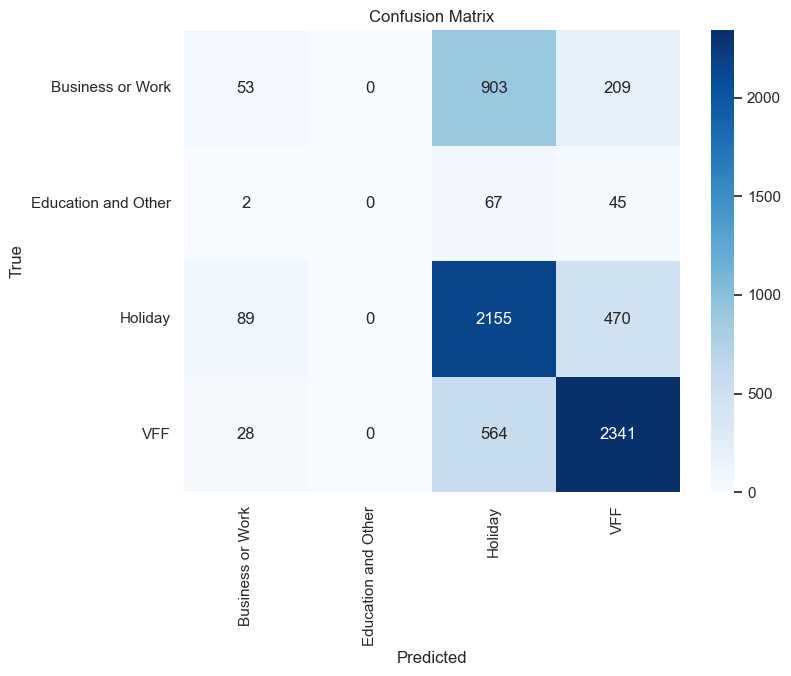

In [69]:
#Purpose ~ Spend + Stay + Nationality + Flow + Age + Accomodation_type + London_or_out 
# + TripStartDay + DayOfWeek
label_encoder = LabelEncoder()

merged_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Purpose'])
merged_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2022['Broad_Purpose_encoded'], merged_df_2022['Broad_Purpose']))

merged_df_2022['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Spend_Category'])
merged_df_2022['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Stay_Category'])
merged_df_2022['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Nationality'])


X = merged_df_2022[['Spend_Category_encoded', 'Stay_Category_encoded', 'Broad_Nationality_encoded', 
                    'Flow', 'Age', 'accom_type', 'London_or_out', 'TripStartDay', 'DayOfWeek']]
y = merged_df_2022['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

#fit the logistic regression model to the data
#using the multinomial setting here are Broad_Purpose has more than 2 classes
model = LogisticRegression(multi_class='multinomial', max_iter=1000) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

#print the classification report for each class of Broad_Purpose
classification_report_str = classification_report(y_test_pd.map(label_mapping), 
                                                  y_pred_pd.map(label_mapping), zero_division=1)
print(classification_report_str)
classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']

#calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



                     precision    recall  f1-score   support

   Business or Work       0.35      0.06      0.10      1165
Education and Other       1.00      0.00      0.00       114
            Holiday       0.59      0.80      0.68      2714
                VFF       0.77      0.80      0.78      2933

           accuracy                           0.66      6926
          macro avg       0.68      0.41      0.39      6926
       weighted avg       0.63      0.66      0.61      6926



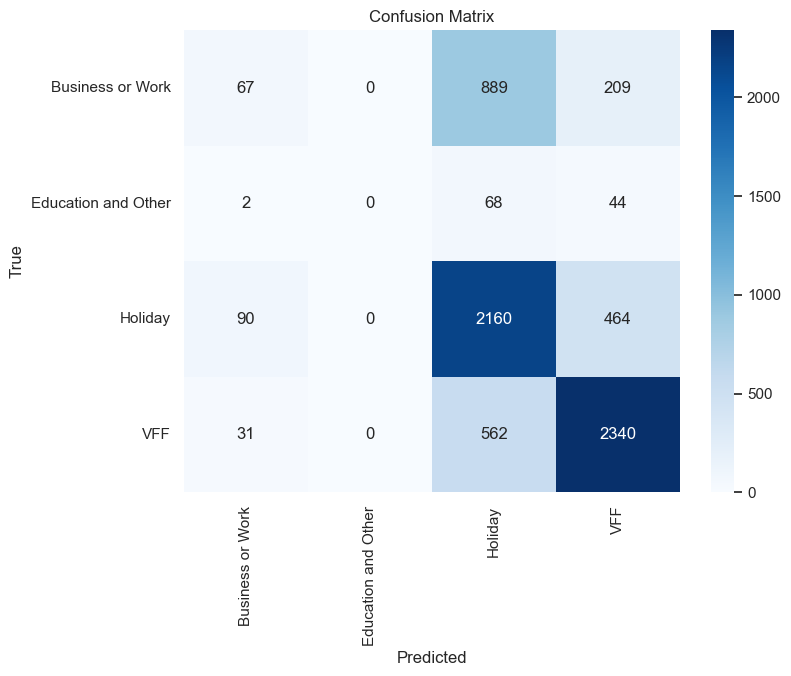

In [70]:
#Purpose ~ Spend + Stay + Nationality + Flow + Age + Accomodation_type + London_or_out 
# + TripStartDay + DayOfWeek + Month
label_encoder = LabelEncoder()

merged_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Purpose'])
merged_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2022['Broad_Purpose_encoded'], merged_df_2022['Broad_Purpose']))

merged_df_2022['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Spend_Category'])
merged_df_2022['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Stay_Category'])
merged_df_2022['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Nationality'])


X = merged_df_2022[['Spend_Category_encoded', 'Stay_Category_encoded', 'Broad_Nationality_encoded', 
                    'Flow', 'Age', 'accom_type', 'London_or_out', 'TripStartDay', 'DayOfWeek',
                    'Month']]
y = merged_df_2022['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

#fit the logistic regression model to the data
#using the multinomial setting here are Broad_Purpose has more than 2 classes
model = LogisticRegression(multi_class='multinomial', max_iter=1000) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

#print the classification report for each class of Broad_Purpose
classification_report_str = classification_report(y_test_pd.map(label_mapping), 
                                                  y_pred_pd.map(label_mapping), zero_division=1)
print(classification_report_str)
classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']

#calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



We see that adding town1 hindered the model performance, but this was rectified by replacing town1 with the binary variable London_or_out. Adding TripStartDay and DayOfWeek helped improve the classification for VFF, but didn't help with Holiday. Adding Month does not make any significant difference to the model. Adding accom_type significantly improved the performance for VFF and Holiday, but the model still does not classify any of the instances under Education and Business. This is probably due to the class imbalance.

Let us try to oversample the minority classes using RandomOverSampler. This generates new samples in the classes which are under-represented (minority classes). This is a form of bootstrapping.

    Source: https://imbalanced-learn.org/dev/over_sampling.html#random-over-sampler

                     precision    recall  f1-score   support

   Business or Work       0.36      0.49      0.42      1165
Education and Other       0.04      0.37      0.07       114
            Holiday       0.66      0.44      0.53      2714
                VFF       0.81      0.70      0.75      2933

           accuracy                           0.56      6926
          macro avg       0.47      0.50      0.44      6926
       weighted avg       0.66      0.56      0.59      6926



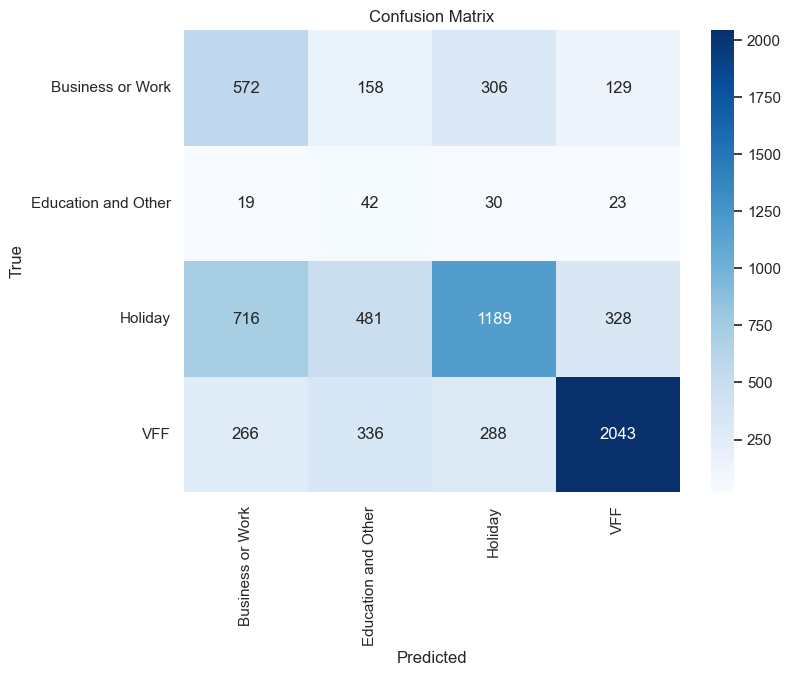

In [71]:
#Let us continue from the previous model and apply random oversampling to it

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

#train your model on the resampled data
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

#print the classification report for each class of Broad_Purpose
classification_report_str = classification_report(y_test_pd.map(label_mapping), 
                                                  y_pred_pd.map(label_mapping), zero_division=1)
print(classification_report_str)
classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']

#calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Though the classifier performance is still poor, we see that the model is now classifying instances of Business or Work. Although most of the instances are classified incorrectly, some of them are classified correctly. The model may not be improved overall, but this suggests that a bootstrapping technique could help make the classification task better and logistic regression may not be the best fit for this task.

                     precision    recall  f1-score   support

   Business or Work       0.36      0.49      0.42      1165
Education and Other       0.04      0.33      0.07       114
            Holiday       0.65      0.44      0.53      2714
                VFF       0.81      0.69      0.75      2933

           accuracy                           0.55      6926
          macro avg       0.47      0.49      0.44      6926
       weighted avg       0.66      0.55      0.59      6926



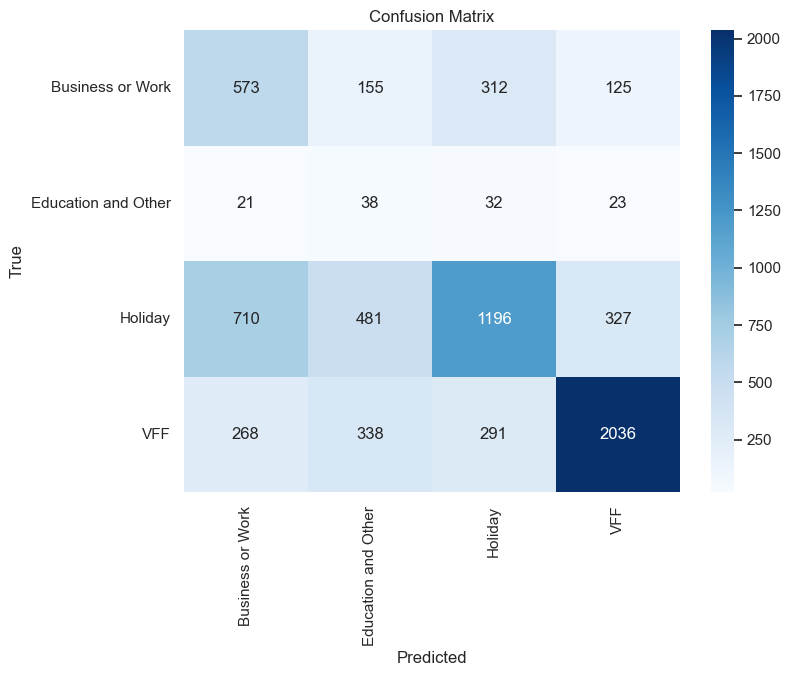

In [72]:
#a similar trend is noticed when using the balanced classes setting in the Logistic Regression model
#it attempts to balance the classes by providing weights to the classes

#calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

#train the logreg model with class weights
model = LogisticRegression(multi_class='multinomial', class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

#print the classification report for each class of Broad_Purpose
classification_report_str = classification_report(y_test_pd.map(label_mapping), 
                                                  y_pred_pd.map(label_mapping), zero_division=1)
print(classification_report_str)
classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']

#calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Random Forest

Random forests are an ensemble learning technique that use decision trees, making them robust and well equipped to deal with noisy data. This is in contrast to regression methods that are easily confused by noisy data. Random forests are a collection of decision trees that can work with any kind of data and can deal with heterogenous data. Random Forests employ bootstrapping. Bootstrap samples of the data and variables are given to each decision tree in the forest where each tree is given a different subset of the data. Then these decisions are all aggregate together to give us a more robust result.

A criticism here is that the Random Forest model is perhaps too complex for this use case as we are only using a few variables and the data is not very large. Random Forest models are most effective for predictive tasks where there are several variables with complex relations. We use this model here as the data seems to have complex relationships while being fairly hetergenous and a bootstrapping approach like Random Forest might be beneficial. However, other predictive approaches may be objectively better than the approach detailed in this file.

    A more detailed exlplanation on Random Forests can be found here:
    1. https://builtin.com/data-science/random-forest-algorithm
    2. https://towardsdatascience.com/seeing-the-random-forest-from-the-decision-trees-an-intuitive-explanation-of-random-forest-beaa2d6a0d80
    
    Working of decision trees:
    https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c

                     precision    recall  f1-score   support

   Business or Work       0.50      0.26      0.34      1165
Education and Other       0.29      0.02      0.03       114
            Holiday       0.55      0.67      0.61      2714
                VFF       0.67      0.69      0.68      2933

           accuracy                           0.60      6926
          macro avg       0.50      0.41      0.42      6926
       weighted avg       0.59      0.60      0.58      6926



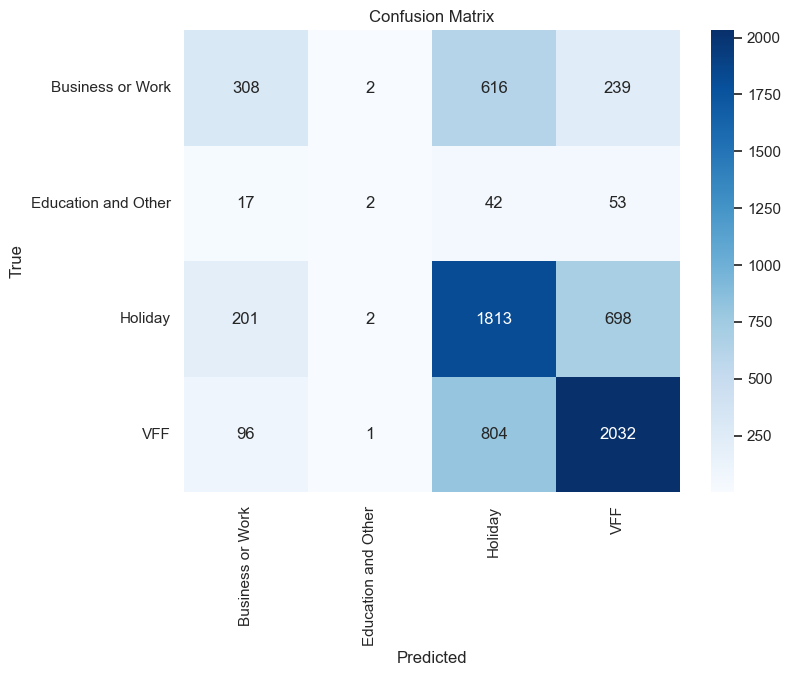

In [73]:
#let us try random forest with a few variables first

#purpose ~ nationality + stay + spend 

#encode the records into numbers
label_encoder = LabelEncoder()

merged_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Purpose'])
merged_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2022['Broad_Purpose_encoded'], merged_df_2022['Broad_Purpose']))

merged_df_2022['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Nationality'])
merged_df_2022['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Stay_Category'])
merged_df_2022['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Spend_Category'])

X = merged_df_2022[['Broad_Nationality_encoded', 'Stay_Category_encoded', 'Spend_Category_encoded']]
y = merged_df_2022['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#define the model
#we set the number of trees to 20 as we have very few variables and more trees than that is unnecessary
#this was determined by trial and error (not show in this document)
#the norm is to use 100 trees, but in this case almost no improvement was see when exceeding 20 trees
#adding more number of trees also increases the computation time
#setting a random seed to get replicable results
rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
#train the model
rf_model.fit(X_train, y_train)

#test the model
y_pred = rf_model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

classification_report_str = classification_report(y_test_pd.map(label_mapping), y_pred_pd.map(label_mapping))
print(classification_report_str)

classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


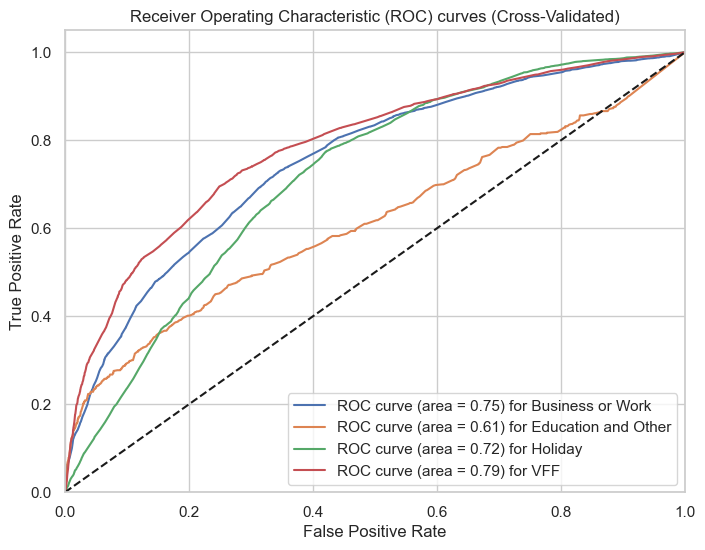

In [74]:
#let us plot ROC curves to see the tradeoff between the false positive rate and 
#true positive rate (sensitivity)

#perform cross-validation to check overfitting
y_probs_cv = cross_val_predict(rf_model, X, y, cv=5, method='predict_proba')

#compute ROC curve and ROC area for each class
fpr_cv = dict() #store the false positive rate
tpr_cv = dict() #store the true positive rate
roc_auc_cv = dict()
for i in range(len(classNames)):
    #select the predicted probabilities and sprecify the positive class label
    fpr_cv[i], tpr_cv[i], _ = metrics.roc_curve(y, y_probs_cv[:, i], pos_label=i) 
    #calculate the AUC
    roc_auc_cv[i] = metrics.auc(fpr_cv[i], tpr_cv[i])

#plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(classNames)):
    plt.plot(fpr_cv[i], tpr_cv[i], label=f'ROC curve (area = {roc_auc_cv[i]:0.2f}) for {classNames[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves (Cross-Validated)')
plt.legend(loc="lower right")
plt.show()


We see that the Random Forest model has attempted to classify instances of Business and Education, unlike the regression model, although its predictive performance for Holiday and VFF is not as good as the regression model. Let us add more variables. The ROC curves show that the performance is still poor as we want the curves to be as close as possible to the top-lefthand corner of the plot, indicating a good balance between the sensitivity and false positive rate for each of the target classes.

                     precision    recall  f1-score   support

   Business or Work       0.49      0.22      0.31      1165
Education and Other       0.40      0.04      0.06       114
            Holiday       0.62      0.77      0.69      2714
                VFF       0.78      0.81      0.79      2933

           accuracy                           0.68      6926
          macro avg       0.57      0.46      0.46      6926
       weighted avg       0.66      0.68      0.66      6926



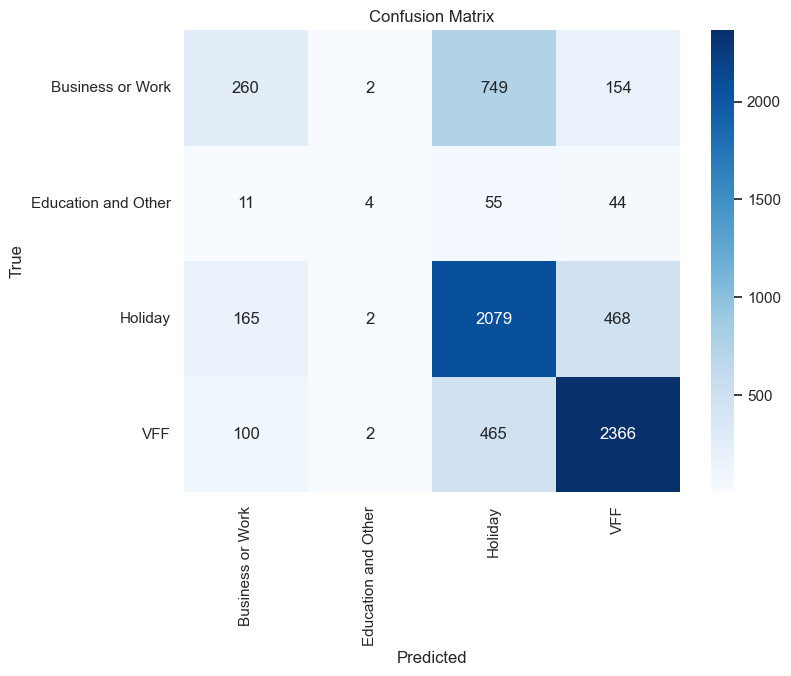

In [75]:
#purpose ~ nationality + stay + spend + accom_type
#in the regression model, accom_type significantly improved the model performance

label_encoder = LabelEncoder()

merged_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Purpose'])
merged_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2022['Broad_Purpose_encoded'], merged_df_2022['Broad_Purpose']))

merged_df_2022['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Nationality'])
merged_df_2022['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Stay_Category'])
merged_df_2022['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Spend_Category'])

X = merged_df_2022[['Broad_Nationality_encoded', 'Stay_Category_encoded', 'Spend_Category_encoded', 
                    'accom_type']]
y = merged_df_2022['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
#train the model
rf_model.fit(X_train, y_train)

#test the model
y_pred = rf_model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

classification_report_str = classification_report(y_test_pd.map(label_mapping), y_pred_pd.map(label_mapping))
print(classification_report_str)

classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


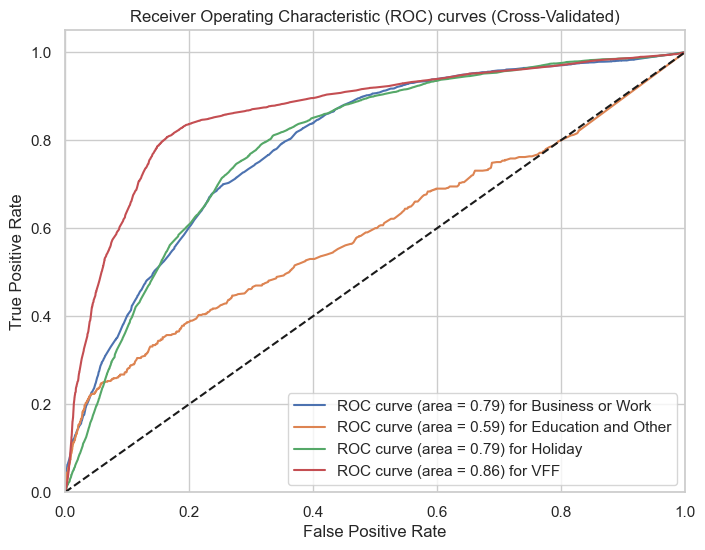

In [76]:
#plot ROC curves 

#perform cross-validation to check overfitting
y_probs_cv = cross_val_predict(rf_model, X, y, cv=5, method='predict_proba')

#compute ROC curve and ROC area for each class
fpr_cv = dict() #store the false positive rate
tpr_cv = dict() #store the true positive rate
roc_auc_cv = dict()
for i in range(len(classNames)):
    #select the predicted probabilities and sprecify the positive class label
    fpr_cv[i], tpr_cv[i], _ = metrics.roc_curve(y, y_probs_cv[:, i], pos_label=i) 
    #calculate the AUC
    roc_auc_cv[i] = metrics.auc(fpr_cv[i], tpr_cv[i])

#plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(classNames)):
    plt.plot(fpr_cv[i], tpr_cv[i], label=f'ROC curve (area = {roc_auc_cv[i]:0.2f}) for {classNames[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves (Cross-Validated)')
plt.legend(loc="lower right")
plt.show()


We see that adding accom_type improved the performance for all classes except Education and Other. Let us add more variables.

                     precision    recall  f1-score   support

   Business or Work       0.51      0.37      0.43      1165
Education and Other       0.29      0.09      0.13       114
            Holiday       0.63      0.72      0.67      2714
                VFF       0.78      0.78      0.78      2933

           accuracy                           0.68      6926
          macro avg       0.55      0.49      0.50      6926
       weighted avg       0.67      0.68      0.67      6926



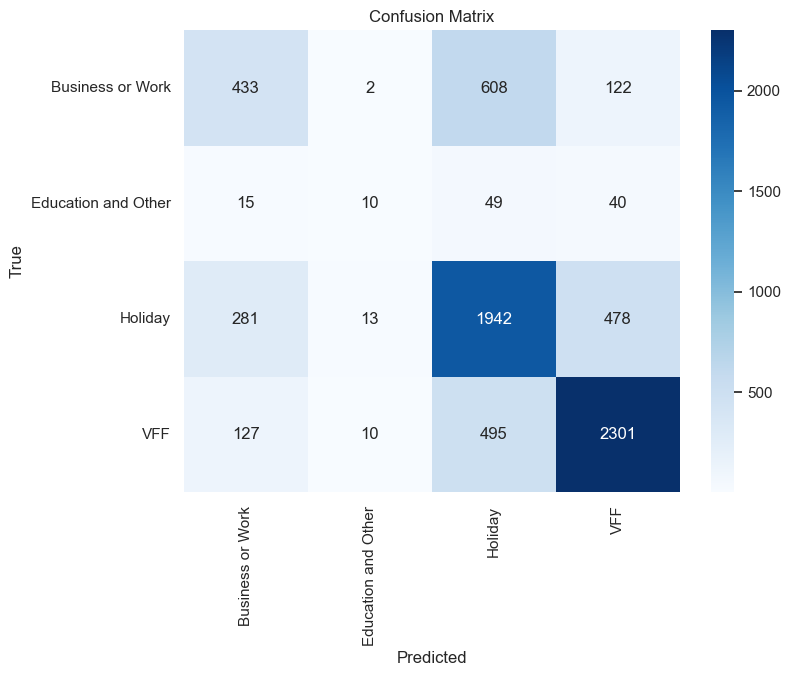

In [77]:
#purpose ~ nationality + stay + spend + accom_type + london_or_out + flow + age

label_encoder = LabelEncoder()

merged_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Purpose'])
merged_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2022['Broad_Purpose_encoded'], merged_df_2022['Broad_Purpose']))

merged_df_2022['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Nationality'])
merged_df_2022['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Stay_Category'])
merged_df_2022['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Spend_Category'])

X = merged_df_2022[['Broad_Nationality_encoded', 'Stay_Category_encoded', 'Spend_Category_encoded', 
                    'accom_type', 'London_or_out', 'Flow', 'Age']]
y = merged_df_2022['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
#train the model
rf_model.fit(X_train, y_train)

#test the model
y_pred = rf_model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

classification_report_str = classification_report(y_test_pd.map(label_mapping), y_pred_pd.map(label_mapping))
print(classification_report_str)

classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


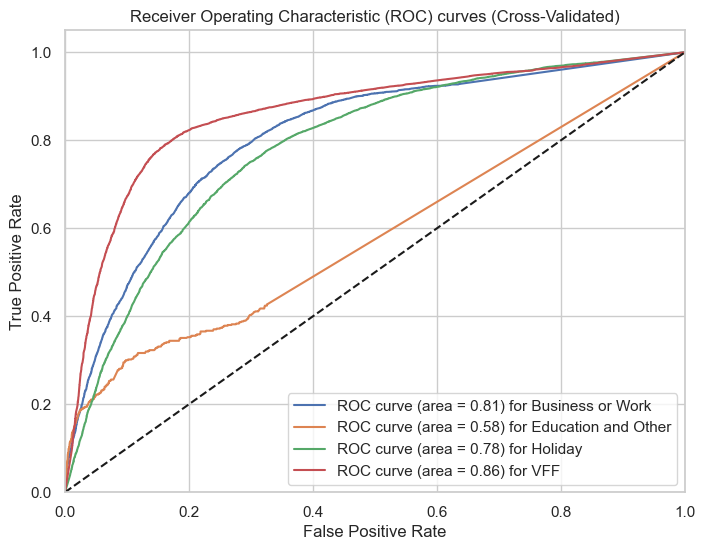

In [78]:
#plot ROC curves 

#perform cross-validation to check overfitting
y_probs_cv = cross_val_predict(rf_model, X, y, cv=5, method='predict_proba')

#compute ROC curve and ROC area for each class
fpr_cv = dict() #store the false positive rate
tpr_cv = dict() #store the true positive rate
roc_auc_cv = dict()
for i in range(len(classNames)):
    #select the predicted probabilities and sprecify the positive class label
    fpr_cv[i], tpr_cv[i], _ = metrics.roc_curve(y, y_probs_cv[:, i], pos_label=i) 
    #calculate the AUC
    roc_auc_cv[i] = metrics.auc(fpr_cv[i], tpr_cv[i])

#plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(classNames)):
    plt.plot(fpr_cv[i], tpr_cv[i], label=f'ROC curve (area = {roc_auc_cv[i]:0.2f}) for {classNames[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves (Cross-Validated)')
plt.legend(loc="lower right")
plt.show()


Adding these variables seems to improve the performance for Business or Work, but did not make much of a difference to the other classes.

                     precision    recall  f1-score   support

   Business or Work       0.56      0.50      0.53      1165
Education and Other       0.20      0.07      0.10       114
            Holiday       0.64      0.68      0.66      2714
                VFF       0.77      0.77      0.77      2933

           accuracy                           0.68      6926
          macro avg       0.54      0.51      0.51      6926
       weighted avg       0.67      0.68      0.67      6926



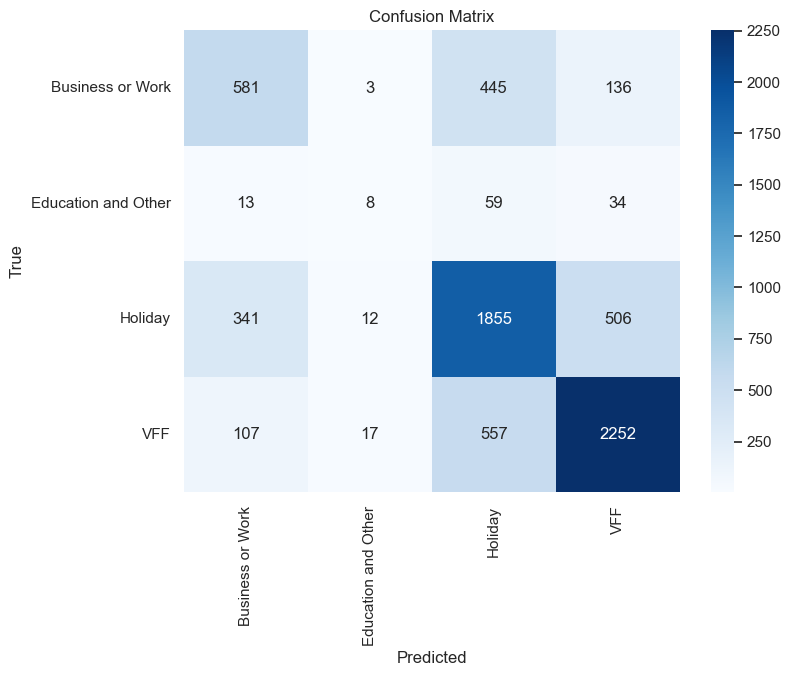

In [79]:
#purpose ~ nationality + stay + spend + accom_type + london_or_out + flow + age 
# + DayOfWeek + TripStartDay
#in the regression model, accom_type significantly improved the model performance

label_encoder = LabelEncoder()

merged_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Purpose'])
merged_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2022['Broad_Purpose_encoded'], merged_df_2022['Broad_Purpose']))

#we will need these label mappings later
merged_df_2022['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2022['Broad_Nationality'])
merged_df_2022['Original_Broad_Nationality'] = label_encoder.inverse_transform(merged_df_2022['Broad_Nationality_encoded'])
label_mapping_nat = dict(zip(merged_df_2022['Broad_Nationality_encoded'], merged_df_2022['Broad_Nationality']))

merged_df_2022['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Stay_Category'])
merged_df_2022['Original_Stay_Category'] = label_encoder.inverse_transform(merged_df_2022['Stay_Category_encoded'])
label_mapping_stay = dict(zip(merged_df_2022['Stay_Category_encoded'], merged_df_2022['Stay_Category']))

merged_df_2022['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2022['Spend_Category'])
merged_df_2022['Original_Spend_Category'] = label_encoder.inverse_transform(merged_df_2022['Spend_Category_encoded'])
label_mapping_spend = dict(zip(merged_df_2022['Spend_Category_encoded'], merged_df_2022['Spend_Category']))

X = merged_df_2022[['Broad_Nationality_encoded', 'Stay_Category_encoded', 'Spend_Category_encoded', 
                    'accom_type', 'London_or_out', 'Flow', 'Age', 'DayOfWeek', 'TripStartDay']]
y = merged_df_2022['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
#train the model
rf_model.fit(X_train, y_train)

#test the model
y_pred = rf_model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

classification_report_str = classification_report(y_test_pd.map(label_mapping), y_pred_pd.map(label_mapping))
print(classification_report_str)

classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


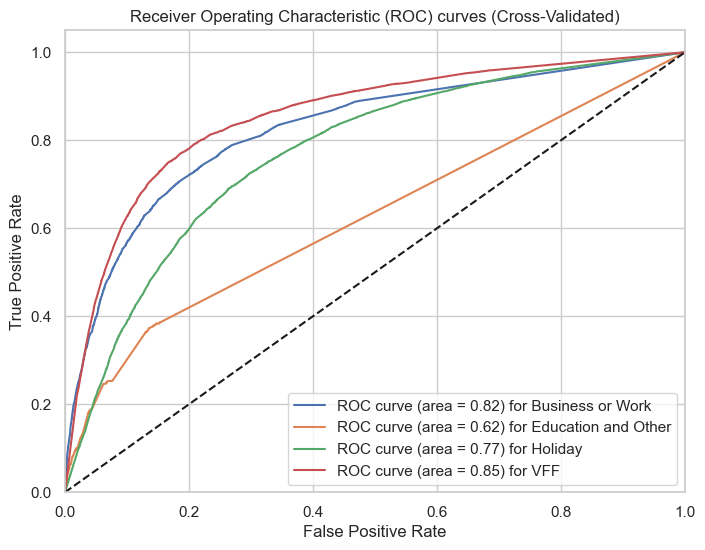

In [80]:
#plot ROC curves 

#perform cross-validation to check overfitting
y_probs_cv = cross_val_predict(rf_model, X, y, cv=5, method='predict_proba')

#compute ROC curve and ROC area for each class
fpr_cv = dict() #store the false positive rate
tpr_cv = dict() #store the true positive rate
roc_auc_cv = dict()
for i in range(len(classNames)):
    #select the predicted probabilities and sprecify the positive class label
    fpr_cv[i], tpr_cv[i], _ = metrics.roc_curve(y, y_probs_cv[:, i], pos_label=i) 
    #calculate the AUC
    roc_auc_cv[i] = metrics.auc(fpr_cv[i], tpr_cv[i])

#plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(classNames)):
    plt.plot(fpr_cv[i], tpr_cv[i], label=f'ROC curve (area = {roc_auc_cv[i]:0.2f}) for {classNames[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves (Cross-Validated)')
plt.legend(loc="lower right")
plt.show()


We will now stop adding more variables as the model appears to be at maximum performance here and adding more variables will like degrade the model performance and add to its complexity. The performance for 'Education and Other' is still quite poor, but this possibly due to the sample size for the class being disproportionately small.

Let us now visualise the random forest.

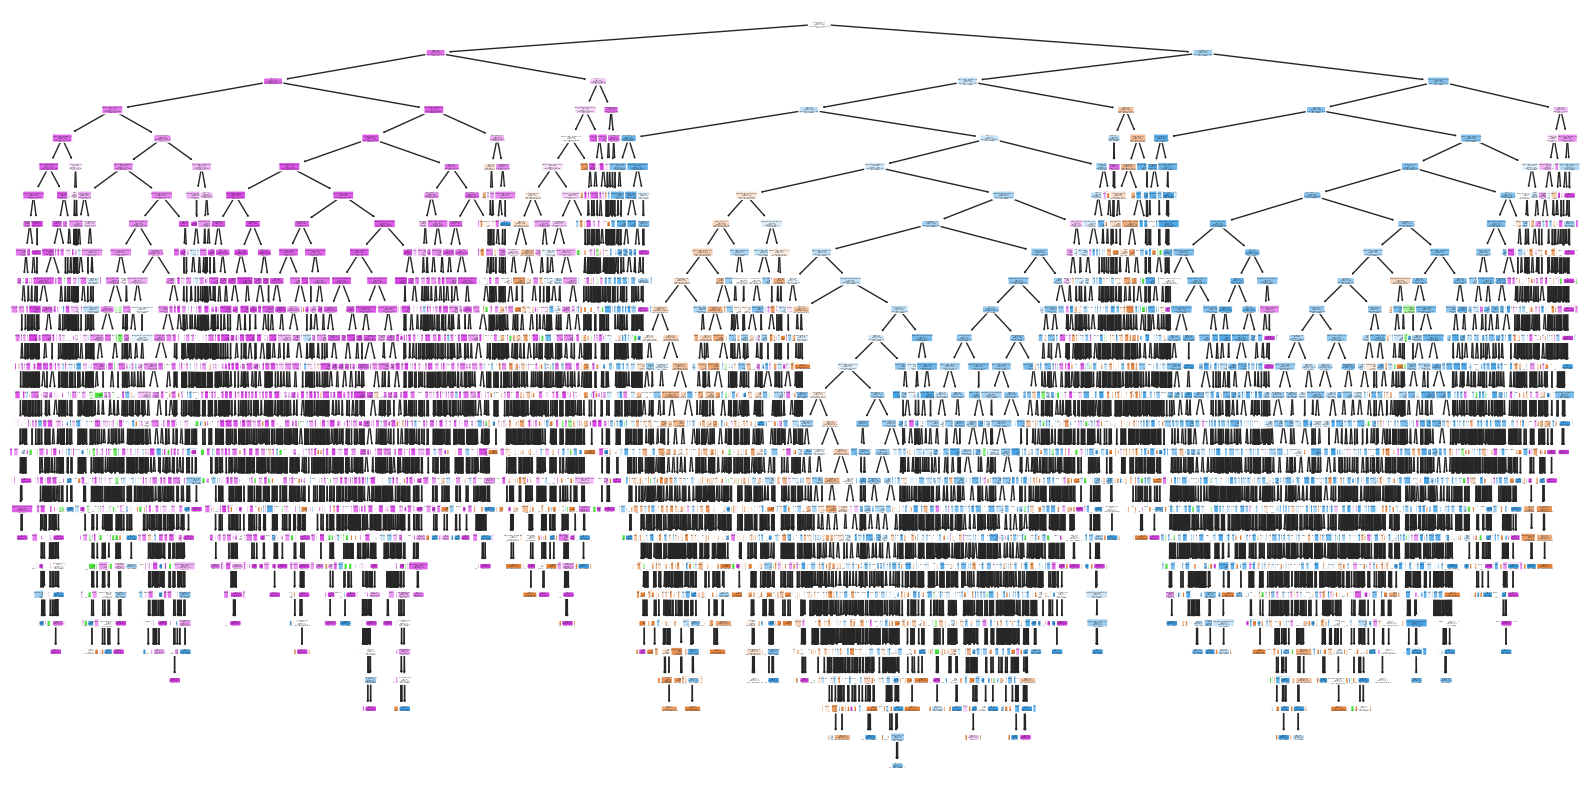

In [81]:
#convert the predictor variables to a list
feature_names_list = list(X.columns)

plt.figure(figsize=(20, 10))
#plot the tree model
#the plot_tree() function is used to visualise a decision tree.
#rf_model.estimators_ is an attribute of the RandomForestClassifier object that contains a list of 
#decision trees in the random forest. We are indexing with [0] to select the first decision tree in the 
#list to plot. Each tree is built independently.
#feature_names_list is a list of feature names. It is used to label each node with the 
#predictor (feature) that is used for splitting at that node. 
#class_names specifies the names of the target classes. It helps label the leaves of the decision tree 
#with the corresponding class names.
plot_tree(rf_model.estimators_[0], filled=True, feature_names=feature_names_list, class_names=classNames, 
          rounded=True)
plt.show()

#this block of code takes a long time to run. The more number of trees, the more complex the forest
#and hence more the time taken to visualise it

This is a visualisation of the whole forest. To see what variables the splitting is based on, we can zoom in on the tree.

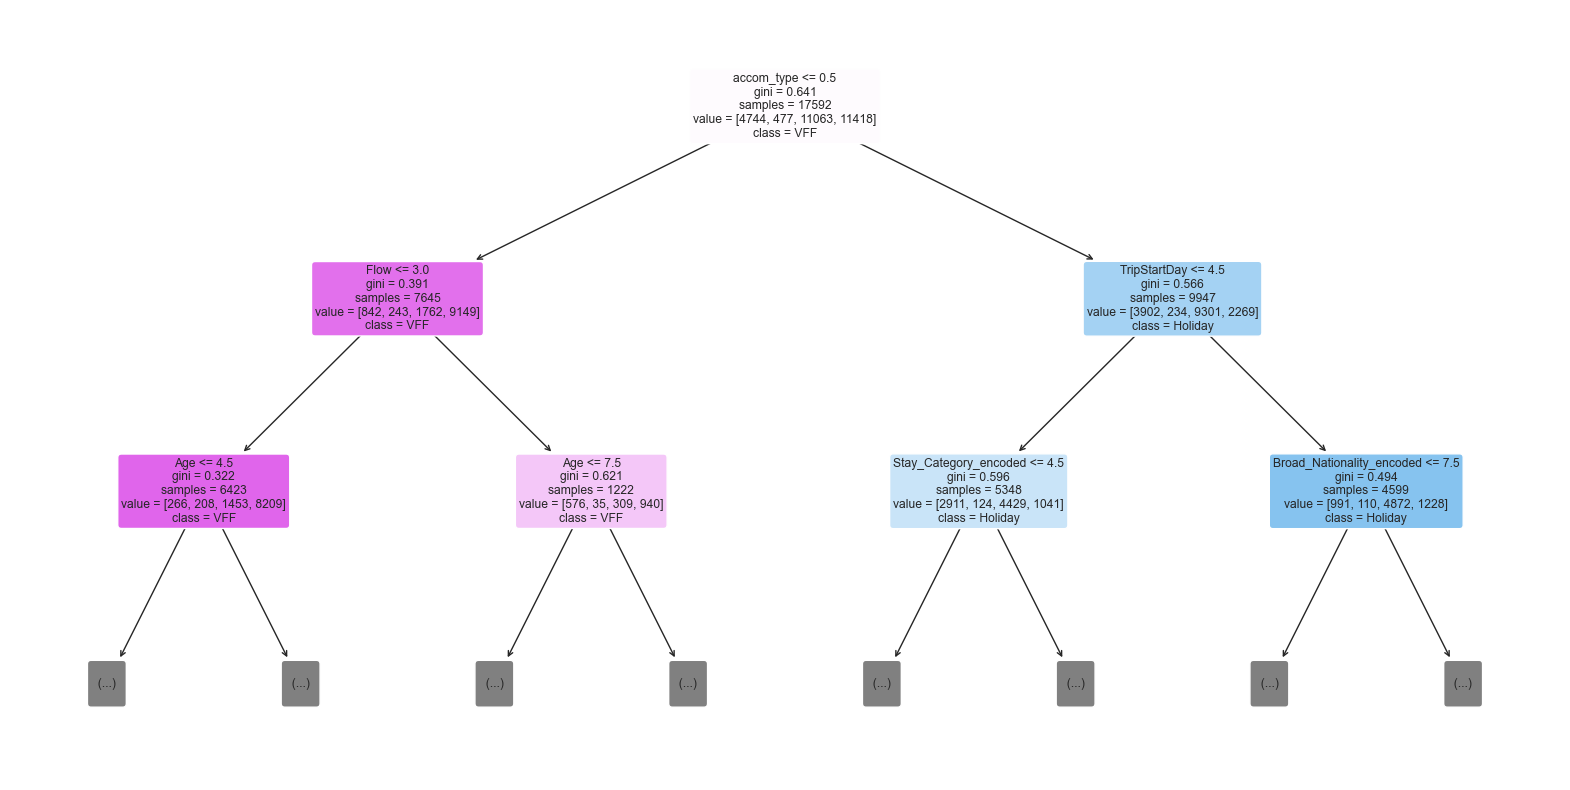

In [82]:
#set max_depth to 2 to be able to see 2 levels of the tree from the root node
#this can be increased, but for the sake of readability we choose 2 here
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=feature_names_list, class_names=classNames, 
          rounded=True, max_depth=2)
plt.show()

We see that the variable at the root node is accom_type (unsurprisingly, as it contributed to the most improvement in model performance). It means that this variable is the most impure (measured in terms of Gini index) and has the most information with respect to the classification task. 

Let's break down the information inside the root node:

accom_type <= 0.05: This is the splitting criterion that the decision tree uses to partition the data at the root node. It indicates that if the value of accom_type is less than or equal to 0.05, the data will follow the left branch of the tree, otherwise, it will follow the right branch. In our case it means that if a particular record has the value 0 for accom_type (accommodation was not a hotel or AirBnB or this information was missing), it needs to follow the left branch to make successive decisions. If it was greater than 0.05 (i.e., 1 (Hotel) or 2 (AirBnB), it should follow the right branch).

gini = 0.641: Gini impurity is a measure of the variable's impurity. It ranges from 0 to 1, where 0 means the node is pure (all samples belong to the same class), and 1 means the node is completely impure (samples are evenly distributed across all classes). Here, a Gini index of 0.641 suggests that accom_type contains a moderate amount of instances from all its classes and hence has the most information to offer. This makes it the ideal choice for the root node.

samples = 17592: This is the number of samples that were used at this node during training. Notice that in successive levels of the tree, the number of samples reduce at each node as the samples are being split. 

value = [4744, 477, 11063, 11418]: This shows the distribution of samples from each class at the node. In this case, there are 4744 samples of "Business or Work", 477 samples of "Education and Other", 11063 samples of "Holiday", and 11418 samples of "VFF".

class = VFF: This indicates the predicted class for the majority of samples at this node. In this case, most of the samples have the target class VFF. Essentially, the classification at this level is VFF and not VFF and hence the information is passed down the tree for better classification.

This process continues successively over different levels of the tree until it reaches the leaf nodes. Each leaf will have the target class for that particular branch. This is the decision for that particular tree branch.

### Extracting Probabilities from RF

Each decision tree in the forest provides it's own decision (prediction of the target class) based on the bootstrap sample provided to it. The leaf nodes of these multiple trees contain different decisions based on the information passed down the branch. The final decision outputted by the Random Forest is a majority vote of all these decisions. In essence, the decisions can be seen as a set of probabilities. For example, for a particular record, if 60% of the leaves were Holiday, 25% were VFF, 10% were Business and 5% were Education, then the decision outputted by the forest would be Holiday, but we could still view this probability breakdown as there is still a 25% chance that the particular instance could be VFF, a 10% chance that it could be Business and so on.

Let's view the probabilities predicted by the model.

In [83]:
#we want to view the predictions made on the test set

#predict class probabilities on test set
y_prob = rf_model.predict_proba(X_test)
#convert the probabilities to df
prob_df = pd.DataFrame(y_prob, columns=classNames)
#concatenate class labels 
result_df = pd.concat([y_test_pd.map(label_mapping).reset_index(drop=True), prob_df], axis=1)
#concatenate all columns horizontally
concatenated_df = pd.concat([result_df['Broad_Purpose_encoded'], prob_df], axis=1)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#display it in tabular format
tabulated_df = tabulate(concatenated_df, headers='keys', tablefmt='fancy_grid')
#print(tabulated_df)
#uncomment the above line to view output

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In this table, the first column Broad_Purpose_encoded is the true label. The subsequent columns are the probabilities for each record, as predicted by the model. We can see that for the first record, the model correctly predicts the isntance to be Holiday (taking the highest probability), but in the second records, it confidently makes the wrong prediction (Holiday insgtead of VFF).

In [84]:
accuracy = accuracy_score(y_test, y_pred)

#print the overall accuracy of the predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 67.80%


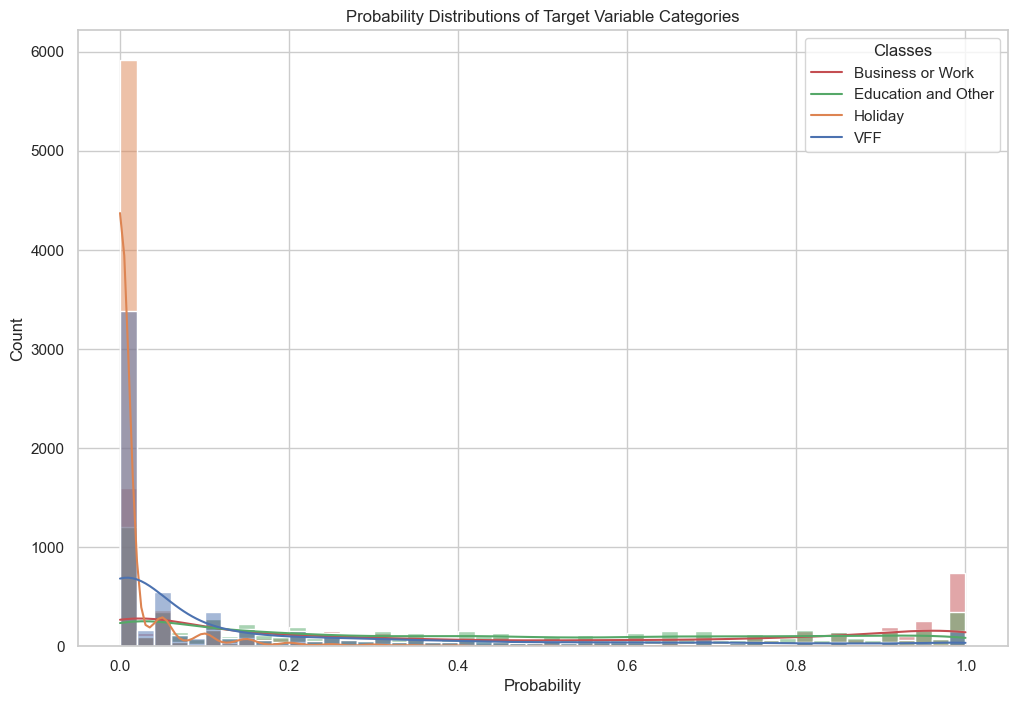

In [85]:
#plot the probability distributions for each class
plt.figure(figsize=(12, 8))
sns.histplot(data=prob_df, kde=True, bins=50)
plt.title('Probability Distributions of Target Variable Categories')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.legend(title='Classes', labels=classNames)
plt.show()


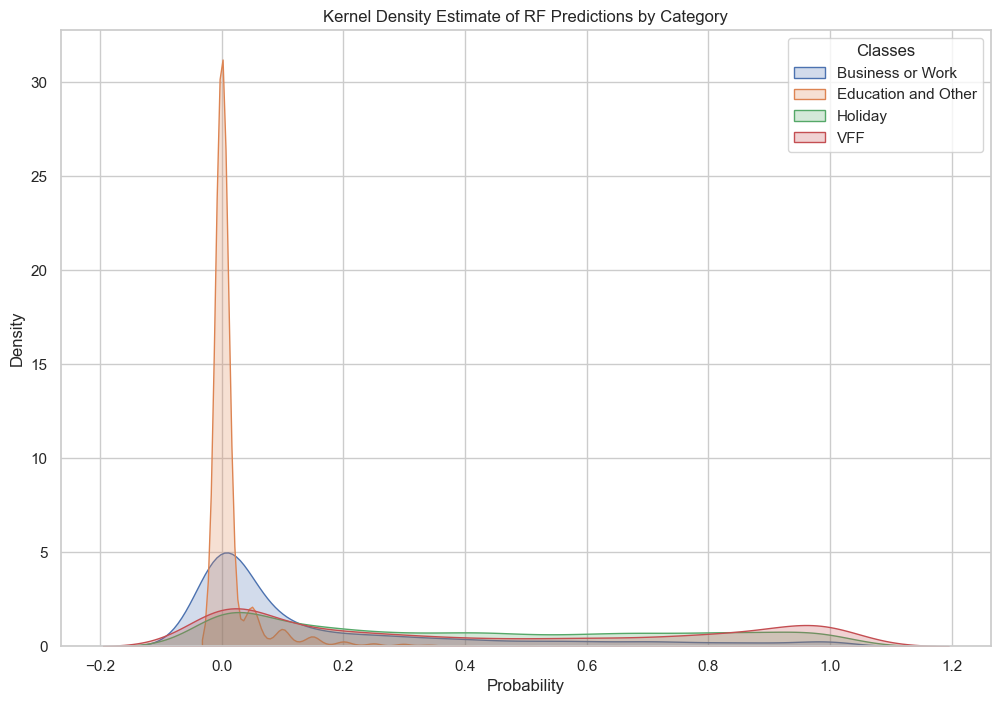

In [86]:
#let's visualise the Kernel Density Estimate 

#only KDE lines
plt.figure(figsize=(12, 8))

#loop through each class and plot the KDE line
for class_name in classNames:
    sns.kdeplot(prob_df[class_name], label=class_name, shade=True)

plt.title('Kernel Density Estimate of RF Predictions by Category')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend(title='Classes')
plt.show()


A KDE plot is a visual summary of the predicted probabilities generated by the model. Understanding the distribution can help assess the model's confidence in its predictions.

The sharp peak at zero for "Education and Other" indicates that the model is very confident in its predictions for this class, but this is likely misclassification or bias due to the class imbalance, or potentially due to a lack of distinguishing features for this class. The model struggles to make accurate predictions for this class. The broad peaks for the other classes indicates uncertainty or overlap with other classes.

KDE plots can also help assess the calibration of the model. A well-calibrated model should assign higher probabilities to instances that belong to the predicted class and lower probabilities to instances that do not. Assigning high probabilities to incorrect predictions or assigning low probabilities to correct predictions, can be detected from the KDE plot and we can assess how confident the model is. We see that this model is not particularly confident when making predictions for individual instances.

In [87]:
#exporting these predictions as a csv file to use later

y_prob = rf_model.predict_proba(X_test)
prob_df = pd.DataFrame(y_prob, columns=classNames)

#concatenate the actual class labels with the probability DataFrame
result_df = pd.concat([y_test_pd.map(label_mapping).reset_index(drop=True), prob_df], axis=1)

#concatenate all columns horizontally
concatenated_df = pd.concat([X_test.reset_index(drop=True).replace({
    'Broad_Nationality_encoded': label_mapping_nat,
    'Stay_Category_encoded': label_mapping_stay,
    'Spend_Category_encoded': label_mapping_spend,
}), result_df], axis=1)

print(concatenated_df.head())  

#export to CSV
concatenated_df.to_csv('rf2022_predicted_probabilities.csv', index=False)

#the first nine columns in the output below are the predictor variables in this test set. 
#Broad_Purpose_encoded is the true label. The last 4 columns are the model's predictions
#we can use this information to see what different combinations of values in the predictor variables
#leads the model to make a certain prediction.

  Broad_Nationality_encoded Stay_Category_encoded Spend_Category_encoded  \
0             North America            14-27 days          1000-5000 GBP   
1                        EU              1-3 days            250-500 GBP   
2                        EU              1-3 days              0-250 GBP   
3                        EU             4-13 days              0-250 GBP   
4                      Asia            14-27 days     more than 5000 GBP   

   accom_type  London_or_out  Flow  Age  DayOfWeek  TripStartDay  \
0           1              0   1.0    8          3           4.0   
1           1              0   1.0    2          5           4.0   
2           2              0   1.0    4          2           7.0   
3           0              1   5.0    7          6           4.0   
4           1              1   1.0    4          1           2.0   

  Broad_Purpose_encoded  Business or Work  Education and Other   Holiday  \
0               Holiday          0.000000                 

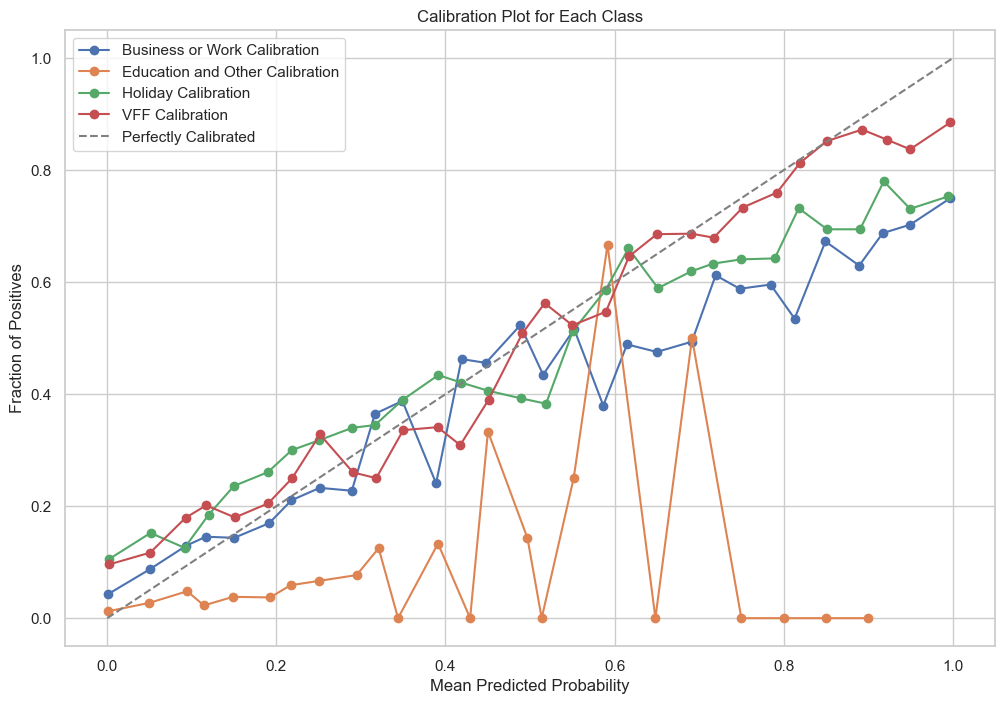

In [88]:
#let's create calibration plots

y_prob = rf_model.predict_proba(X_test)

#create a calibration plot for each class
plt.figure(figsize=(12, 8))
for class_name in classNames:
    class_index = classNames.index(class_name)
    prob_true, prob_pred = calibration_curve(y_test_pd.map(label_mapping) == class_name, 
                                             y_prob[:, class_index], n_bins=30, strategy='uniform')
    plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label=f'{class_name} Calibration')

#diagonal line to represent perfectly calibrated model
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')

plt.title('Calibration Plot for Each Class')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.show()



A calibration curve is a plot of the true positive rate against the predicted positive rate across different probability bins. It helps assess the calibration or reliability of the predicted probabilities from the model.

In the plot, the calibration line should ideally be as close as possible to the dotted grey line (perfect calibration). This would mean that the model neither underestimates the higher probabilities nor does it overestimate the lower probabilities.

Here we see that the model slightly overestimes the number of lower probabilities (assigns a probability higher than 0 when it should really be 0). This indicates that the model is slightly over confident here.
If the curve lies above the diagonal line, the model is overconfident. This means there are more instances with predicted probabilities greater than 0 than there should be (for the area near the origin), and the model's confidence in its predictions is higher than the actual success rate.

The curve for the higher probabilities lies below the diagonal line, indicating that the model is underconfident. In this case, instances with high predicted probabilities are less frequent than they should be. We see this especially in the case of "Education and Other".


So far, we tested all these models on 2022 data. Let's see if we get similar results on older data.

                     precision    recall  f1-score   support

   Business or Work       0.66      0.62      0.64      1244
Education and Other       0.37      0.22      0.28       140
            Holiday       0.65      0.68      0.66      2125
                VFF       0.71      0.72      0.71      1771

           accuracy                           0.67      5280
          macro avg       0.60      0.56      0.57      5280
       weighted avg       0.66      0.67      0.66      5280



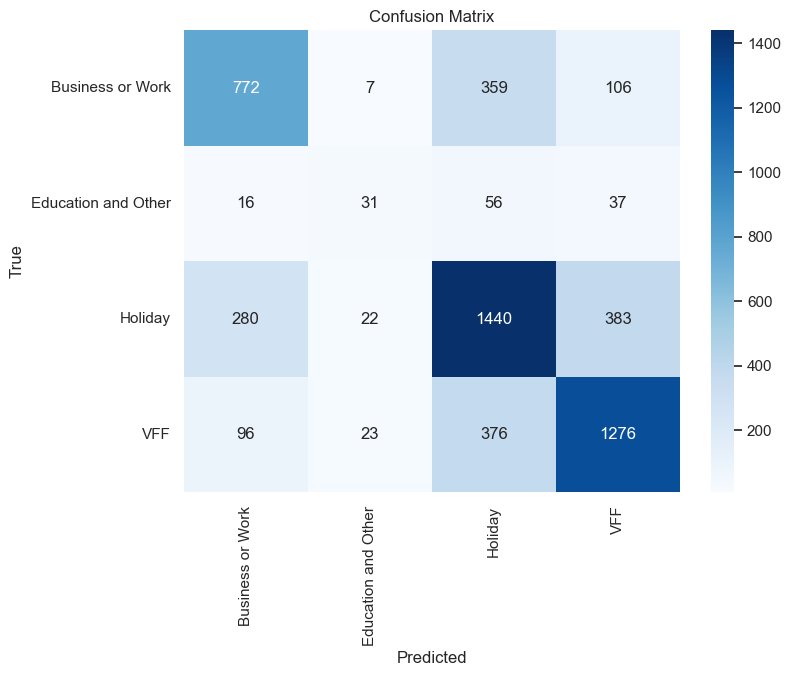

In [89]:
#2019 data
#purpose ~ nationality + stay + spend + accom_type + london_or_out + flow + age 
# + DayOfWeek + TripStartDay

label_encoder = LabelEncoder()

merged_df_2019['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2019['Broad_Purpose'])
merged_df_2019['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2019['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2019['Broad_Purpose_encoded'], merged_df_2019['Broad_Purpose']))

#we will need these label mappings later
merged_df_2019['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2019['Broad_Nationality'])
merged_df_2019['Original_Broad_Nationality'] = label_encoder.inverse_transform(merged_df_2019['Broad_Nationality_encoded'])
label_mapping_nat = dict(zip(merged_df_2019['Broad_Nationality_encoded'], merged_df_2019['Broad_Nationality']))

merged_df_2019['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2019['Stay_Category'])
merged_df_2019['Original_Stay_Category'] = label_encoder.inverse_transform(merged_df_2019['Stay_Category_encoded'])
label_mapping_stay = dict(zip(merged_df_2019['Stay_Category_encoded'], merged_df_2019['Stay_Category']))

merged_df_2019['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2019['Spend_Category'])
merged_df_2019['Original_Spend_Category'] = label_encoder.inverse_transform(merged_df_2019['Spend_Category_encoded'])
label_mapping_spend = dict(zip(merged_df_2019['Spend_Category_encoded'], merged_df_2019['Spend_Category']))

X = merged_df_2019[['Broad_Nationality_encoded', 'Stay_Category_encoded', 'Spend_Category_encoded', 
                    'accom_type', 'London_or_out', 'Flow', 'Age', 'DayOfWeek', 'TripStartDay']]
y = merged_df_2019['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
#train the model
rf_model.fit(X_train, y_train)

#test the model
y_pred = rf_model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

classification_report_str = classification_report(y_test_pd.map(label_mapping), y_pred_pd.map(label_mapping))
print(classification_report_str)

classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


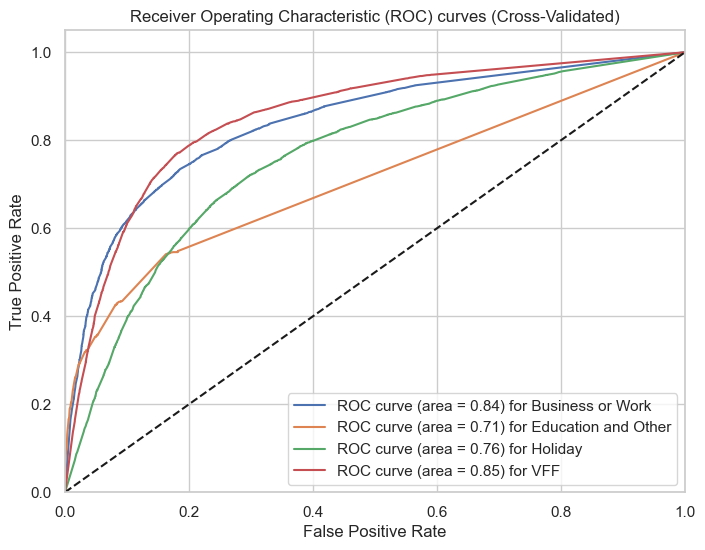

In [90]:
#plot ROC curves 

#perform cross-validation to check overfitting
y_probs_cv = cross_val_predict(rf_model, X, y, cv=5, method='predict_proba')

#compute ROC curve and ROC area for each class
fpr_cv = dict() #store the false positive rate
tpr_cv = dict() #store the true positive rate
roc_auc_cv = dict()
for i in range(len(classNames)):
    #select the predicted probabilities and sprecify the positive class label
    fpr_cv[i], tpr_cv[i], _ = metrics.roc_curve(y, y_probs_cv[:, i], pos_label=i) 
    #calculate the AUC
    roc_auc_cv[i] = metrics.auc(fpr_cv[i], tpr_cv[i])

#plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(classNames)):
    plt.plot(fpr_cv[i], tpr_cv[i], label=f'ROC curve (area = {roc_auc_cv[i]:0.2f}) for {classNames[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves (Cross-Validated)')
plt.legend(loc="lower right")
plt.show()


We see that this model performs better on the 2019 data (especially for class Education) that it did on the 2022 data.

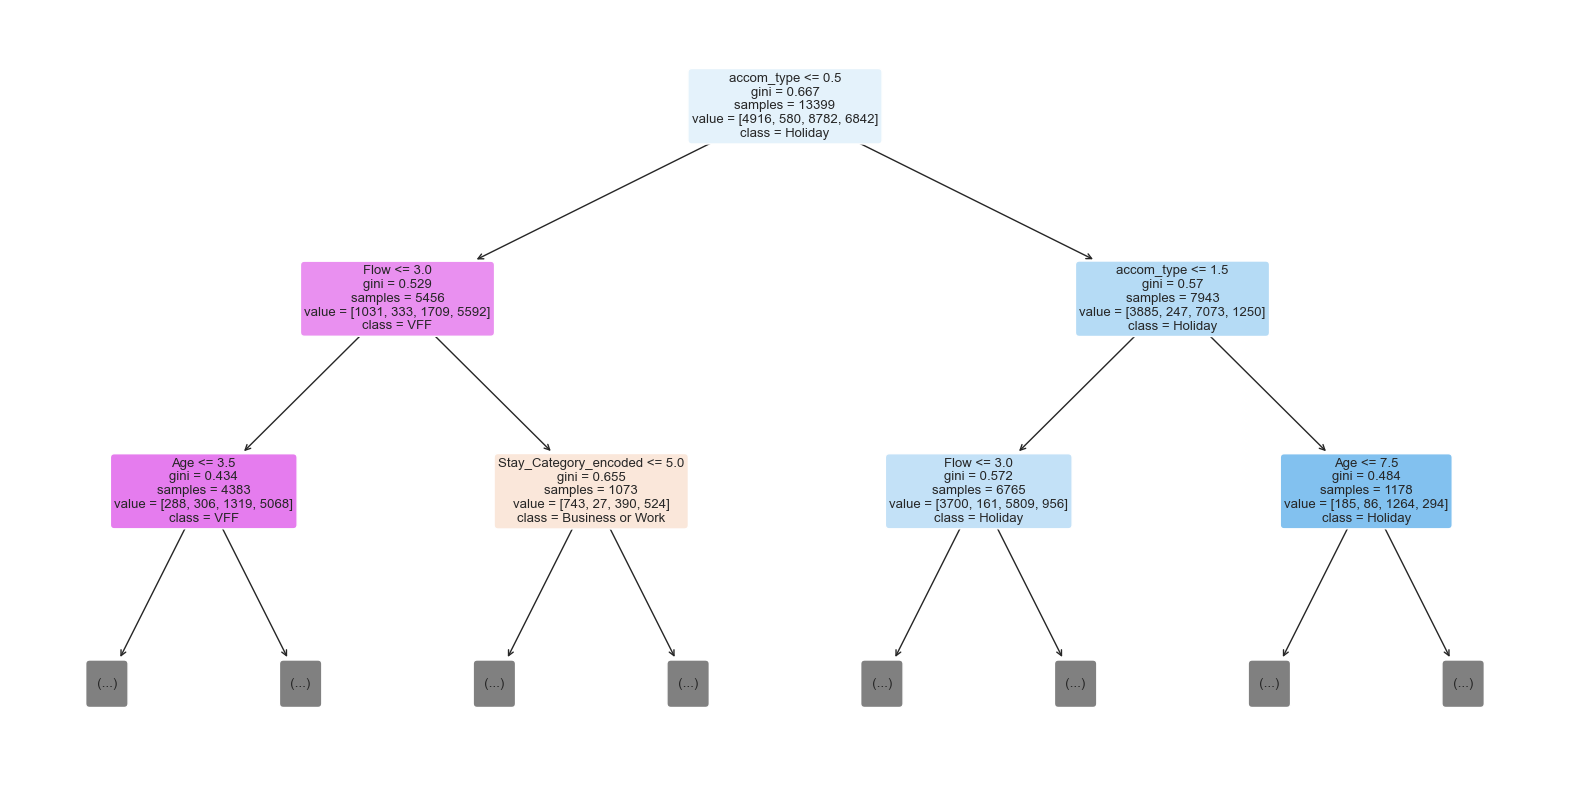

In [91]:
#visualise the tree
feature_names_list = list(X.columns)

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=feature_names_list, class_names=classNames, 
          rounded=True, max_depth=2)
plt.show()

Again we see that the root node is accom_type, but the subsequent nodes are different from the tree that used 2022 data.

In [92]:
#we want to view the predictions made on the test set

#predict class probabilities on test set
y_prob = rf_model.predict_proba(X_test)
#convert the probabilities to df
prob_df = pd.DataFrame(y_prob, columns=classNames)
#concatenate class labels 
result_df = pd.concat([y_test_pd.map(label_mapping).reset_index(drop=True), prob_df], axis=1)
#concatenate all columns horizontally
concatenated_df = pd.concat([result_df['Broad_Purpose_encoded'], prob_df], axis=1)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#display it in tabular format
tabulated_df = tabulate(concatenated_df, headers='keys', tablefmt='fancy_grid')
#print(tabulated_df)
#uncomment the above line to view output

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [93]:
accuracy = accuracy_score(y_test, y_pred)

#print the overall accuracy of the predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 66.65%


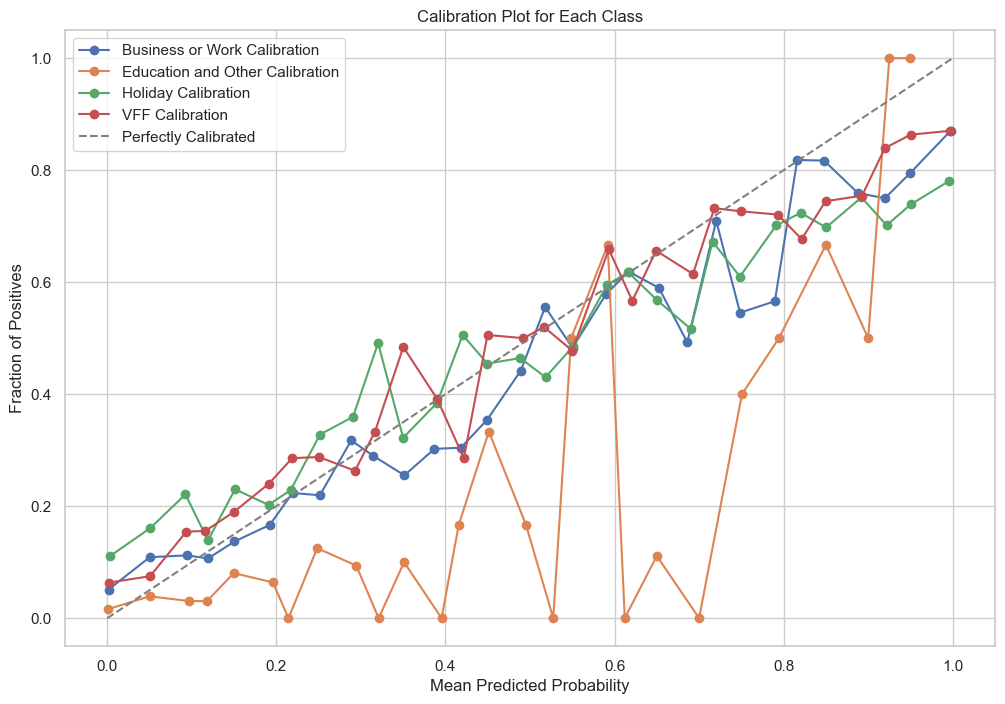

In [94]:
#calibration plot

y_prob = rf_model.predict_proba(X_test)

#create a calibration plot for each class
plt.figure(figsize=(12, 8))
for class_name in classNames:
    class_index = classNames.index(class_name)
    prob_true, prob_pred = calibration_curve(y_test_pd.map(label_mapping) == class_name, 
                                             y_prob[:, class_index], n_bins=30, strategy='uniform')
    plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label=f'{class_name} Calibration')

#diagonal line to represent perfectly calibrated model
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')

plt.title('Calibration Plot for Each Class')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.show()

In [95]:
#exporting these predictions as a csv file to use later

y_prob = rf_model.predict_proba(X_test)
prob_df = pd.DataFrame(y_prob, columns=classNames)

#concatenate the actual class labels with the probability DataFrame
result_df = pd.concat([y_test_pd.map(label_mapping).reset_index(drop=True), prob_df], axis=1)

#concatenate all columns horizontally
concatenated_df = pd.concat([X_test.reset_index(drop=True).replace({
    'Broad_Nationality_encoded': label_mapping_nat,
    'Stay_Category_encoded': label_mapping_stay,
    'Spend_Category_encoded': label_mapping_spend,
}), result_df], axis=1)

print(concatenated_df.head())  

#export to CSV
concatenated_df.to_csv('rf2019_predicted_probabilities.csv', index=False)


  Broad_Nationality_encoded Stay_Category_encoded Spend_Category_encoded  \
0                        UK            14-27 days              0-250 GBP   
1                        EU             4-13 days            250-500 GBP   
2                        UK             4-13 days            250-500 GBP   
3             North America             4-13 days              0-250 GBP   
4                      Asia             4-13 days          1000-5000 GBP   

   accom_type  London_or_out  Flow  Age  DayOfWeek  TripStartDay  \
0           0              0   1.0    6          2             7   
1           1              1   1.0    5          2             6   
2           0              0   1.0    4          3             7   
3           0              0   1.0    7          4             5   
4           2              1   1.0    5          6             2   

  Broad_Purpose_encoded  Business or Work  Education and Other   Holiday  \
0                   VFF               0.0                 

                     precision    recall  f1-score   support

   Business or Work       0.63      0.60      0.62      1243
Education and Other       0.38      0.23      0.29       129
            Holiday       0.63      0.67      0.65      2127
                VFF       0.70      0.70      0.70      1744

           accuracy                           0.65      5243
          macro avg       0.59      0.55      0.56      5243
       weighted avg       0.65      0.65      0.65      5243



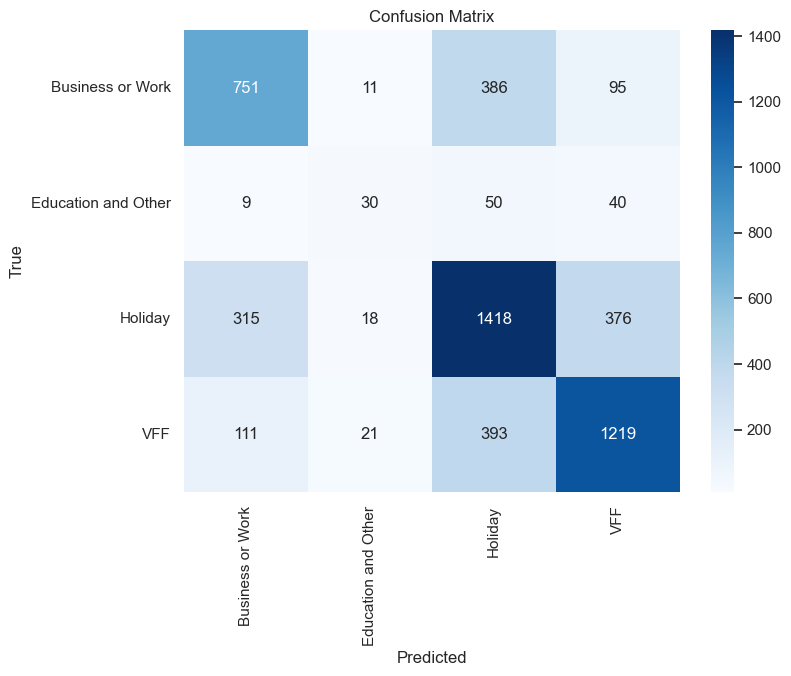

In [96]:
#testing the model on 2018 data

#purpose ~ nationality + stay + spend + accom_type + london_or_out + flow + age 
# + DayOfWeek + TripStartDay

label_encoder = LabelEncoder()

merged_df_2018['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2018['Broad_Purpose'])
merged_df_2018['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2018['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2018['Broad_Purpose_encoded'], merged_df_2018['Broad_Purpose']))

#we will need these label mappings later
merged_df_2018['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2018['Broad_Nationality'])
merged_df_2018['Original_Broad_Nationality'] = label_encoder.inverse_transform(merged_df_2018['Broad_Nationality_encoded'])
label_mapping_nat = dict(zip(merged_df_2018['Broad_Nationality_encoded'], merged_df_2018['Broad_Nationality']))

merged_df_2018['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2018['Stay_Category'])
merged_df_2018['Original_Stay_Category'] = label_encoder.inverse_transform(merged_df_2018['Stay_Category_encoded'])
label_mapping_stay = dict(zip(merged_df_2018['Stay_Category_encoded'], merged_df_2018['Stay_Category']))

merged_df_2018['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2018['Spend_Category'])
merged_df_2018['Original_Spend_Category'] = label_encoder.inverse_transform(merged_df_2018['Spend_Category_encoded'])
label_mapping_spend = dict(zip(merged_df_2018['Spend_Category_encoded'], merged_df_2018['Spend_Category']))

X = merged_df_2018[['Broad_Nationality_encoded', 'Stay_Category_encoded', 'Spend_Category_encoded', 
                    'accom_type', 'London_or_out', 'Flow', 'Age', 'DayOfWeek', 'TripStartDay']]
y = merged_df_2018['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
#train the model
rf_model.fit(X_train, y_train)

#test the model
y_pred = rf_model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

classification_report_str = classification_report(y_test_pd.map(label_mapping), y_pred_pd.map(label_mapping))
print(classification_report_str)

classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


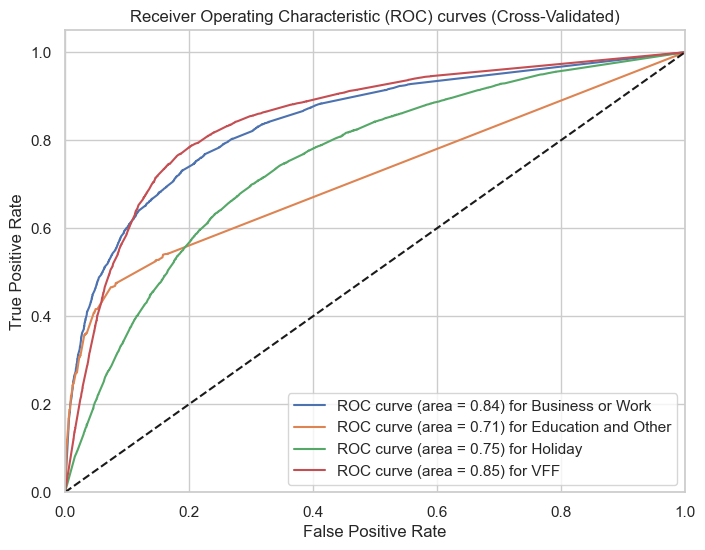

In [97]:
#plot ROC curves 

#perform cross-validation to check overfitting
y_probs_cv = cross_val_predict(rf_model, X, y, cv=5, method='predict_proba')

#compute ROC curve and ROC area for each class
fpr_cv = dict() #store the false positive rate
tpr_cv = dict() #store the true positive rate
roc_auc_cv = dict()
for i in range(len(classNames)):
    #select the predicted probabilities and sprecify the positive class label
    fpr_cv[i], tpr_cv[i], _ = metrics.roc_curve(y, y_probs_cv[:, i], pos_label=i) 
    #calculate the AUC
    roc_auc_cv[i] = metrics.auc(fpr_cv[i], tpr_cv[i])

#plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(classNames)):
    plt.plot(fpr_cv[i], tpr_cv[i], label=f'ROC curve (area = {roc_auc_cv[i]:0.2f}) for {classNames[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves (Cross-Validated)')
plt.legend(loc="lower right")
plt.show()


The 2018 model's performance is similar to the 2019 model.

In [98]:
#exporting these predictions as a csv file to use later

y_prob = rf_model.predict_proba(X_test)
prob_df = pd.DataFrame(y_prob, columns=classNames)

#concatenate the actual class labels with the probability DataFrame
result_df = pd.concat([y_test_pd.map(label_mapping).reset_index(drop=True), prob_df], axis=1)

#concatenate all columns horizontally
concatenated_df = pd.concat([X_test.reset_index(drop=True).replace({
    'Broad_Nationality_encoded': label_mapping_nat,
    'Stay_Category_encoded': label_mapping_stay,
    'Spend_Category_encoded': label_mapping_spend,
}), result_df], axis=1)

print(concatenated_df.head())  

#export to CSV
concatenated_df.to_csv('rf2018_predicted_probabilities.csv', index=False)


   Broad_Nationality_encoded Stay_Category_encoded Spend_Category_encoded  \
0                         EU              1-3 days           500-1000 GBP   
1                         EU                   NaN              0-250 GBP   
2  Australia, NZ and Oceania             4-13 days              0-250 GBP   
3                       Asia             4-13 days           500-1000 GBP   
4                         EU             4-13 days              0-250 GBP   

   accom_type  London_or_out  Flow  Age  DayOfWeek  TripStartDay  \
0           1              0   1.0    4          6             5   
1           0              0   5.0    7          1             1   
2           0              1   1.0    5          2             7   
3           1              1   1.0    6          6             3   
4           0              0   1.0    4          2             6   

  Broad_Purpose_encoded  Business or Work  Education and Other   Holiday  \
0      Business or Work          1.000000           

                     precision    recall  f1-score   support

   Business or Work       0.61      0.60      0.61      1534
Education and Other       0.33      0.20      0.25       199
            Holiday       0.64      0.66      0.65      2915
                VFF       0.65      0.66      0.65      2189

           accuracy                           0.63      6837
          macro avg       0.56      0.53      0.54      6837
       weighted avg       0.63      0.63      0.63      6837



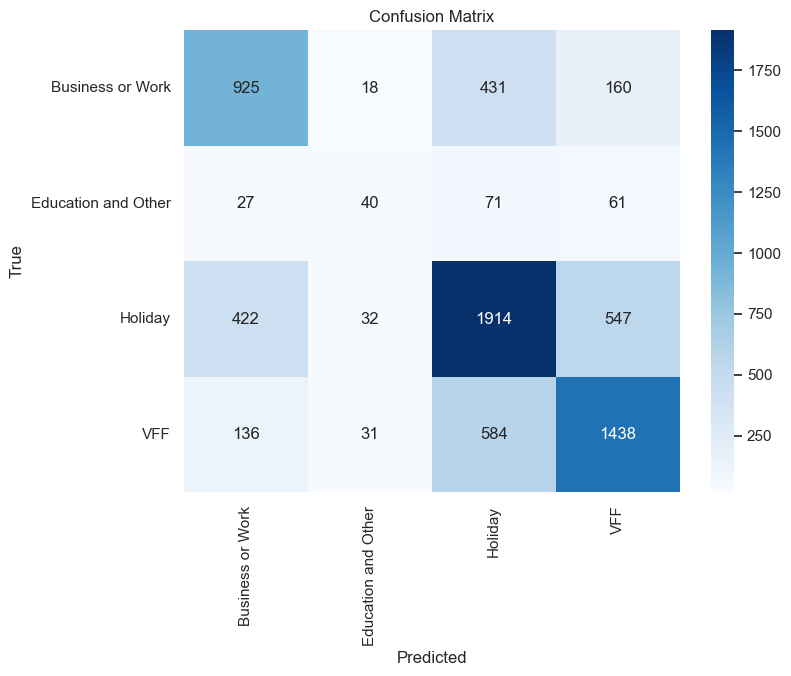

In [99]:
#testing the model on 2017 data

#purpose ~ nationality + stay + spend + accom_type + london_or_out + flow + age 
# + DayOfWeek + TripStartDay

label_encoder = LabelEncoder()

merged_df_2017['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2017['Broad_Purpose'])
merged_df_2017['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2017['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2017['Broad_Purpose_encoded'], merged_df_2017['Broad_Purpose']))

#we will need these label mappings later
merged_df_2017['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2017['Broad_Nationality'])
merged_df_2017['Original_Broad_Nationality'] = label_encoder.inverse_transform(merged_df_2017['Broad_Nationality_encoded'])
label_mapping_nat = dict(zip(merged_df_2017['Broad_Nationality_encoded'], merged_df_2017['Broad_Nationality']))

merged_df_2017['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2017['Stay_Category'])
merged_df_2017['Original_Stay_Category'] = label_encoder.inverse_transform(merged_df_2017['Stay_Category_encoded'])
label_mapping_stay = dict(zip(merged_df_2017['Stay_Category_encoded'], merged_df_2017['Stay_Category']))

merged_df_2017['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2017['Spend_Category'])
merged_df_2017['Original_Spend_Category'] = label_encoder.inverse_transform(merged_df_2017['Spend_Category_encoded'])
label_mapping_spend = dict(zip(merged_df_2017['Spend_Category_encoded'], merged_df_2017['Spend_Category']))

X = merged_df_2017[['Broad_Nationality_encoded', 'Stay_Category_encoded', 'Spend_Category_encoded', 
                    'accom_type', 'London_or_out', 'Flow', 'Age', 'DayOfWeek', 'TripStartDay']]
y = merged_df_2017['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
#train the model
rf_model.fit(X_train, y_train)

#test the model
y_pred = rf_model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

classification_report_str = classification_report(y_test_pd.map(label_mapping), y_pred_pd.map(label_mapping))
print(classification_report_str)

classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


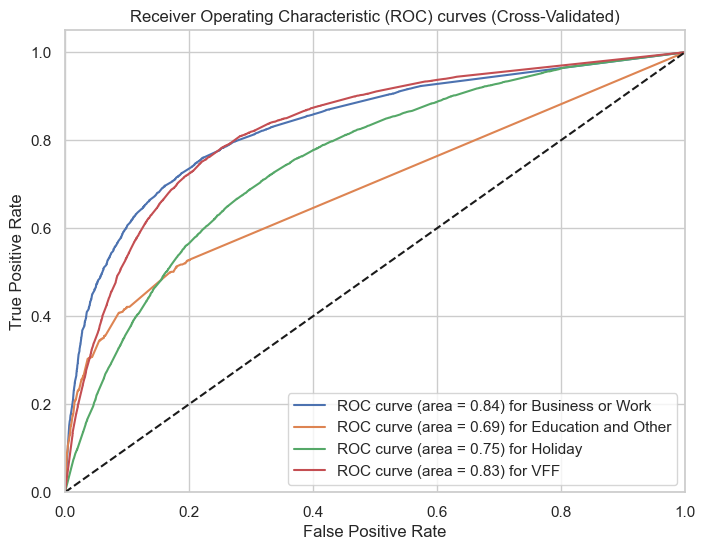

In [100]:
#plot ROC curves 

#perform cross-validation to check overfitting
y_probs_cv = cross_val_predict(rf_model, X, y, cv=5, method='predict_proba')

#compute ROC curve and ROC area for each class
fpr_cv = dict() #store the false positive rate
tpr_cv = dict() #store the true positive rate
roc_auc_cv = dict()
for i in range(len(classNames)):
    #select the predicted probabilities and sprecify the positive class label
    fpr_cv[i], tpr_cv[i], _ = metrics.roc_curve(y, y_probs_cv[:, i], pos_label=i) 
    #calculate the AUC
    roc_auc_cv[i] = metrics.auc(fpr_cv[i], tpr_cv[i])

#plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(classNames)):
    plt.plot(fpr_cv[i], tpr_cv[i], label=f'ROC curve (area = {roc_auc_cv[i]:0.2f}) for {classNames[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves (Cross-Validated)')
plt.legend(loc="lower right")
plt.show()


In [101]:
#exporting these predictions as a csv file to use later

y_prob = rf_model.predict_proba(X_test)
prob_df = pd.DataFrame(y_prob, columns=classNames)

#concatenate the actual class labels with the probability DataFrame
result_df = pd.concat([y_test_pd.map(label_mapping).reset_index(drop=True), prob_df], axis=1)

#concatenate all columns horizontally
concatenated_df = pd.concat([X_test.reset_index(drop=True).replace({
    'Broad_Nationality_encoded': label_mapping_nat,
    'Stay_Category_encoded': label_mapping_stay,
    'Spend_Category_encoded': label_mapping_spend,
}), result_df], axis=1)

print(concatenated_df.head())  

#export to CSV
concatenated_df.to_csv('rf2017_predicted_probabilities.csv', index=False)


   Broad_Nationality_encoded Stay_Category_encoded Spend_Category_encoded  \
0              South America             4-13 days           500-1000 GBP   
1  Australia, NZ and Oceania              1-3 days           500-1000 GBP   
2                       Asia              1-3 days          1000-5000 GBP   
3              North America              1-3 days              0-250 GBP   
4                     Africa            14-27 days          1000-5000 GBP   

   accom_type  London_or_out  Flow  Age  DayOfWeek  TripStartDay  \
0           0              0   1.0    6          4             7   
1           1              1   1.0    5          7             6   
2           1              0   1.0    2          1             6   
3           0              0   1.0    4          1             6   
4           1              1   1.0    7          2             3   

  Broad_Purpose_encoded  Business or Work  Education and Other   Holiday  \
0      Business or Work            0.2000           

                     precision    recall  f1-score   support

   Business or Work       0.66      0.65      0.65      1762
Education and Other       0.38      0.18      0.24       240
            Holiday       0.63      0.64      0.63      2800
                VFF       0.66      0.69      0.68      2375

           accuracy                           0.64      7177
          macro avg       0.58      0.54      0.55      7177
       weighted avg       0.64      0.64      0.64      7177



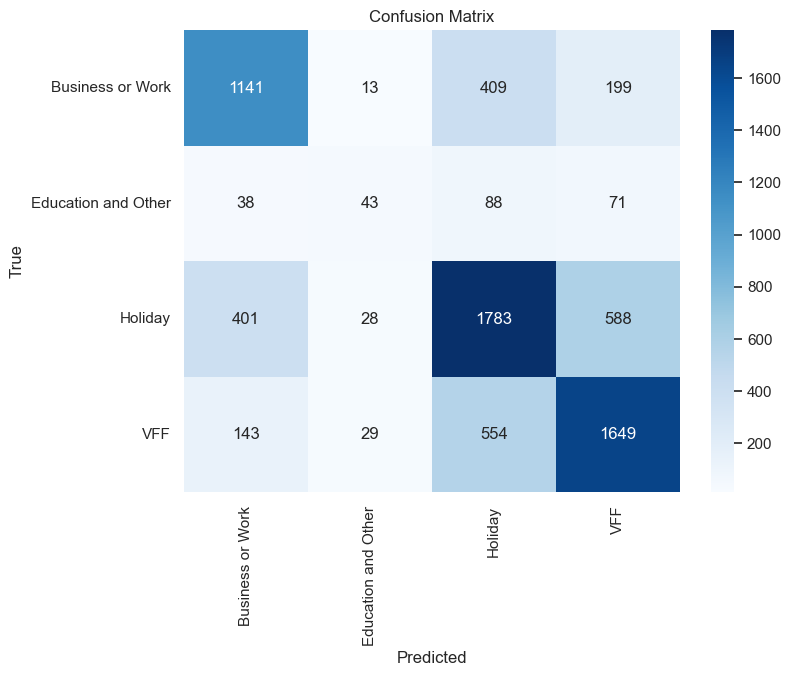

In [102]:
#testing the model on 2016 data

#purpose ~ nationality + stay + spend + accom_type + london_or_out + flow + age 
# + DayOfWeek + TripStartDay

label_encoder = LabelEncoder()

merged_df_2016['Broad_Purpose_encoded'] = label_encoder.fit_transform(merged_df_2016['Broad_Purpose'])
merged_df_2016['Original_Broad_Purpose'] = label_encoder.inverse_transform(merged_df_2016['Broad_Purpose_encoded'])
label_mapping = dict(zip(merged_df_2016['Broad_Purpose_encoded'], merged_df_2016['Broad_Purpose']))

#we will need these label mappings later
merged_df_2016['Broad_Nationality_encoded'] = label_encoder.fit_transform(merged_df_2016['Broad_Nationality'])
merged_df_2016['Original_Broad_Nationality'] = label_encoder.inverse_transform(merged_df_2016['Broad_Nationality_encoded'])
label_mapping_nat = dict(zip(merged_df_2016['Broad_Nationality_encoded'], merged_df_2016['Broad_Nationality']))

merged_df_2016['Stay_Category_encoded'] = label_encoder.fit_transform(merged_df_2016['Stay_Category'])
merged_df_2016['Original_Stay_Category'] = label_encoder.inverse_transform(merged_df_2016['Stay_Category_encoded'])
label_mapping_stay = dict(zip(merged_df_2016['Stay_Category_encoded'], merged_df_2016['Stay_Category']))

merged_df_2016['Spend_Category_encoded'] = label_encoder.fit_transform(merged_df_2016['Spend_Category'])
merged_df_2016['Original_Spend_Category'] = label_encoder.inverse_transform(merged_df_2016['Spend_Category_encoded'])
label_mapping_spend = dict(zip(merged_df_2016['Spend_Category_encoded'], merged_df_2016['Spend_Category']))

X = merged_df_2016[['Broad_Nationality_encoded', 'Stay_Category_encoded', 'Spend_Category_encoded', 
                    'accom_type', 'London_or_out', 'Flow', 'Age', 'DayOfWeek', 'TripStartDay']]
y = merged_df_2016['Broad_Purpose_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
#train the model
rf_model.fit(X_train, y_train)

#test the model
y_pred = rf_model.predict(X_test)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test)
y_pred_pd = pd.Series(y_pred)

classification_report_str = classification_report(y_test_pd.map(label_mapping), y_pred_pd.map(label_mapping))
print(classification_report_str)

classNames = ['Business or Work', 'Education and Other', 'Holiday', 'VFF']
conf_matrix = confusion_matrix(y_test, y_pred)

#plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


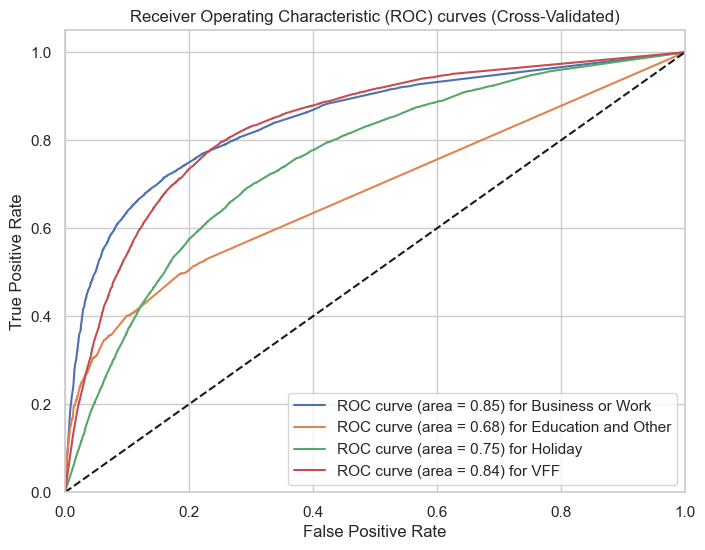

In [103]:
#plot ROC curves 

#perform cross-validation to check overfitting
y_probs_cv = cross_val_predict(rf_model, X, y, cv=5, method='predict_proba')

#compute ROC curve and ROC area for each class
fpr_cv = dict() #store the false positive rate
tpr_cv = dict() #store the true positive rate
roc_auc_cv = dict()
for i in range(len(classNames)):
    #select the predicted probabilities and sprecify the positive class label
    fpr_cv[i], tpr_cv[i], _ = metrics.roc_curve(y, y_probs_cv[:, i], pos_label=i) 
    #calculate the AUC
    roc_auc_cv[i] = metrics.auc(fpr_cv[i], tpr_cv[i])

#plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(classNames)):
    plt.plot(fpr_cv[i], tpr_cv[i], label=f'ROC curve (area = {roc_auc_cv[i]:0.2f}) for {classNames[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves (Cross-Validated)')
plt.legend(loc="lower right")
plt.show()


In [104]:
#exporting these predictions as a csv file to use later

y_prob = rf_model.predict_proba(X_test)
prob_df = pd.DataFrame(y_prob, columns=classNames)

#concatenate the actual class labels with the probability DataFrame
result_df = pd.concat([y_test_pd.map(label_mapping).reset_index(drop=True), prob_df], axis=1)

#concatenate all columns horizontally
concatenated_df = pd.concat([X_test.reset_index(drop=True).replace({
    'Broad_Nationality_encoded': label_mapping_nat,
    'Stay_Category_encoded': label_mapping_stay,
    'Spend_Category_encoded': label_mapping_spend,
}), result_df], axis=1)

print(concatenated_df.head())  

#export to CSV
concatenated_df.to_csv('rf2016_predicted_probabilities.csv', index=False)


  Broad_Nationality_encoded Stay_Category_encoded Spend_Category_encoded  \
0                        EU              1-3 days           500-1000 GBP   
1                        EU             4-13 days              0-250 GBP   
2                    Africa            14-27 days              0-250 GBP   
3                        EU              1-3 days                    NaN   
4                        EU              1-3 days              0-250 GBP   

   accom_type  London_or_out  Flow  Age  DayOfWeek  TripStartDay  \
0           1              1   1.0    8          7             6   
1           0              0   1.0    6          4             7   
2           0              0   1.0    8          7             5   
3           0              1   5.0    2          5             4   
4           1              1   1.0    4          1             7   

  Broad_Purpose_encoded  Business or Work  Education and Other   Holiday  \
0                   VFF              0.15                 

So far, we have only used a single year's data for training the model and tested it on a portion of the same year's dataset. Instead, now we attempt to train the model on older data (2016-2019) and then test it on new data (2022) to see how the model will perform. In essence, the model would be trained on some data and tested on some data that it has not seen before (as it would have not had the chance to learn the new patterns). We can try this as the trends in the data are fairly constant over the years (except for 2022, some disruptions were caused due to the pandemic).

                     precision    recall  f1-score   support

   Business or Work       0.63      0.65      0.64      6100
Education and Other       0.38      0.23      0.29       700
            Holiday       0.65      0.68      0.66     10917
                VFF       0.71      0.68      0.70      8683

           accuracy                           0.66     26400
          macro avg       0.59      0.56      0.57     26400
       weighted avg       0.66      0.66      0.66     26400



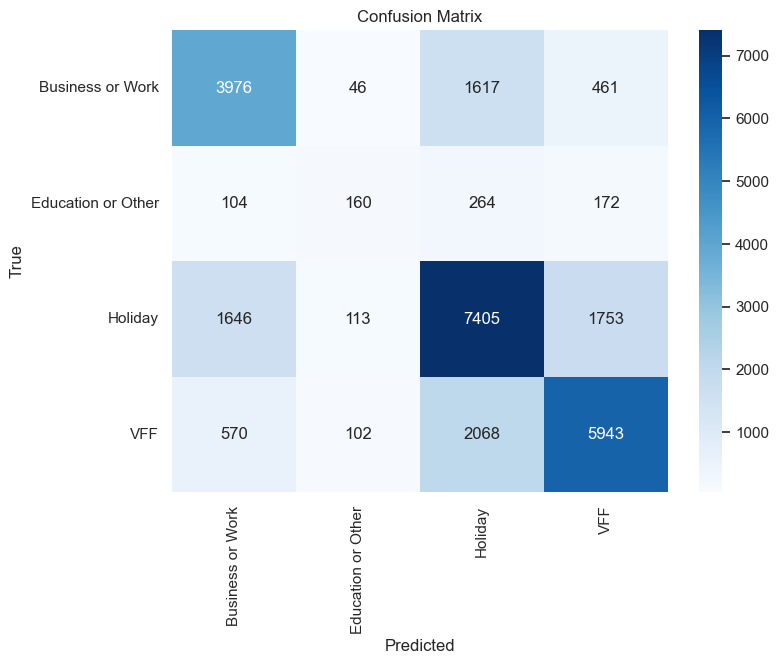

In [105]:
#using 2016,2017,2018 data to make predictions on 2019 data

#concatenate the dataframes
combined_df = pd.concat([merged_df_2016, merged_df_2017, merged_df_2018], ignore_index=True)

label_encoder = LabelEncoder()

combined_df['Broad_Purpose_encoded'] = label_encoder.fit_transform(combined_df['Broad_Purpose'])
combined_df['Original_Broad_Purpose'] = label_encoder.inverse_transform(combined_df['Broad_Purpose_encoded'])
label_mapping = dict(zip(combined_df['Broad_Purpose_encoded'], combined_df['Broad_Purpose']))

combined_df['Broad_Nationality_encoded'] = label_encoder.fit_transform(combined_df['Broad_Nationality'])
combined_df['Original_Broad_Nationality'] = label_encoder.inverse_transform(combined_df['Broad_Nationality_encoded'])
label_mapping_nat = dict(zip(combined_df['Broad_Nationality_encoded'], combined_df['Broad_Nationality']))

combined_df['Stay_Category_encoded'] = label_encoder.fit_transform(combined_df['Stay_Category'])
combined_df['Original_Stay_Category'] = label_encoder.inverse_transform(combined_df['Stay_Category_encoded'])
label_mapping_stay = dict(zip(combined_df['Stay_Category_encoded'], combined_df['Stay_Category']))

combined_df['Spend_Category_encoded'] = label_encoder.fit_transform(combined_df['Spend_Category'])
combined_df['Original_Spend_Category'] = label_encoder.inverse_transform(combined_df['Spend_Category_encoded'])
label_mapping_spend = dict(zip(combined_df['Spend_Category_encoded'], combined_df['Spend_Category']))

X_train_combined = combined_df[['Broad_Nationality_encoded', 'Stay_Category_encoded', 
                                'Spend_Category_encoded', 'accom_type', 'London_or_out', 'Flow', 
                                'Age', 'DayOfWeek', 'TripStartDay']]
y_train_combined = combined_df['Broad_Purpose_encoded']

rf_model_combined = RandomForestClassifier(n_estimators=10, random_state=42)
#train the model on old data
rf_model_combined.fit(X_train_combined, y_train_combined)

#test the trained model on the 2019 data
X_test_2019 = merged_df_2019[['Broad_Nationality_encoded', 'Stay_Category_encoded', 
                                'Spend_Category_encoded', 'accom_type', 'London_or_out', 'Flow', 
                                'Age', 'DayOfWeek', 'TripStartDay']]
y_test_2019 = merged_df_2019['Broad_Purpose_encoded']

y_pred_2019 = rf_model_combined.predict(X_test_2019)

#converting to pandas series to help map
y_test_pd = pd.Series(y_test_2019)
y_pred_pd = pd.Series(y_pred_2019)

classification_report_str = classification_report(y_test_pd.map(label_mapping), y_pred_pd.map(label_mapping))
print(classification_report_str)

classNames = ['Business or Work', 'Education or Other', 'Holiday','VFF']

confus_matrix = confusion_matrix(y_test_pd, y_pred_pd)

plt.figure(figsize=(8, 6))
sns.heatmap(confus_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


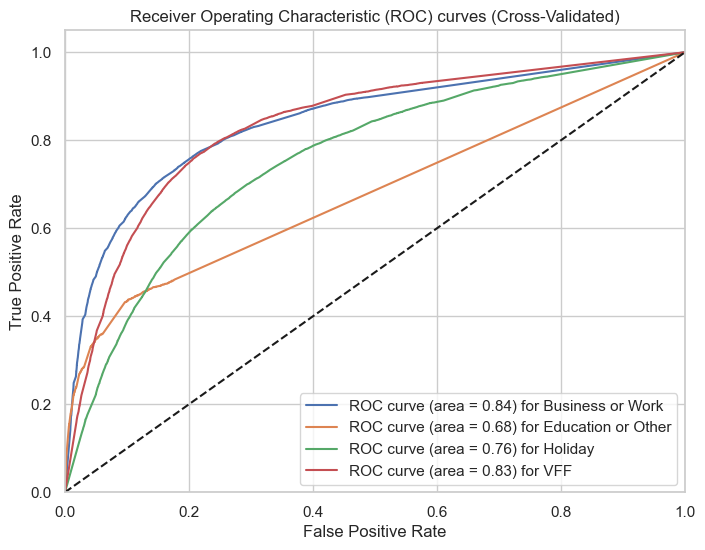

In [106]:

#perform cross-validation
y_probs_cv_2019 = cross_val_predict(rf_model_combined, X_train_combined, y_train_combined, cv=5, method='predict_proba')

#compute ROC curve and ROC area 
fpr_cv_2019 = dict()
tpr_cv_2019 = dict()
roc_auc_cv_2019 = dict()
for i in range(len(classNames)):
    fpr_cv_2019[i], tpr_cv_2019[i], _ = roc_curve((y_train_combined == i), y_probs_cv_2019[:, i])
    roc_auc_cv_2019[i] = auc(fpr_cv_2019[i], tpr_cv_2019[i])

#plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(classNames)):
    plt.plot(fpr_cv_2019[i], tpr_cv_2019[i], label=f'ROC curve (area = {roc_auc_cv_2019[i]:0.2f}) for {classNames[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves (Cross-Validated)')
plt.legend(loc="lower right")
plt.show()


We can see that the model trained on older data and tested on 2019 data performs similar to the model trained and tested on 2019 data. We can infer from this that the data trends are fairly stable and as a result, the model is able to make fairly accurate predictions.

In [107]:
#exporting these predictions as a csv file to use later

y_prob = rf_model_combined.predict_proba(X_test_2019)
prob_df = pd.DataFrame(y_prob, columns=classNames)

#concatenate the actual class labels with the probability DataFrame
result_df = pd.concat([y_test_pd.map(label_mapping).reset_index(drop=True), prob_df], axis=1)

#concatenate all columns horizontally
concatenated_df = pd.concat([X_test_2019.reset_index(drop=True).replace({
    'Broad_Nationality_encoded': label_mapping_nat,
    'Stay_Category_encoded': label_mapping_stay,
    'Spend_Category_encoded': label_mapping_spend,
}), result_df], axis=1)

print(concatenated_df.head())  

#export to CSV
concatenated_df.to_csv('rf_predicted_probabilitiesof2019_2016-2017-2018.csv', index=False)


  Broad_Nationality_encoded Stay_Category_encoded Spend_Category_encoded  \
0                        EU            14-27 days              0-250 GBP   
1                        EU            14-27 days              0-250 GBP   
2                        EU                   NaN              0-250 GBP   
3                        UK             4-13 days          1000-5000 GBP   
4                        EU              1-3 days              0-250 GBP   

   accom_type  London_or_out  Flow  Age  DayOfWeek  TripStartDay  \
0           0              0   1.0    7          4             5   
1           0              0   1.0    8          4             5   
2           1              0   1.0    4          3             3   
3           0              0   1.0    8          4             3   
4           0              0   1.0    2          4             2   

  Broad_Purpose_encoded  Business or Work  Education or Other   Holiday  \
0                   VFF          0.000000            0.0000

                     precision    recall  f1-score   support

   Business or Work       0.41      0.45      0.43      5825
Education and Other       0.17      0.14      0.15       613
            Holiday       0.56      0.67      0.61     13828
                VFF       0.77      0.60      0.67     14362

           accuracy                           0.59     34628
          macro avg       0.47      0.46      0.46     34628
       weighted avg       0.61      0.59      0.60     34628



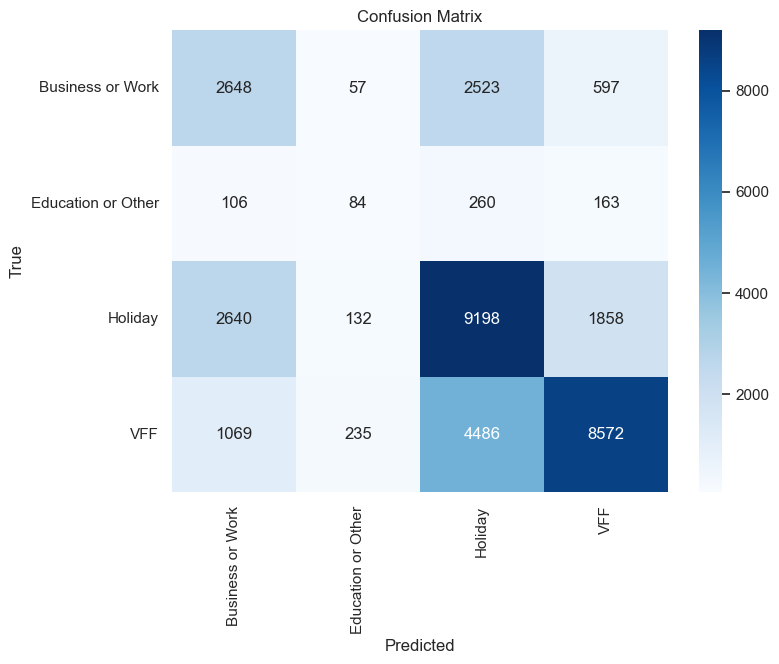

In [108]:
#using 2016,2017,2018, 2019 data to make predictions on 2022 data

#concatenate the dataframes
combined_df_2022 = pd.concat([merged_df_2016, merged_df_2017, merged_df_2018, merged_df_2019], 
                             ignore_index=True)

combined_df_2022.dropna(subset=['Stay_Category', 'Broad_Nationality', 'Spend_Category'], inplace=True)

combined_df_2022['Broad_Nationality'].fillna('Unknown', inplace=True)
combined_df_2022['Age'].fillna(-1, inplace=True)


label_encoder = LabelEncoder()

combined_df_2022['Broad_Purpose_encoded'] = label_encoder.fit_transform(combined_df_2022['Broad_Purpose'])
combined_df_2022['Original_Broad_Purpose'] = label_encoder.inverse_transform(combined_df_2022['Broad_Purpose_encoded'])
label_mapping = dict(zip(combined_df_2022['Broad_Purpose_encoded'], combined_df_2022['Broad_Purpose']))

combined_df_2022['Broad_Nationality_encoded'] = label_encoder.fit_transform(combined_df_2022['Broad_Nationality'])
combined_df_2022['Original_Broad_Nationality'] = label_encoder.inverse_transform(combined_df_2022['Broad_Nationality_encoded'])
label_mapping_nat = dict(zip(combined_df_2022['Broad_Nationality_encoded'], combined_df_2022['Broad_Nationality']))

combined_df_2022['Stay_Category_encoded'] = label_encoder.fit_transform(combined_df_2022['Stay_Category'])
combined_df_2022['Original_Stay_Category'] = label_encoder.inverse_transform(combined_df_2022['Stay_Category_encoded'])
label_mapping_stay = dict(zip(combined_df_2022['Stay_Category_encoded'], combined_df_2022['Stay_Category']))

combined_df_2022['Spend_Category_encoded'] = label_encoder.fit_transform(combined_df_2022['Spend_Category'])
combined_df_2022['Original_Spend_Category'] = label_encoder.inverse_transform(combined_df_2022['Spend_Category_encoded'])
label_mapping_spend = dict(zip(combined_df_2022['Spend_Category_encoded'], combined_df_2022['Spend_Category']))


X_train_combined_2022 = combined_df_2022[['Broad_Nationality_encoded', 'Stay_Category_encoded', 'Spend_Category_encoded',
                                'Flow', 'Age', 'London_or_out', 'accom_type', 'DayOfWeek', 'TripStartDay']]
y_train_combined_2022 = combined_df_2022['Broad_Purpose_encoded']


rf_model_combined_2022 = RandomForestClassifier(n_estimators=10, random_state=42)
#train the model on previous data
rf_model_combined_2022.fit(X_train_combined_2022, y_train_combined_2022)

#test the trained model on the 2022 data
X_test_2022 = merged_df_2022[['Broad_Nationality_encoded', 'Stay_Category_encoded', 'Spend_Category_encoded',
                               'Flow', 'Age', 'London_or_out', 'accom_type', 'DayOfWeek', 'TripStartDay']]
y_test_2022 = merged_df_2022['Broad_Purpose_encoded']

y_pred_2022 = rf_model_combined_2022.predict(X_test_2022)


#converting to pandas series to help map
y_test_pd = pd.Series(y_test_2022)
y_pred_pd = pd.Series(y_pred_2022)

classification_report_str = classification_report(y_test_pd.map(label_mapping), y_pred_pd.map(label_mapping))
print(classification_report_str)

classNames = ['Business or Work', 'Education or Other', 'Holiday','VFF']

confus_matrix = confusion_matrix(y_test_pd, y_pred_pd)

plt.figure(figsize=(8, 6))
sns.heatmap(confus_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


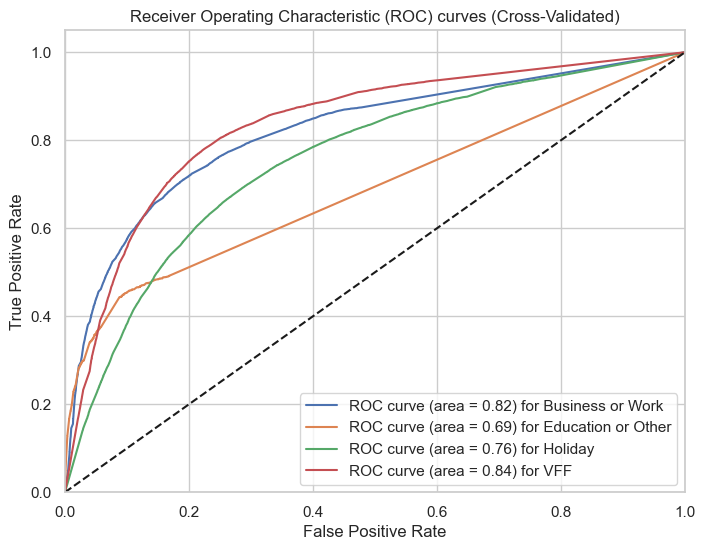

In [109]:
#perform cross-validation
y_probs_cv = cross_val_predict(rf_model_combined_2022, X_train_combined_2022, y_train_combined_2022,
                               cv=5, method='predict_proba')

#compute ROC curve and ROC area 
fpr_cv = dict()
tpr_cv = dict()
roc_auc_cv = dict()
for i in range(len(classNames)):
    fpr_cv[i], tpr_cv[i], _ = roc_curve((y_train_combined_2022 == i), y_probs_cv[:, i])
    roc_auc_cv[i] = auc(fpr_cv[i], tpr_cv[i])

#plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(classNames)):
    plt.plot(fpr_cv[i], tpr_cv[i], label=f'ROC curve (area = {roc_auc_cv[i]:0.2f}) for {classNames[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves (Cross-Validated)')
plt.legend(loc="lower right")
plt.show()


In [110]:
#exporting these predictions as a csv file to use later

y_pred_2022 = rf_model_combined_2022.predict_proba(X_test_2022)
#class with the highest probability as the predicted class label
y_pred_2022_argmax = np.argmax(y_pred_2022, axis=1)

y_pred_pd = pd.Series(y_pred_2022_argmax)
prob_df_2022 = pd.DataFrame(y_pred_2022, columns=classNames)

#concatenate the actual class labels with the probability
result_df_2022 = pd.concat([y_test_pd.map(label_mapping).reset_index(drop=True), prob_df_2022], axis=1)
concatenated_df_2022 = pd.concat([X_test_2022.reset_index(drop=True).replace({
    'Broad_Nationality_encoded': label_mapping_nat,
    'Stay_Category_encoded': label_mapping_stay,
    'Spend_Category_encoded': label_mapping_spend,
}), result_df_2022], axis=1)

print(concatenated_df_2022.head()) 
#export to CSV
concatenated_df_2022.to_csv('rf_predicted_probabilities_predictionsfor2022.csv', index=False)


  Broad_Nationality_encoded Stay_Category_encoded Spend_Category_encoded  \
0             South America            14-27 days           500-1000 GBP   
1                        EU            14-27 days            250-500 GBP   
2             South America            14-27 days              0-250 GBP   
3                        EU            14-27 days           500-1000 GBP   
4                        EU            14-27 days            250-500 GBP   

   Flow  Age  London_or_out  accom_type  DayOfWeek  TripStartDay  \
0   1.0    5              0           0          4           5.0   
1   1.0    4              0           0          4           5.0   
2   1.0    5              0           0          4           6.0   
3   1.0    5              0           0          4           5.0   
4   1.0    2              0           0          4           3.0   

  Broad_Purpose_encoded  Business or Work  Education or Other   Holiday  \
0                   VFF               0.0                 0

We see that the performance of the model tested on 2019 data was slightly better than the model tested on 2022 data. This is probably due to a slight shift in trends in 2022. However, the overall performance of all models are similar and hence it can be inferred that the model is able to make accurate predictions over time.